# ANALYSIS AND SURVIVAL PREDICTION OF HEART FAILURE PATIENTS

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from numpy.random import seed
from sklearn.feature_selection import chi2
from numpy.random import randn
from scipy.stats import mannwhitneyu
from sklearn.feature_selection import RFECV
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold, cross_val_score,RepeatedKFold

from imblearn.over_sampling import SMOTE

In [2]:
#Load the dataset
patient_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
patient_data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

# Dimension of data

In [3]:
#Dimension of data
patient_data.shape

(299, 13)

data has 299 rows and 13 columns

# Data type of each attribute

In [4]:
patient_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Descriptive Statistics

In [5]:
patient_data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

<AxesSubplot:>

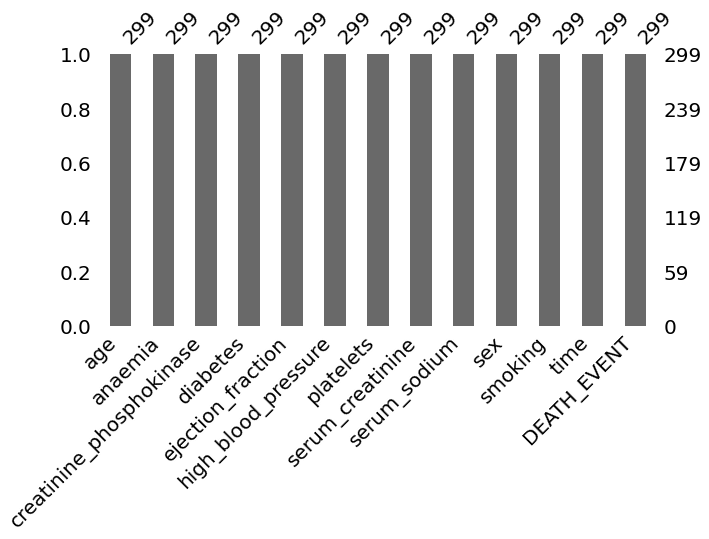

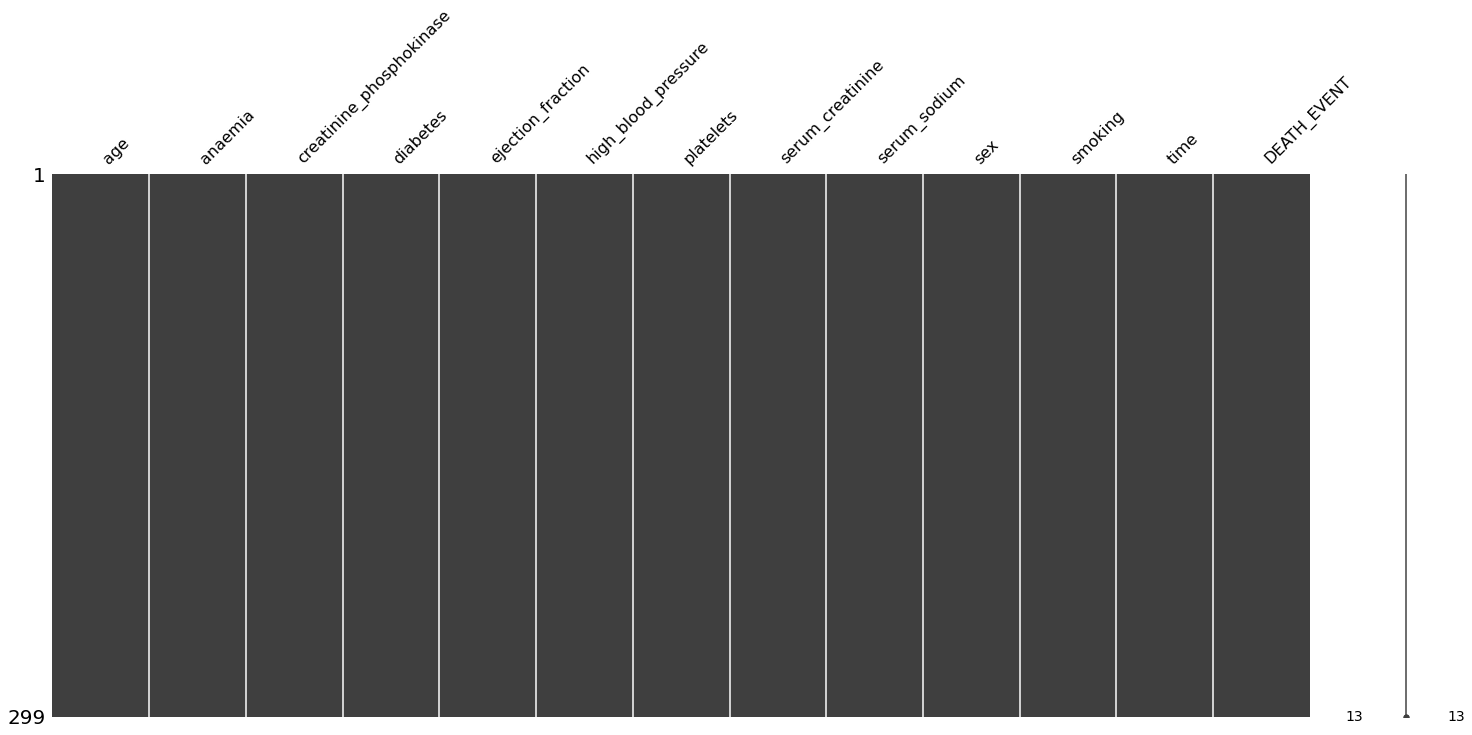

In [6]:
msno.bar(patient_data,figsize=(10,5),fontsize=20)
msno.matrix(patient_data)

# Distinct values

In [7]:
#Distinct Values
uniquevalues = patient_data.nunique()
uniquevalues= pd.DataFrame(uniquevalues)
uniquevalues["feature" ]= uniquevalues.index
uniquevalues["Distinct value"]=uniquevalues[0] 
uniquevalues.drop(0, axis=1, inplace=True) 

uniquevalues.reset_index(drop=True, inplace=True)
uniquevalues

feature  Distinct value
0                        age              47
1                    anaemia               2
2   creatinine_phosphokinase             208
3                   diabetes               2
4          ejection_fraction              17
5        high_blood_pressure               2
6                  platelets             176
7           serum_creatinine              40
8               serum_sodium              27
9                        sex               2
10                   smoking               2
11                      time             148
12               DEATH_EVENT               2

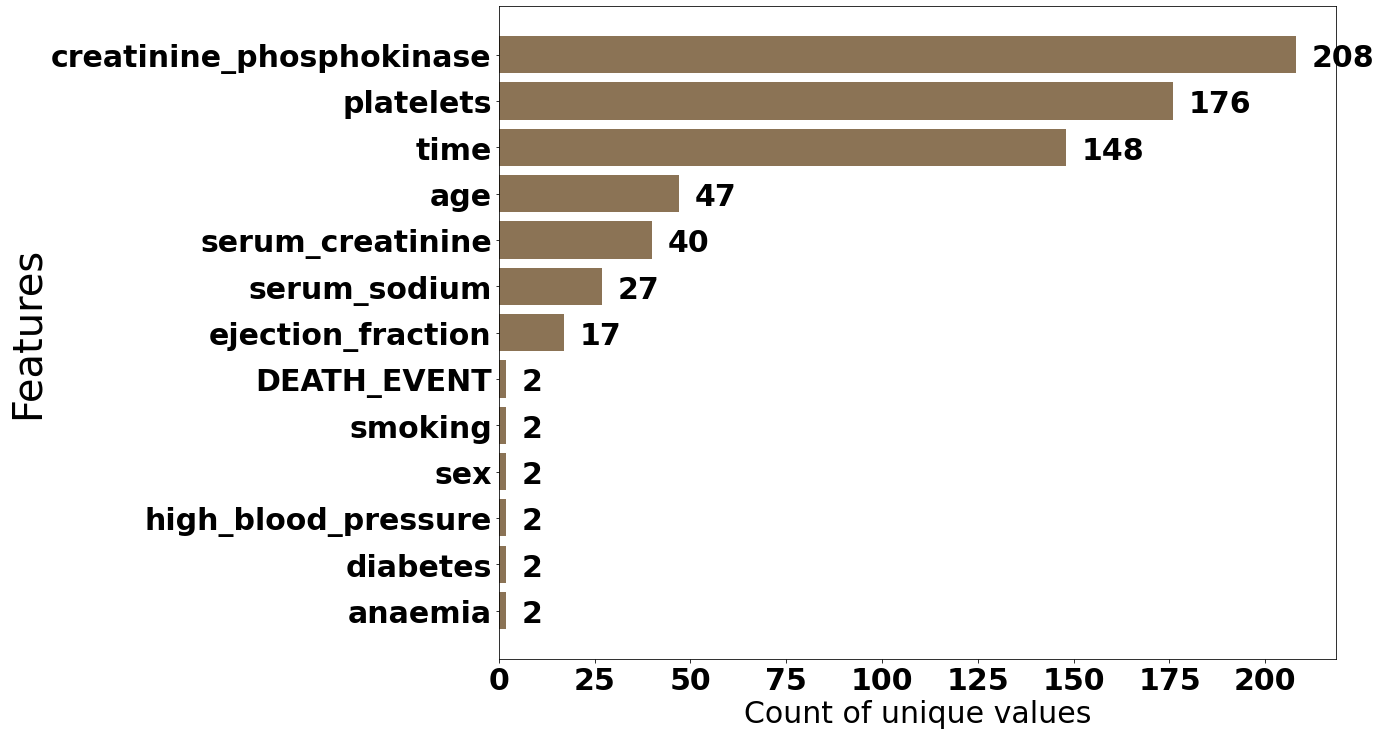

In [8]:
fig, ax = plt.subplots(figsize = (15,12))
width = 0.8
uniquevalues_sorted = uniquevalues.sort_values('Distinct value')
ax.barh(uniquevalues_sorted["feature"],uniquevalues_sorted["Distinct value"],width,color="#8B7355")

for i, v in enumerate(uniquevalues_sorted["Distinct value"]):
    ax.text(v + 4, i + -0.25, str(v),
            color = 'black',fontsize=30,fontweight="bold")
plt.xlabel("Count of unique values",fontsize=30)
plt.xticks(fontsize=30,fontweight="bold")
plt.ylabel("Features",fontsize=40)
plt.yticks(fontsize=30,fontweight="bold")
plt.show()

In [9]:
#Null value check
patient_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
#Check for duplicates
patient_data.duplicated().sum()


0

# Class Distribution for classification

In [11]:
patient_data.groupby('DEATH_EVENT').size()

DEATH_EVENT
0    203
1     96
dtype: int64

# Correlation between attributes

In [12]:
x=patient_data.iloc[:,0:12]
y=patient_data.iloc[:,-1]
x.corrwith(y,method='pearson').sort_values(ascending=False)


serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
dtype: float64

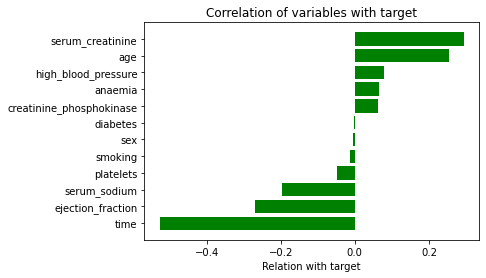

In [13]:
importances = x.apply(lambda x: x.corr(y))
indices = np.argsort(importances)
#print(importances[indices])
names=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction',
       'high_blood_pressure','platelets','serum_creatinine',
       'serum_sodium','sex','smoking','time']

plt.title('Correlation of variables with target')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relation with target')
plt.show()

In [14]:
#Checking multicollinearity
for i in range(0,len(x.columns)):
    for j in  range(0,len(x.columns)):
        if i!=j:
            correlation=np.abs(x[x.columns[i]].corr(x[x.columns[j]]))
            if correlation <0.3:
                print( x.columns[i] , " is not correlated  with ", x.columns[j])
            elif correlation>0.75:
                print( x.columns[i] , " is highly  correlated  with ", x.columns[j])

age  is not correlated  with  anaemia
age  is not correlated  with  creatinine_phosphokinase
age  is not correlated  with  diabetes
age  is not correlated  with  ejection_fraction
age  is not correlated  with  high_blood_pressure
age  is not correlated  with  platelets
age  is not correlated  with  serum_creatinine
age  is not correlated  with  serum_sodium
age  is not correlated  with  sex
age  is not correlated  with  smoking
age  is not correlated  with  time
anaemia  is not correlated  with  age
anaemia  is not correlated  with  creatinine_phosphokinase
anaemia  is not correlated  with  diabetes
anaemia  is not correlated  with  ejection_fraction
anaemia  is not correlated  with  high_blood_pressure
anaemia  is not correlated  with  platelets
anaemia  is not correlated  with  serum_creatinine
anaemia  is not correlated  with  serum_sodium
anaemia  is not correlated  with  sex
anaemia  is not correlated  with  smoking
anaemia  is not correlated  with  time
creatinine_phosphokinase  

# Skew of univariate distributions

In [15]:
patient_data.skew()

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

# Data Visualisations

# 1. Univariate Plots

## 1.1 Histograms

### Attribute 'age'

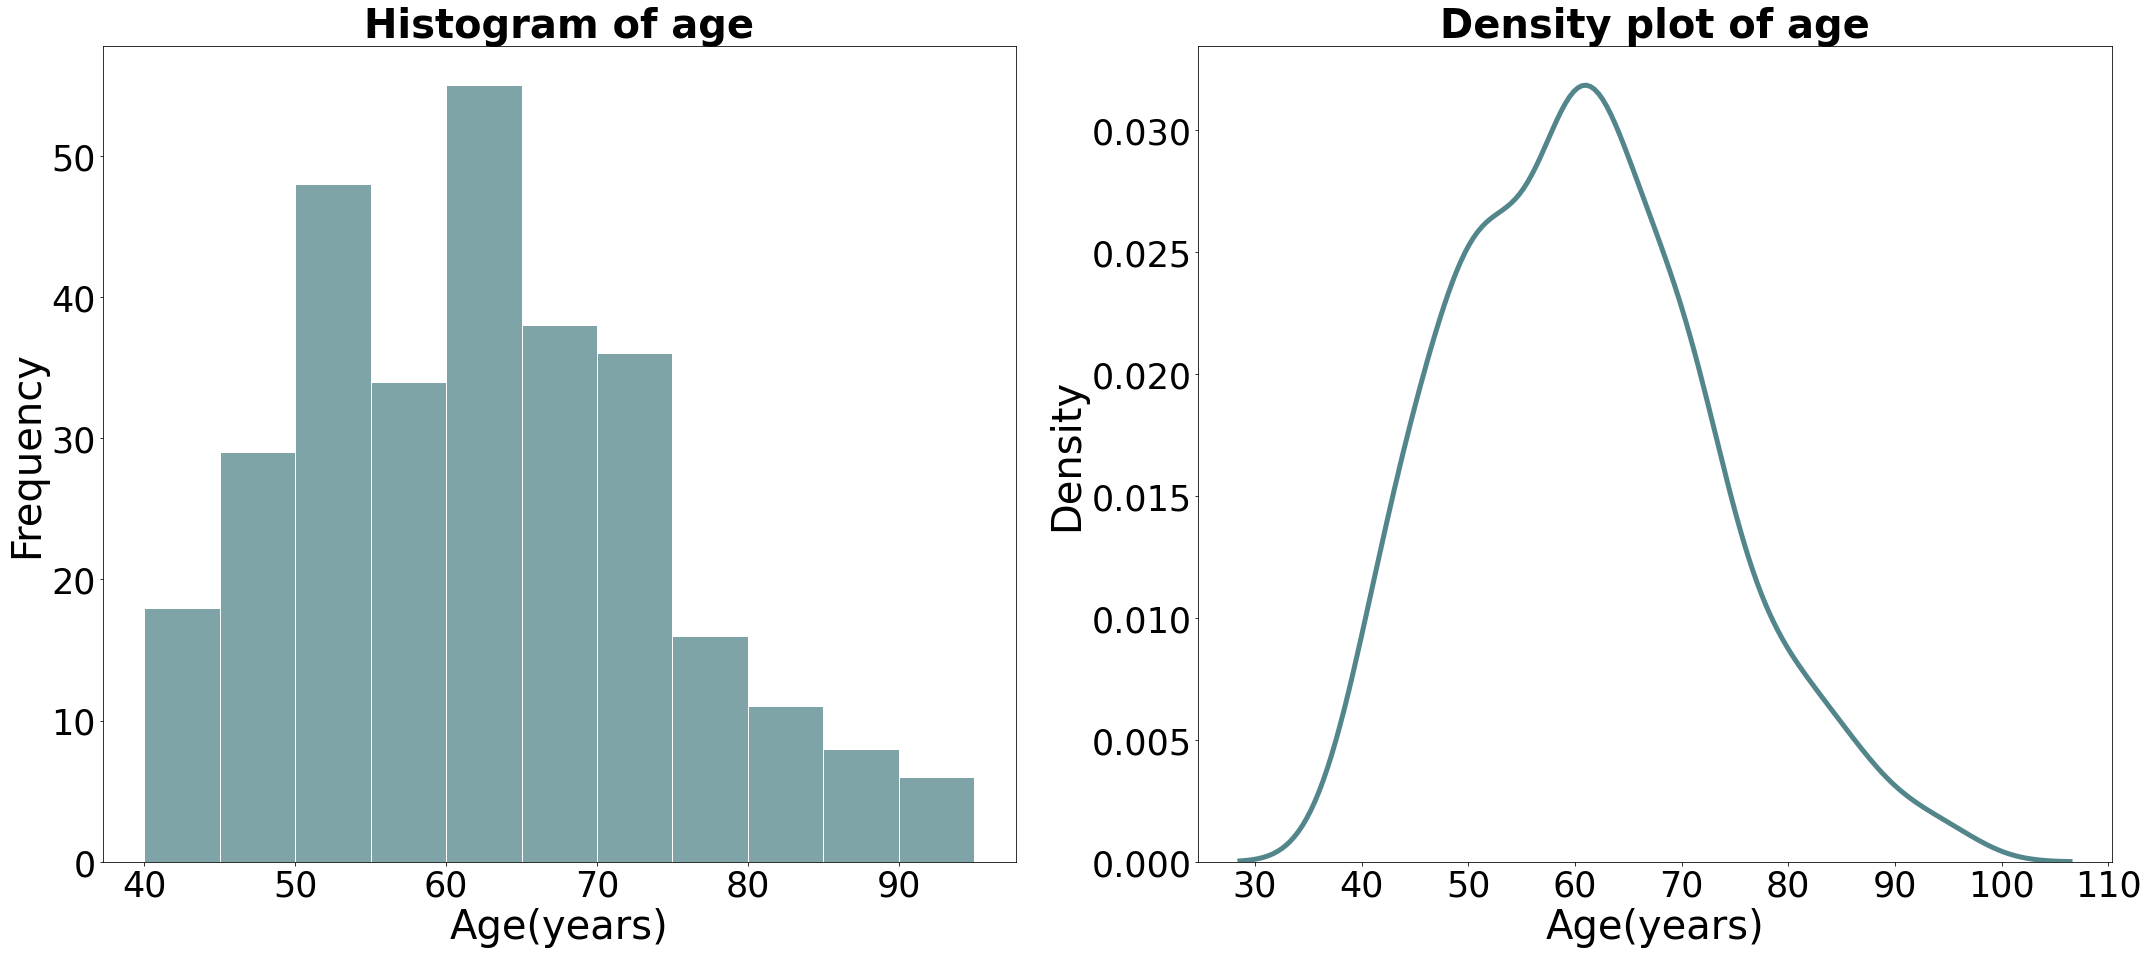

In [16]:
plt.figure(figsize=(36,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='age',bins=11,edgecolor='white',color="#53868B")

plt.title("Histogram of age",fontsize=40,fontweight="bold")
plt.xlabel("Age(years)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.age,bins=11,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of age",fontsize=40,fontweight="bold")
plt.xlabel("Age(years)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

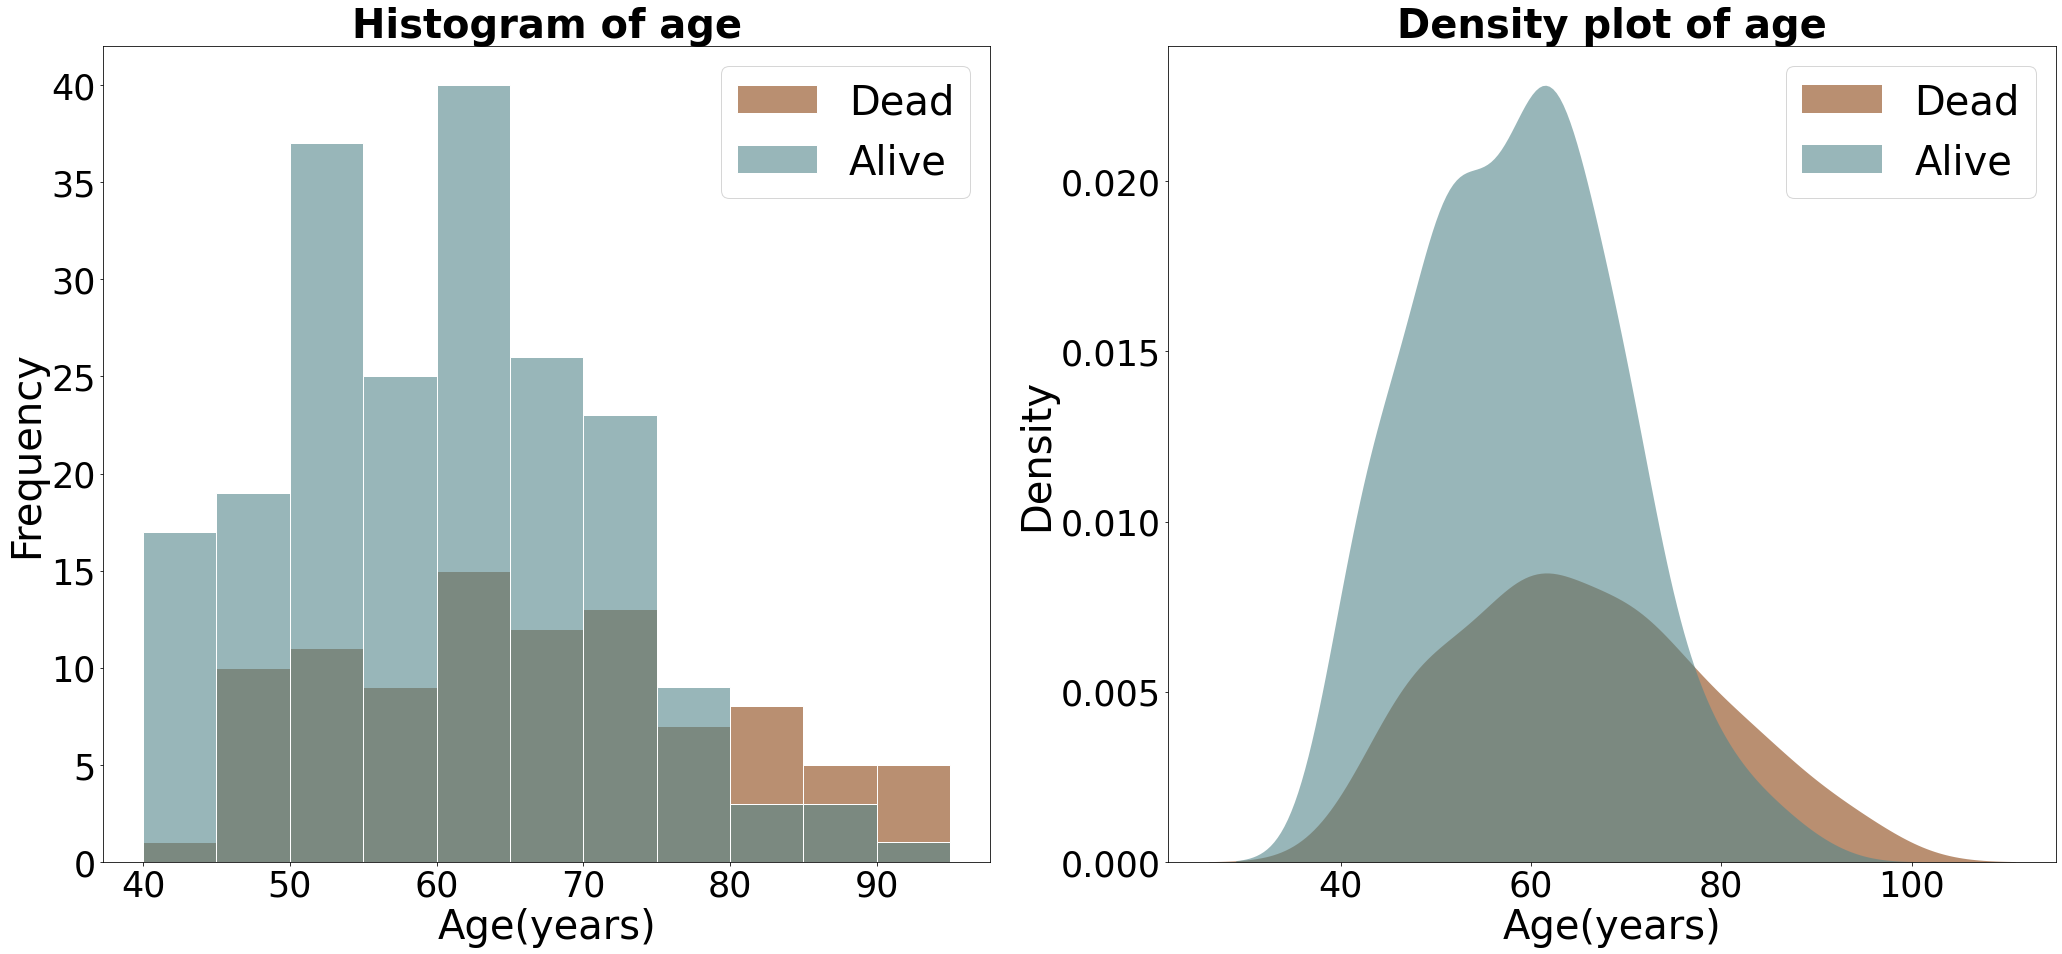

In [17]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

plot1 = sns.histplot(data=patient_data,x='age',bins=11,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","DEad"])

plt.title("Histogram of age",fontsize=40,fontweight="bold")
plt.xlabel("Age(years)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
plot2 = sns.kdeplot(x='age',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of age",fontsize=40,fontweight="bold")
plt.xlabel("Age(years)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## Attribute 'creatinine_phosphokinase'

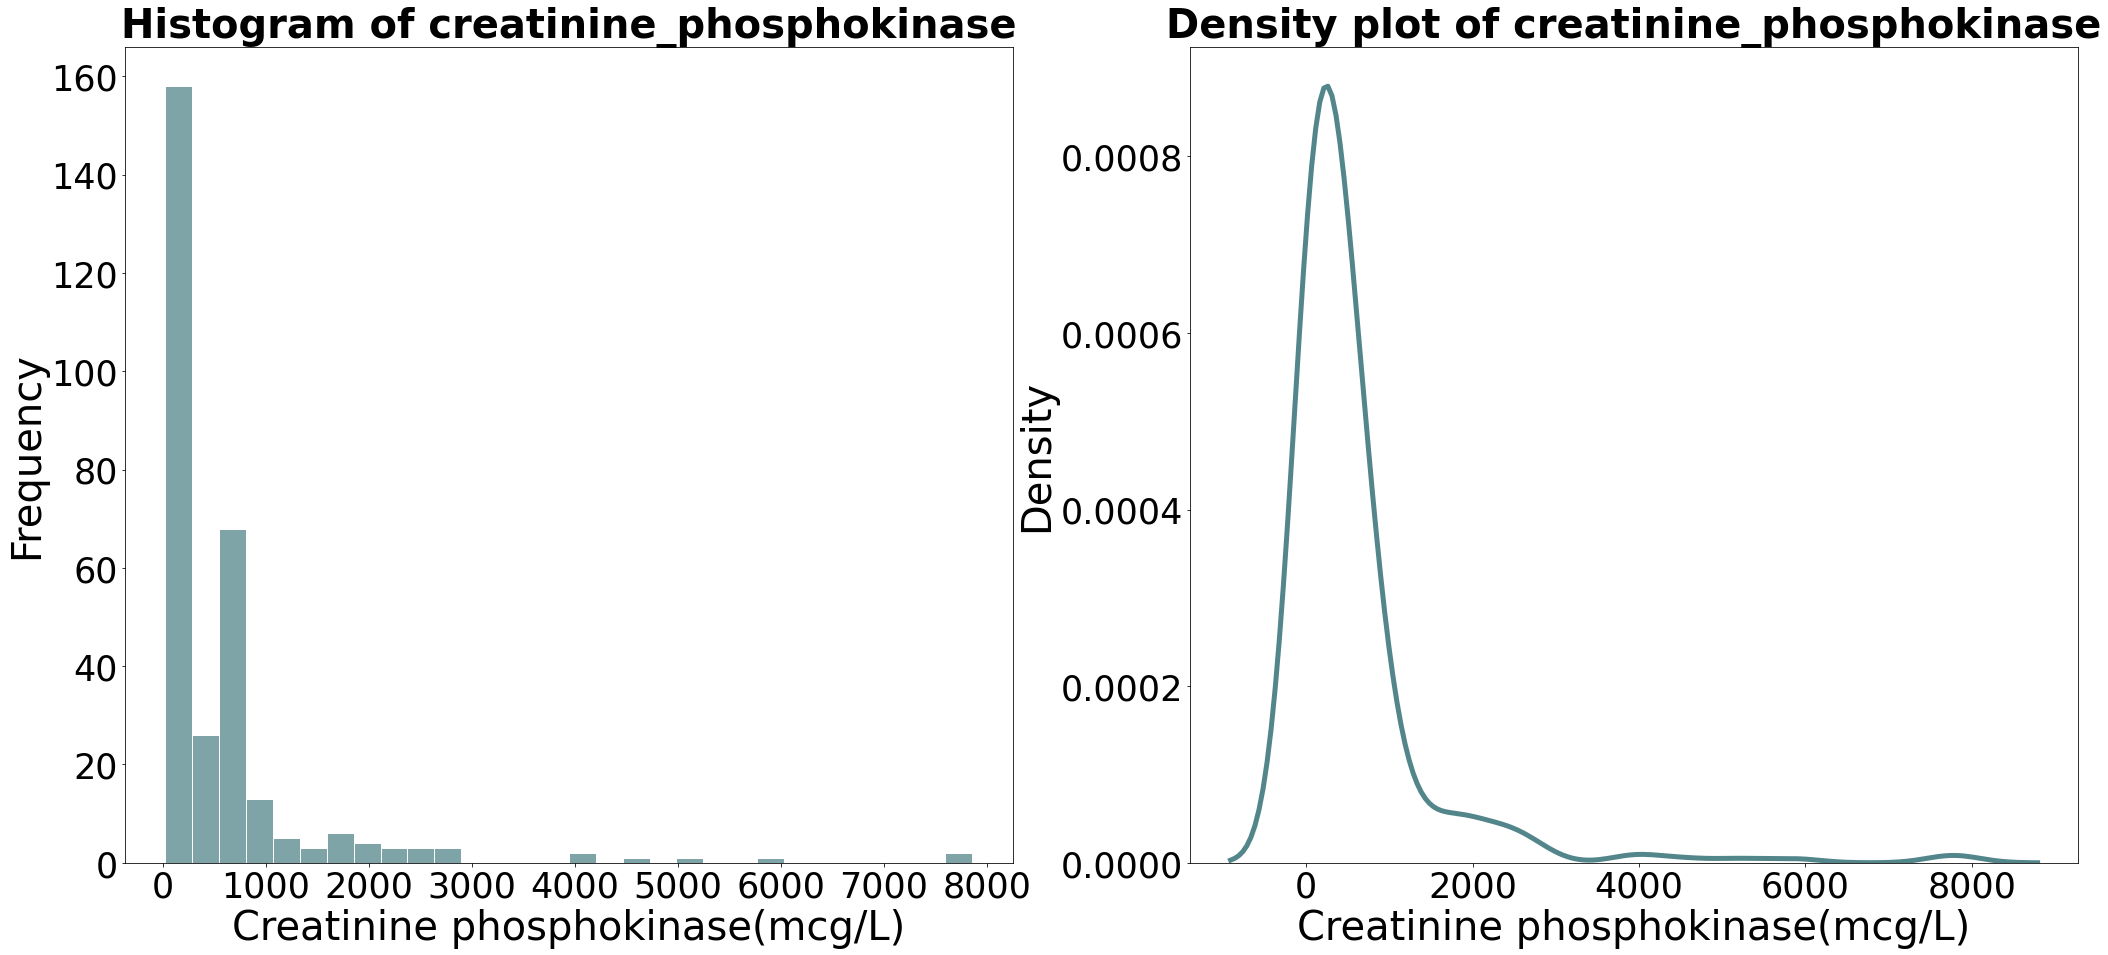

In [18]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='creatinine_phosphokinase',bins=30,edgecolor='white',color="#53868B")

plt.title("Histogram of creatinine_phosphokinase",fontsize=40,fontweight="bold")
plt.xlabel("Creatinine phosphokinase(mcg/L)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.creatinine_phosphokinase,bins=11,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of creatinine_phosphokinase",fontsize=40,fontweight="bold")
plt.xlabel("Creatinine phosphokinase(mcg/L)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

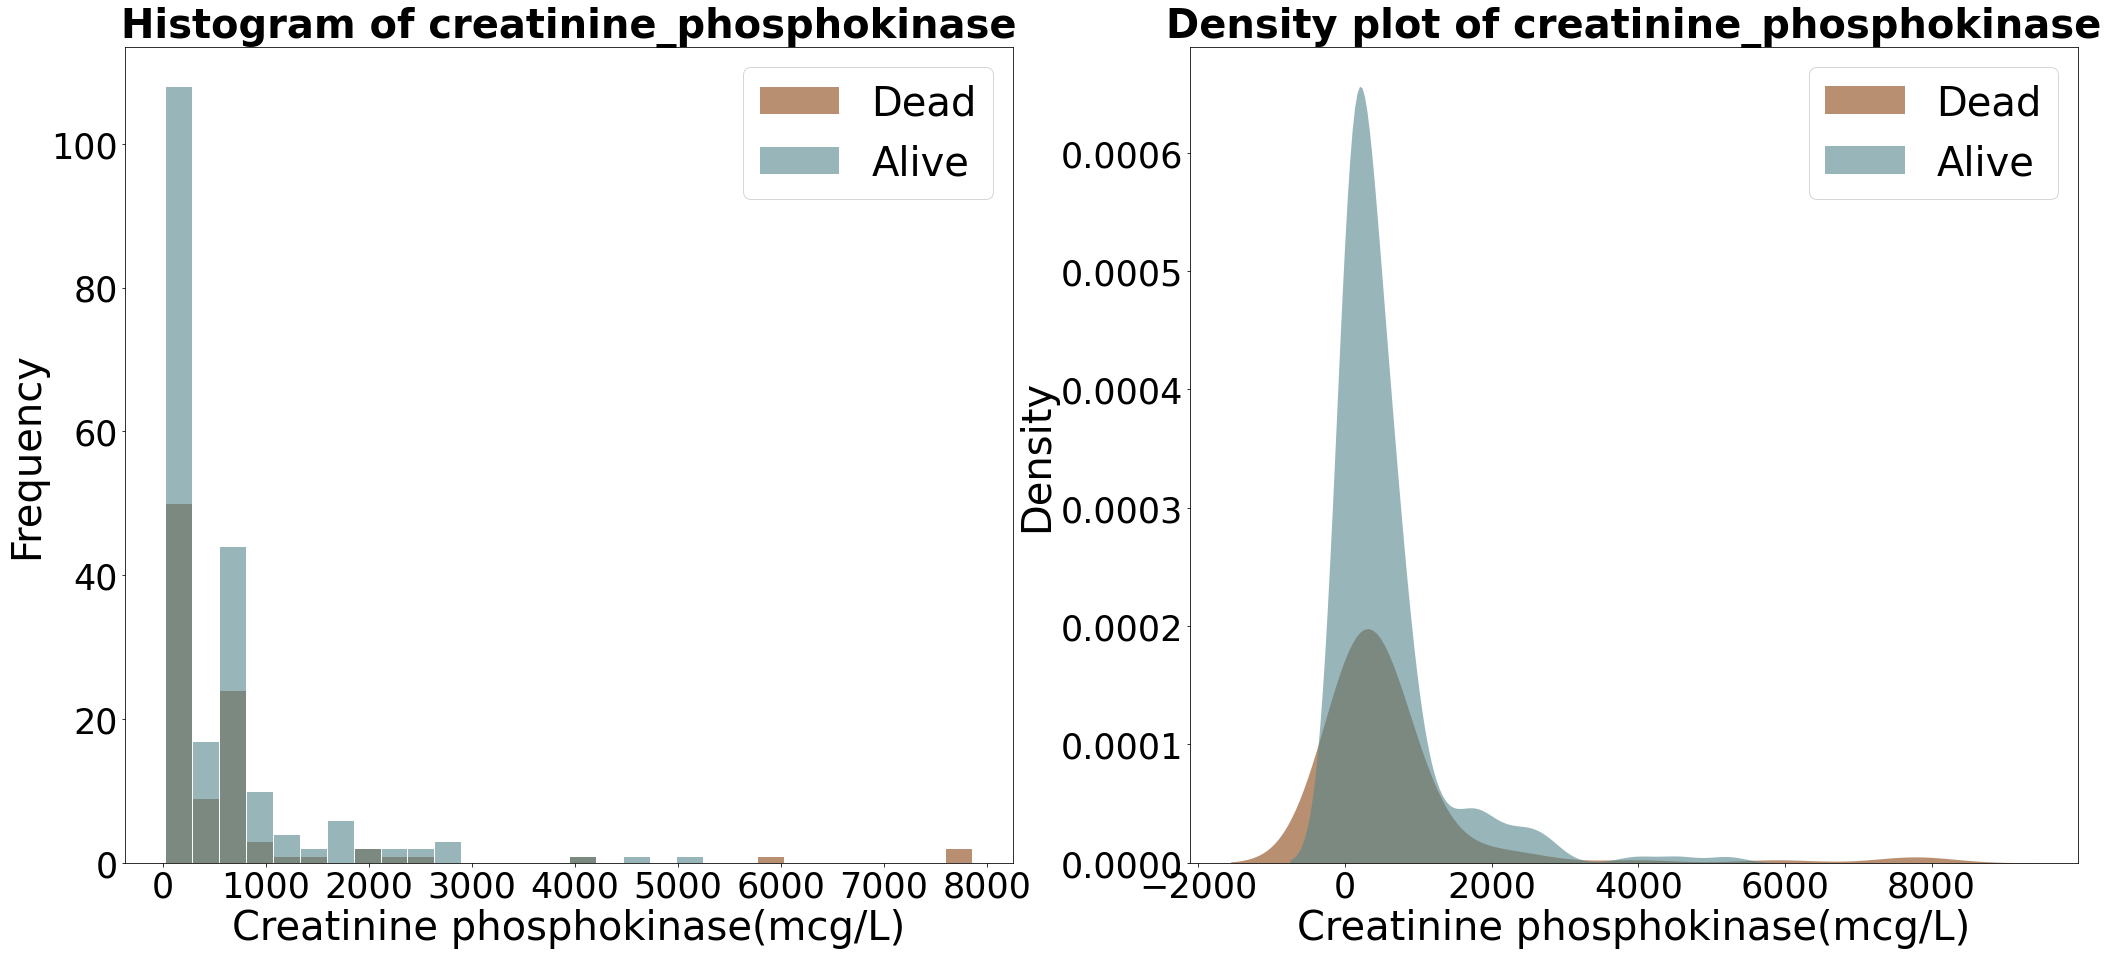

In [19]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

plot1 = sns.histplot(data=patient_data,x='creatinine_phosphokinase',bins=30,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","DEad"])

plt.title("Histogram of creatinine_phosphokinase",fontsize=40,fontweight="bold")
plt.xlabel("Creatinine phosphokinase(mcg/L)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
plot2 = sns.kdeplot(x='creatinine_phosphokinase',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of creatinine_phosphokinase",fontsize=40,fontweight="bold")
plt.xlabel("Creatinine phosphokinase(mcg/L)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## Attribute 'ejection_fraction'

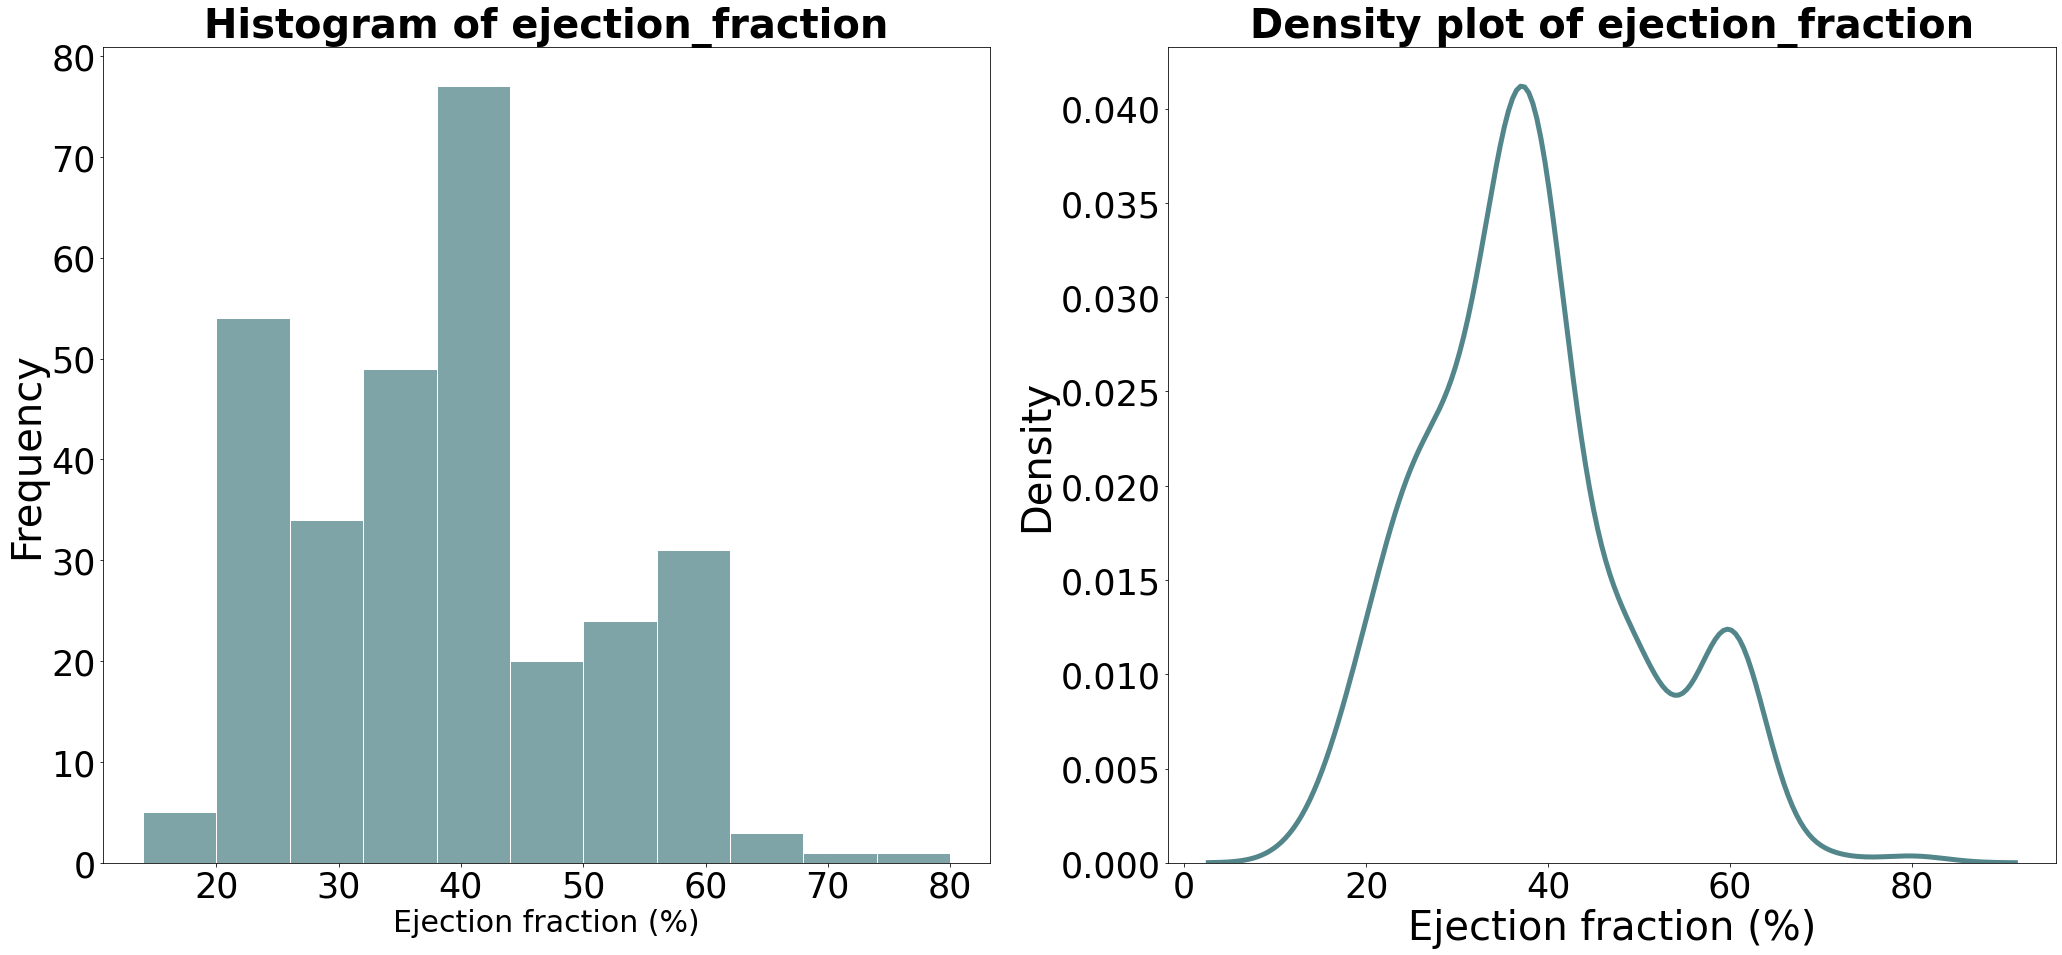

In [20]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='ejection_fraction',bins=11,edgecolor='white',color="#53868B")

plt.title("Histogram of ejection_fraction",fontsize=40,fontweight="bold")
plt.xlabel("Ejection fraction (%)",fontsize=30)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.ejection_fraction,bins=11,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of ejection_fraction",fontsize=40,fontweight="bold")
plt.xlabel("Ejection fraction (%)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

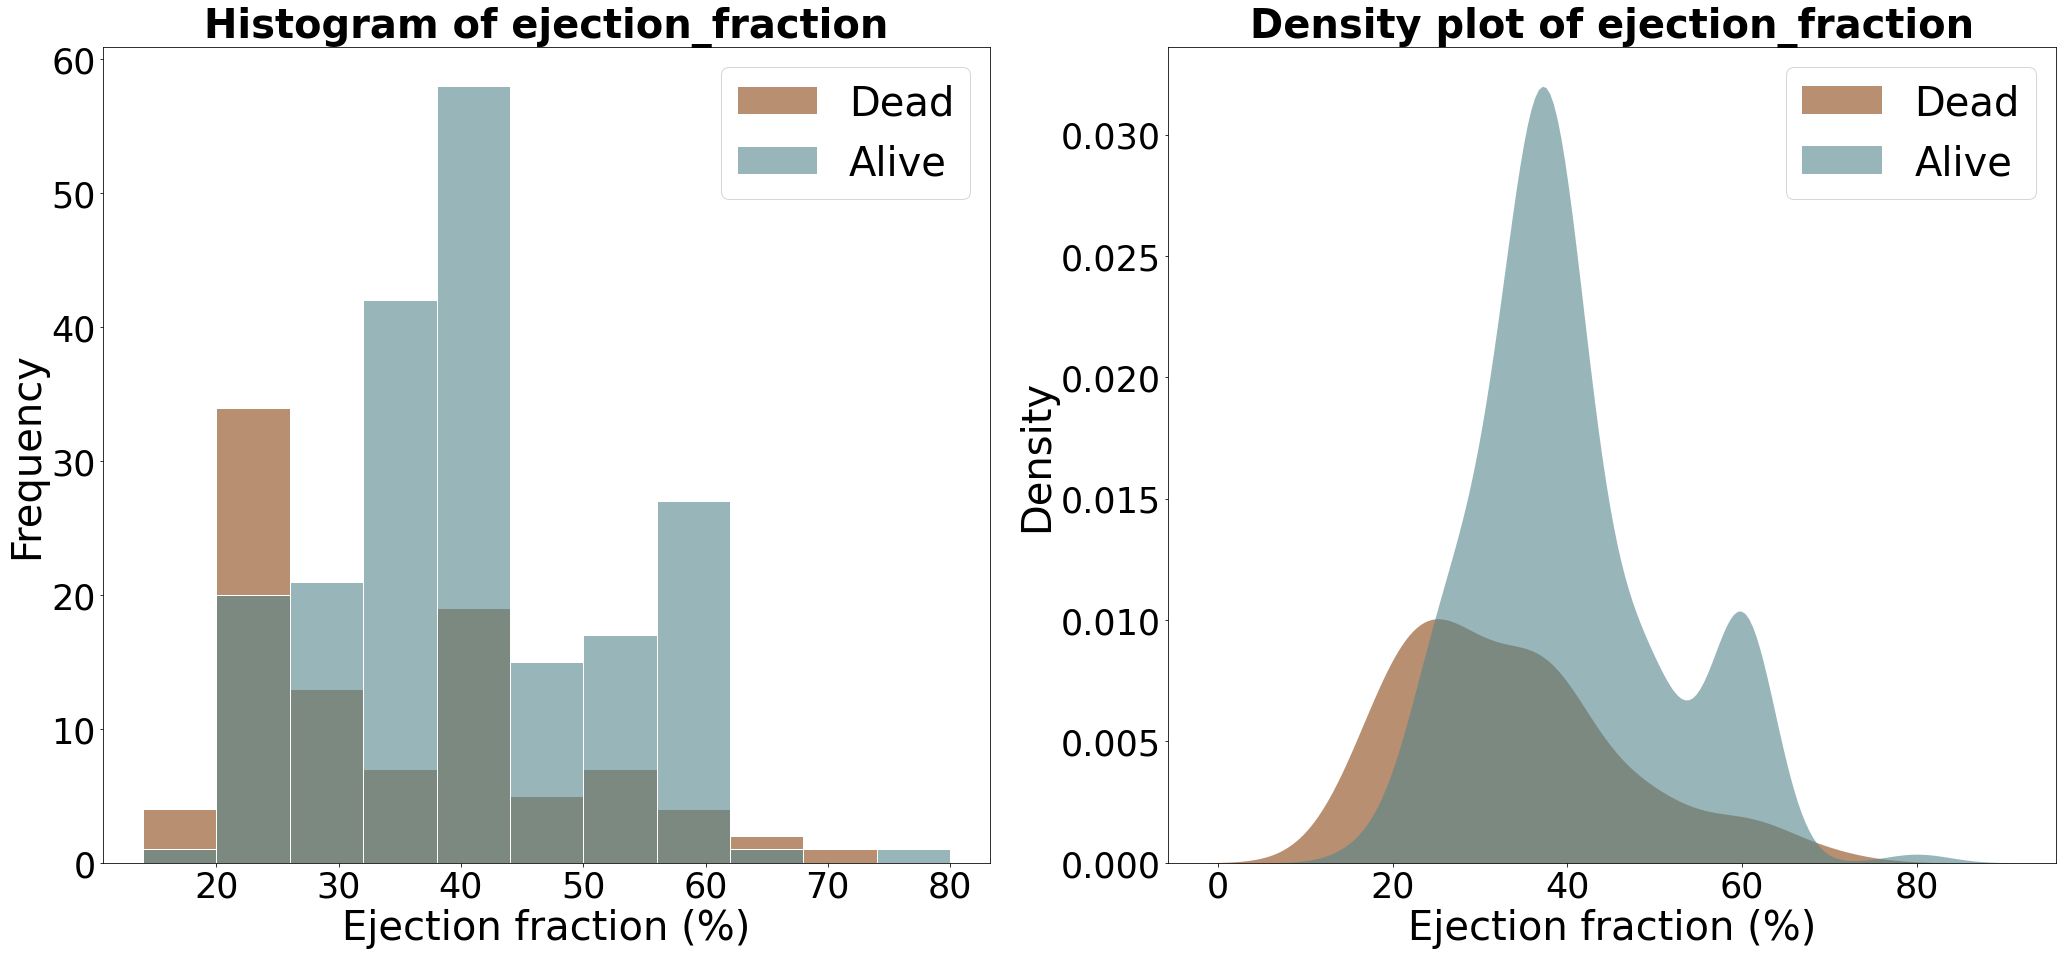

In [21]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='ejection_fraction',bins=11,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","Dead"])

plt.title("Histogram of ejection_fraction",fontsize=40,fontweight="bold")
plt.xlabel("Ejection fraction (%)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
sns.kdeplot(x='ejection_fraction',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of ejection_fraction",fontsize=40,fontweight="bold")
plt.xlabel("Ejection fraction (%)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## Attribute 'platelets'

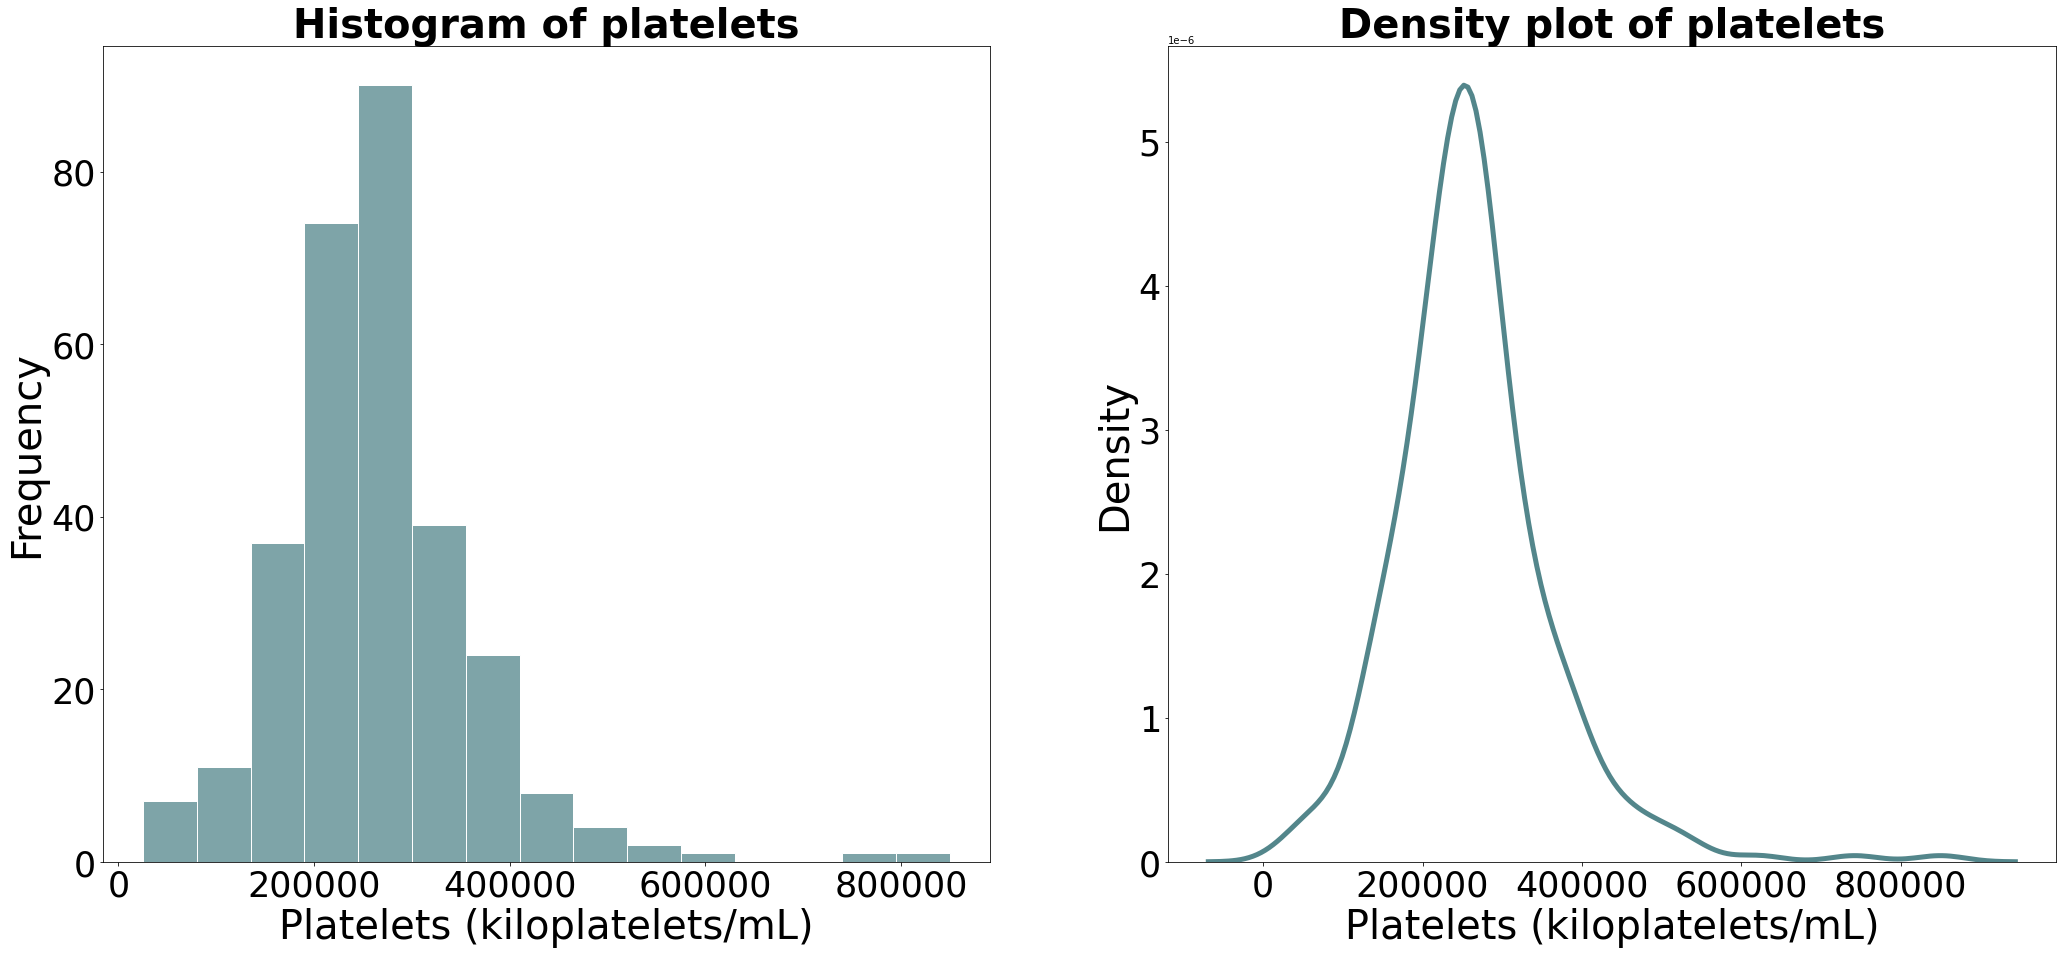

In [22]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='platelets',bins=15,edgecolor='white',color="#53868B")

plt.title("Histogram of platelets",fontsize=40,fontweight="bold")
plt.xlabel("Platelets (kiloplatelets/mL)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.platelets,bins=15,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of platelets",fontsize=40,fontweight="bold")
plt.xlabel("Platelets (kiloplatelets/mL)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

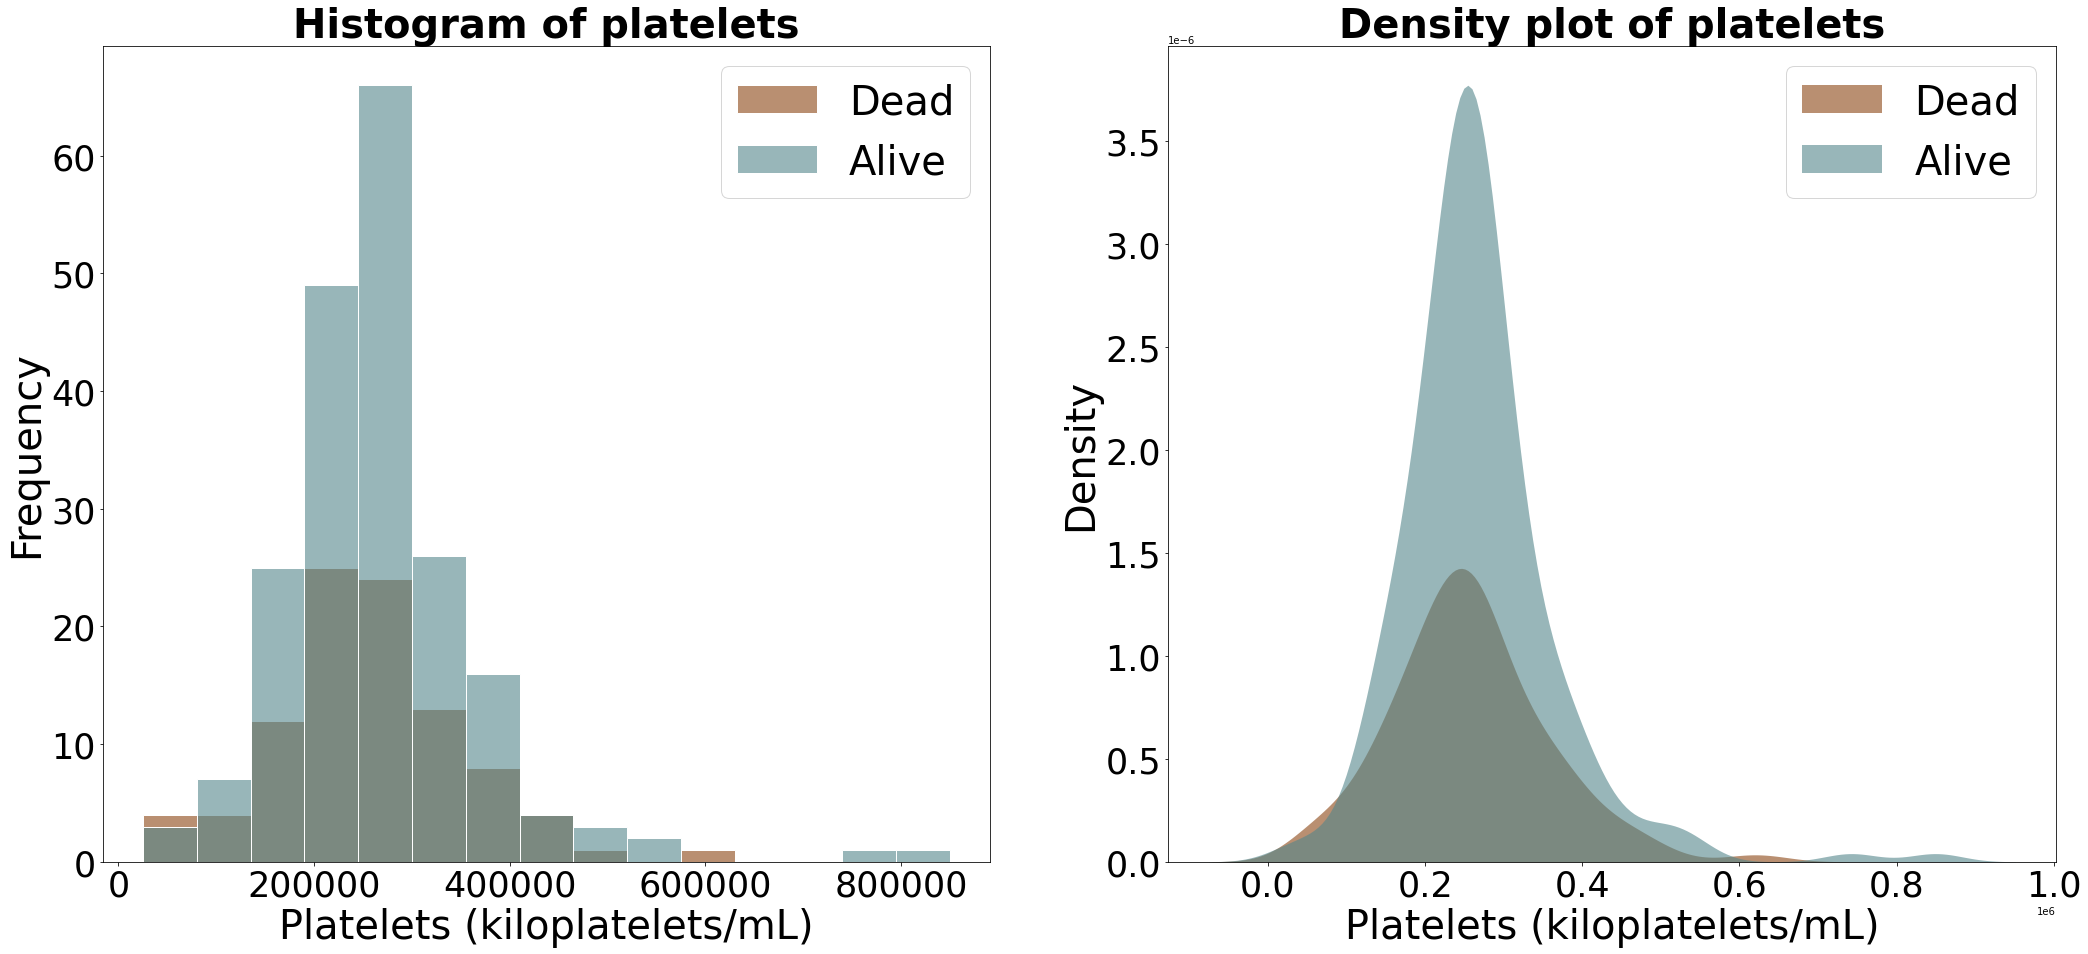

In [23]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='platelets',bins=15,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","Dead"])

plt.title("Histogram of platelets",fontsize=40,fontweight="bold")
plt.xlabel("Platelets (kiloplatelets/mL)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
sns.kdeplot(x='platelets',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of platelets",fontsize=40,fontweight="bold")
plt.xlabel("Platelets (kiloplatelets/mL)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## Attribute 'serum_creatinine'

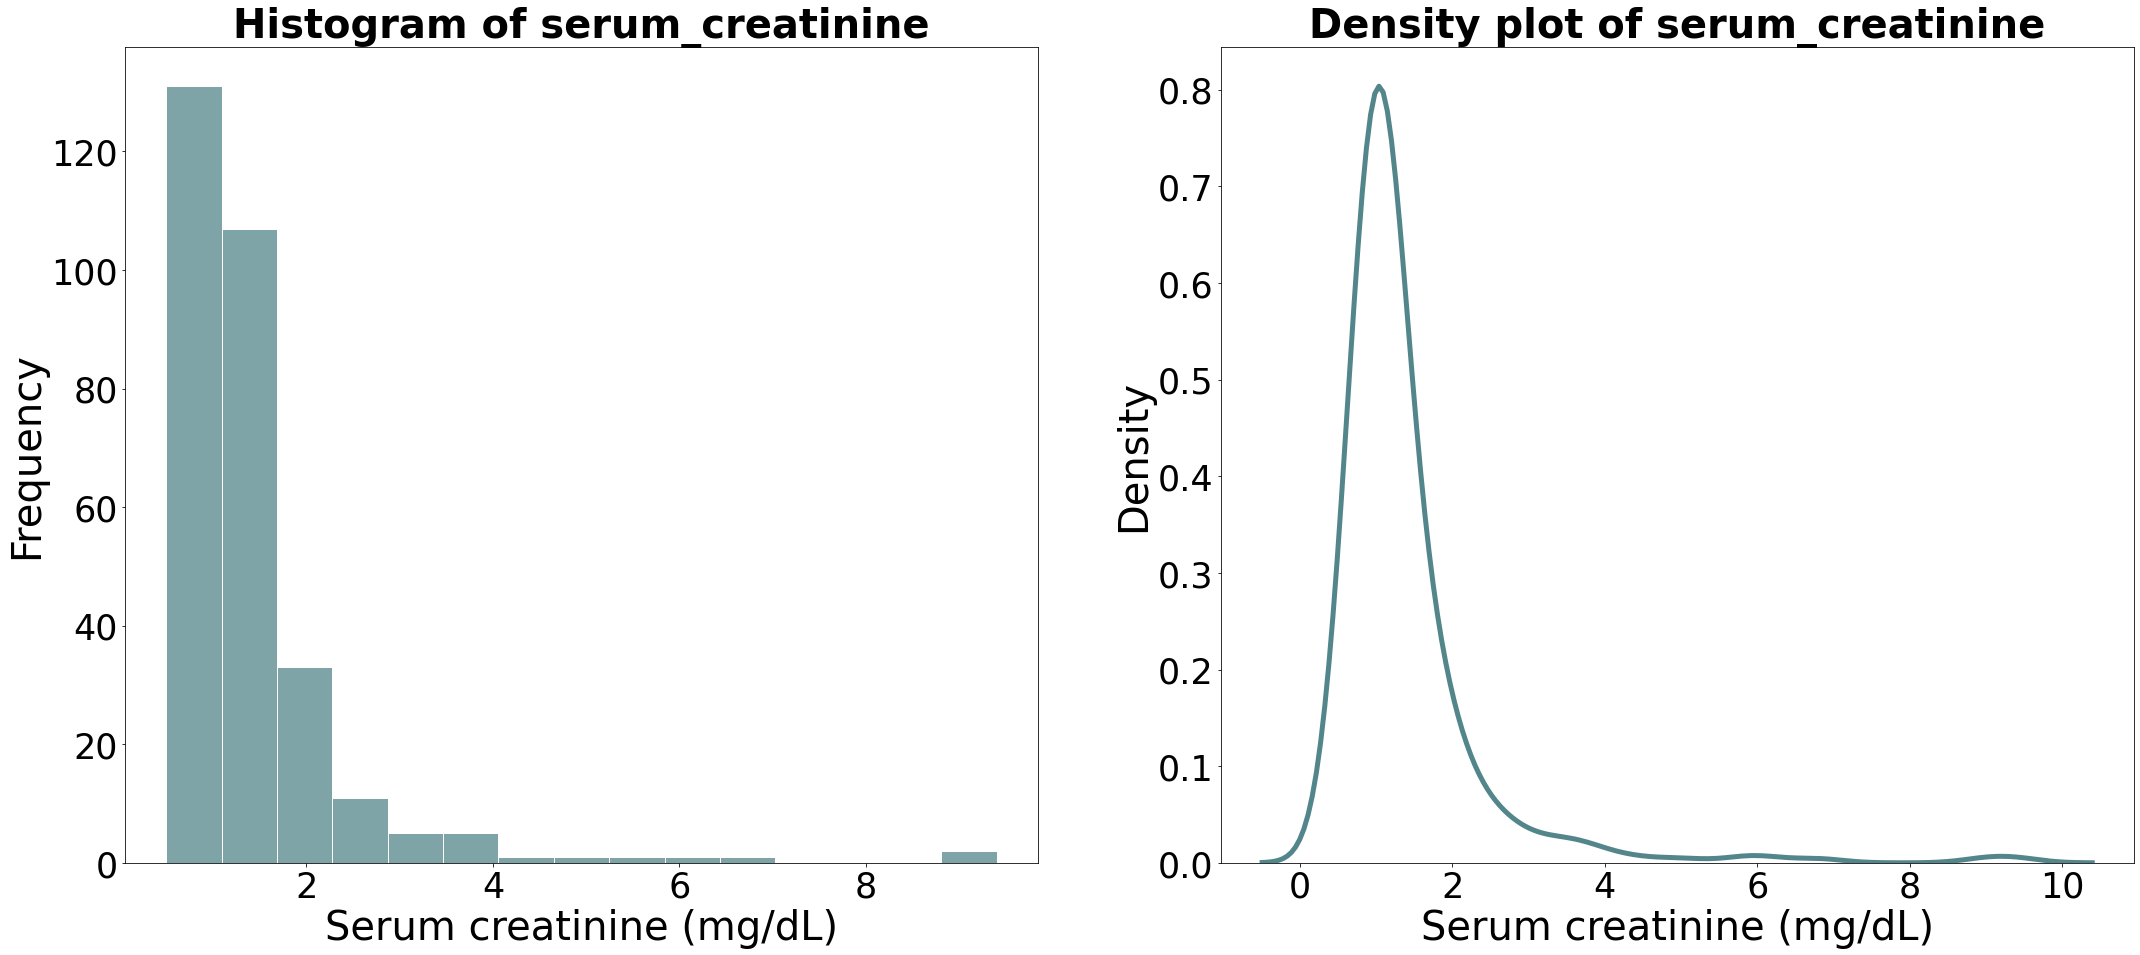

In [24]:
plt.figure(figsize=(36,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='serum_creatinine',bins=15,edgecolor='white',color="#53868B")

plt.title("Histogram of serum_creatinine",fontsize=40,fontweight="bold")
plt.xlabel("Serum creatinine (mg/dL)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.serum_creatinine,bins=15,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of serum_creatinine",fontsize=40,fontweight="bold")
plt.xlabel("Serum creatinine (mg/dL)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

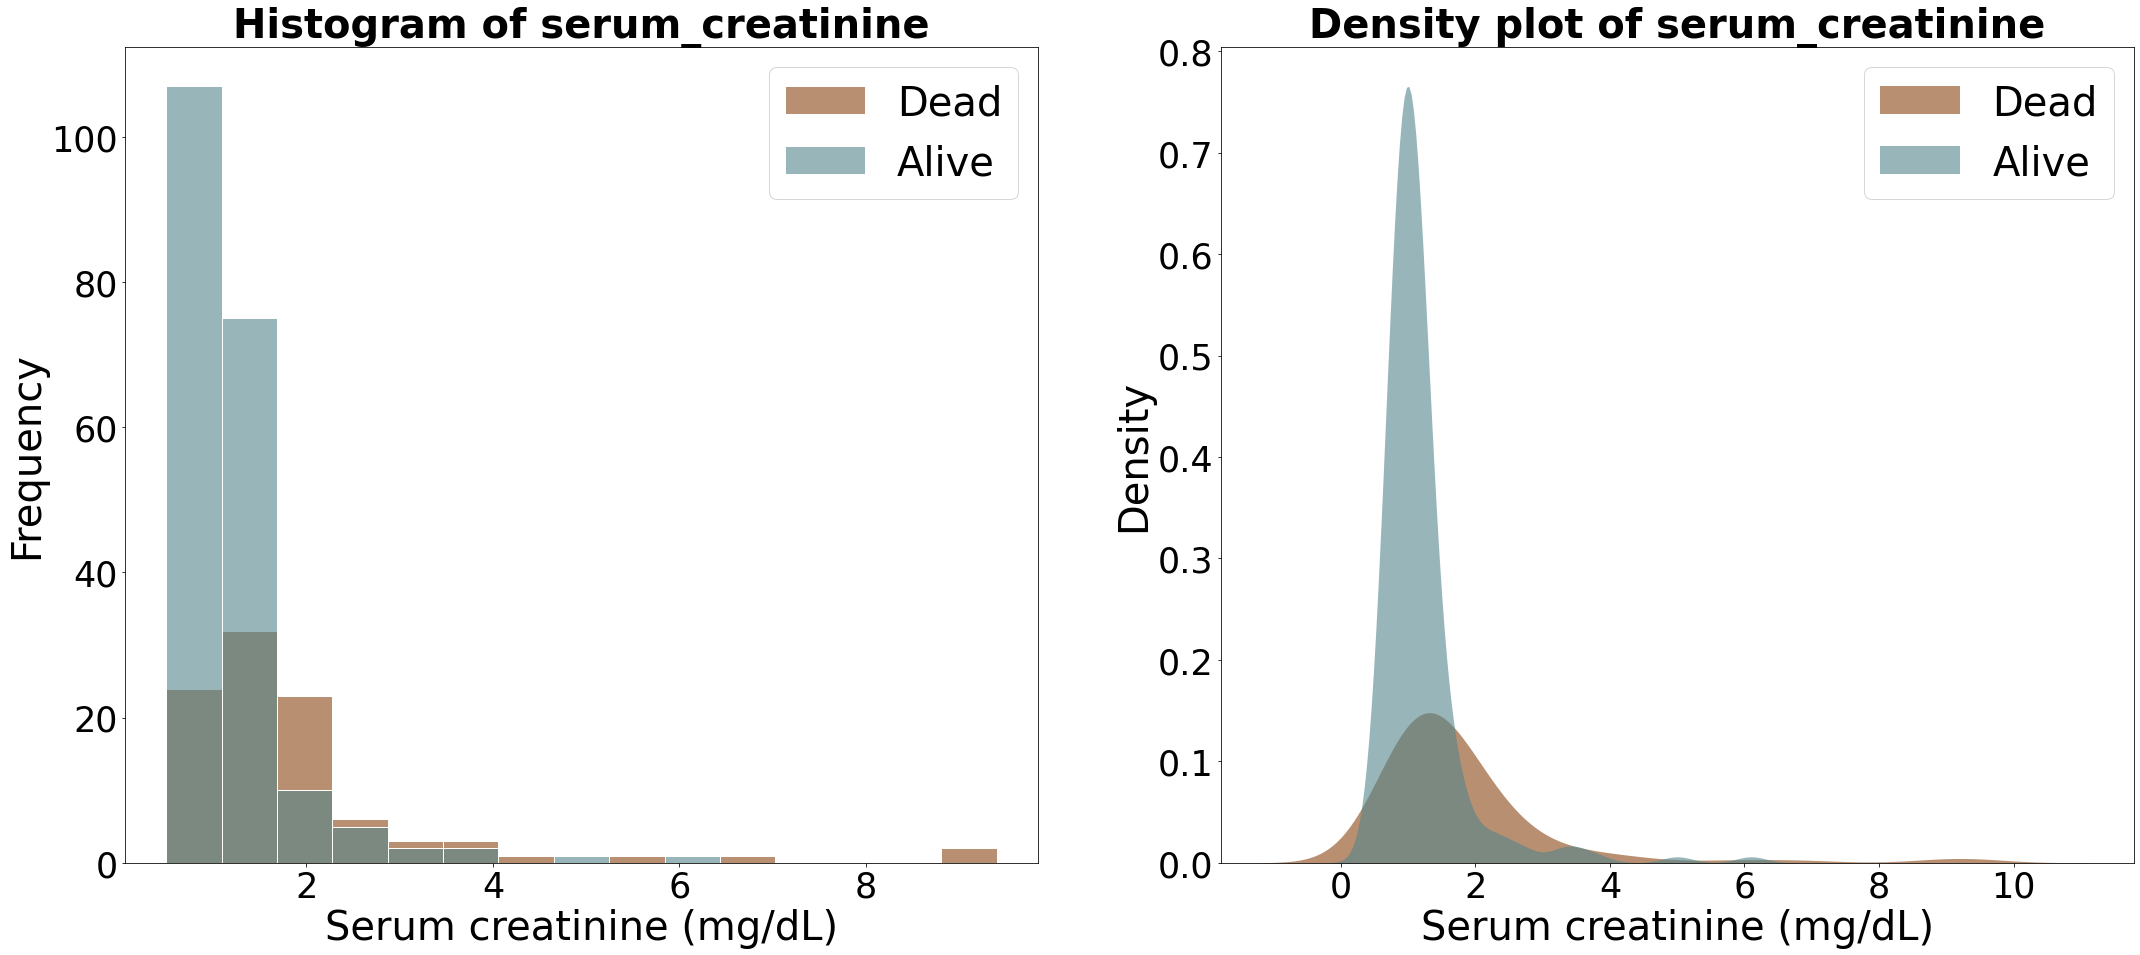

In [25]:
plt.figure(figsize=(36,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='serum_creatinine',bins=15,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","Dead"])

plt.title("Histogram of serum_creatinine",fontsize=40,fontweight="bold")
plt.xlabel("Serum creatinine (mg/dL)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
sns.kdeplot(x='serum_creatinine',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of serum_creatinine",fontsize=40,fontweight="bold")
plt.xlabel("Serum creatinine (mg/dL)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## Attribute 'serum_sodium'

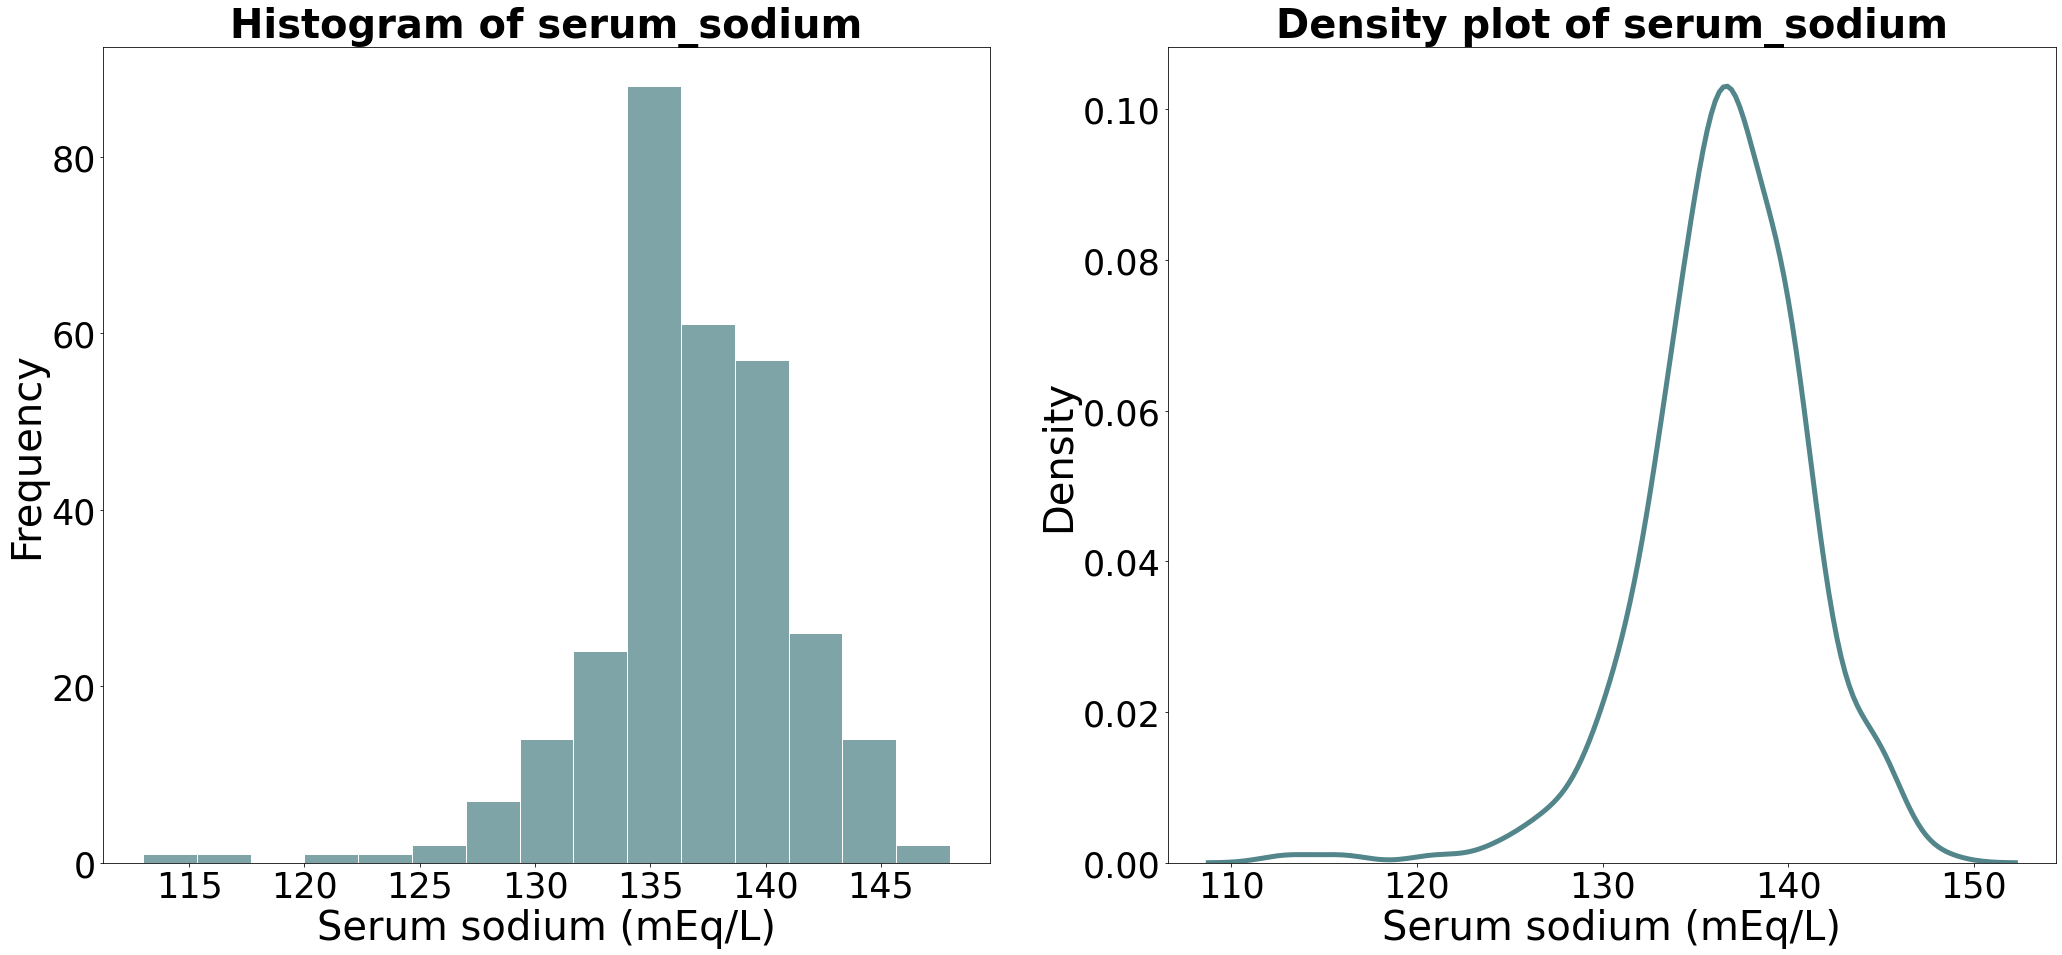

In [26]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='serum_sodium',bins=15,edgecolor='white',color="#53868B")

plt.title("Histogram of serum_sodium",fontsize=40,fontweight="bold")
plt.xlabel("Serum sodium (mEq/L)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.serum_sodium,bins=15,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of serum_sodium",fontsize=40,fontweight="bold")
plt.xlabel("Serum sodium (mEq/L)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

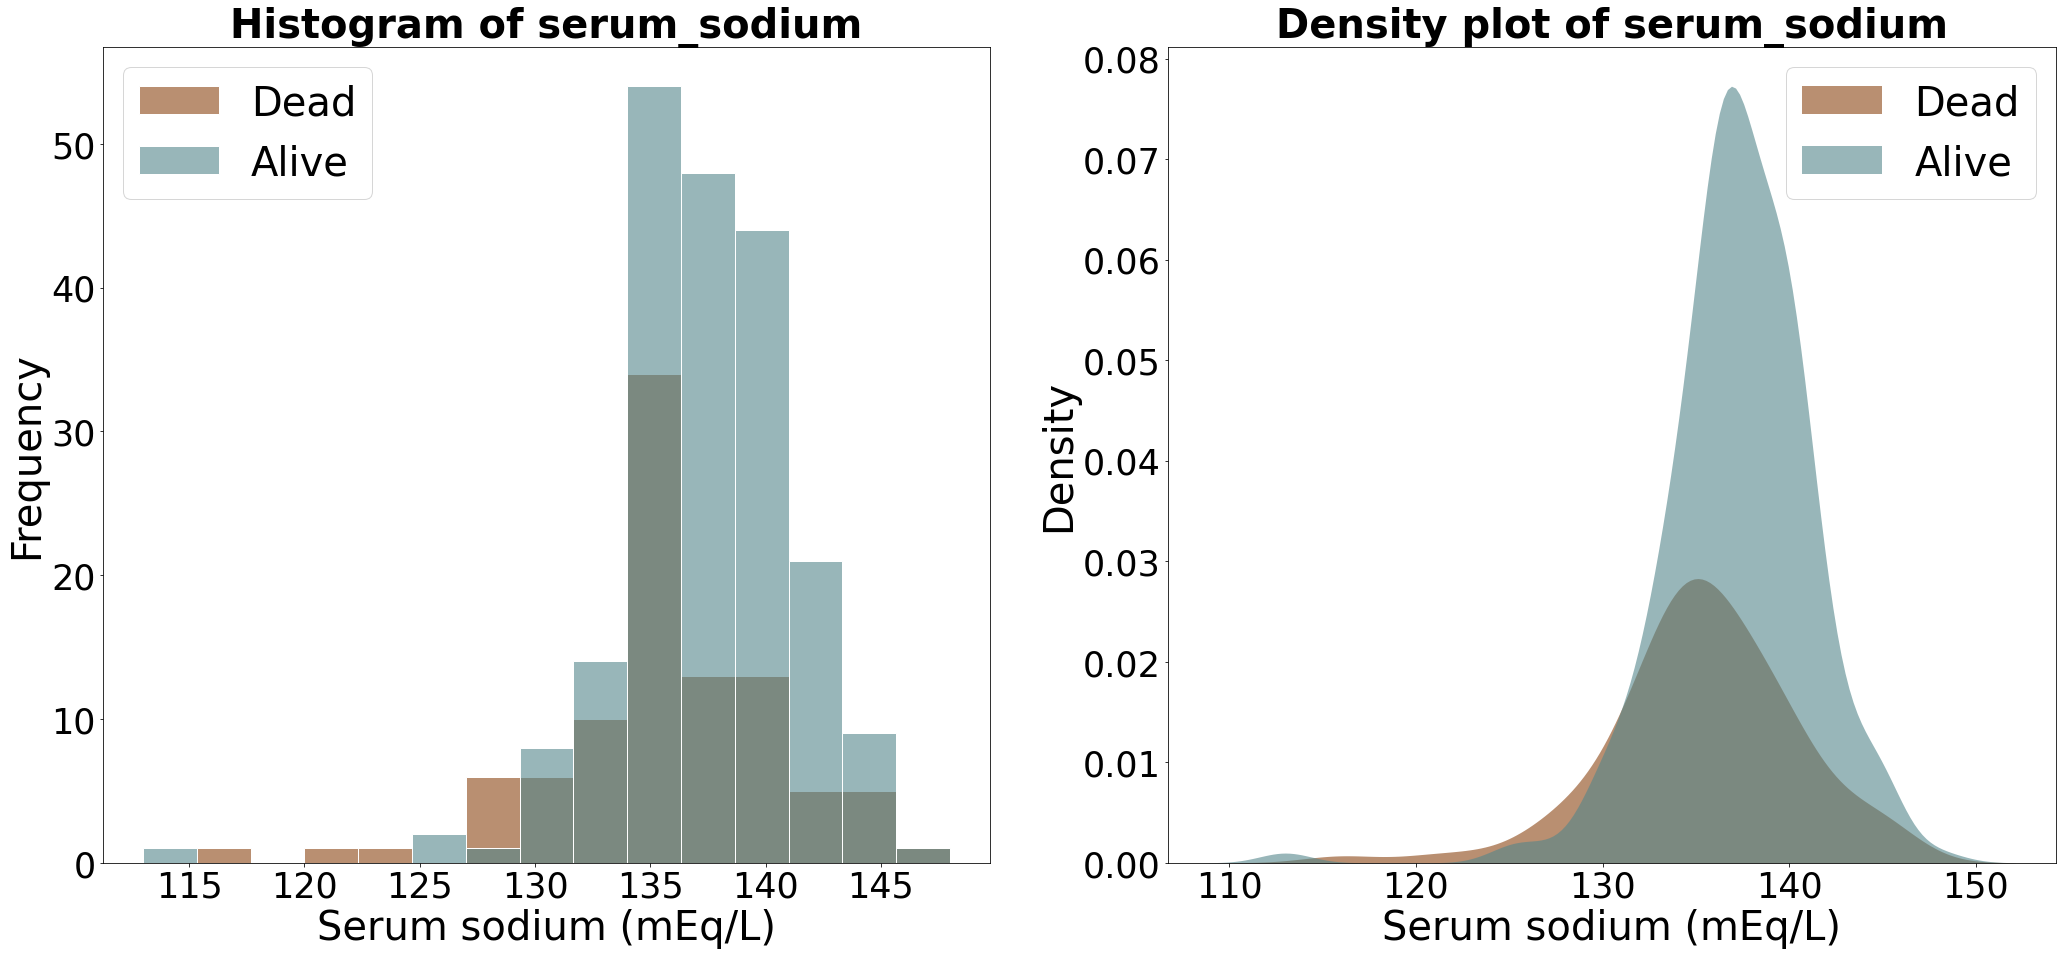

In [27]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='serum_sodium',bins=15,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","Dead"])

plt.title("Histogram of serum_sodium",fontsize=40,fontweight="bold")
plt.xlabel("Serum sodium (mEq/L)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
sns.kdeplot(x='serum_sodium',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of serum_sodium",fontsize=40,fontweight="bold")
plt.xlabel("Serum sodium (mEq/L)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## Attribute 'time'

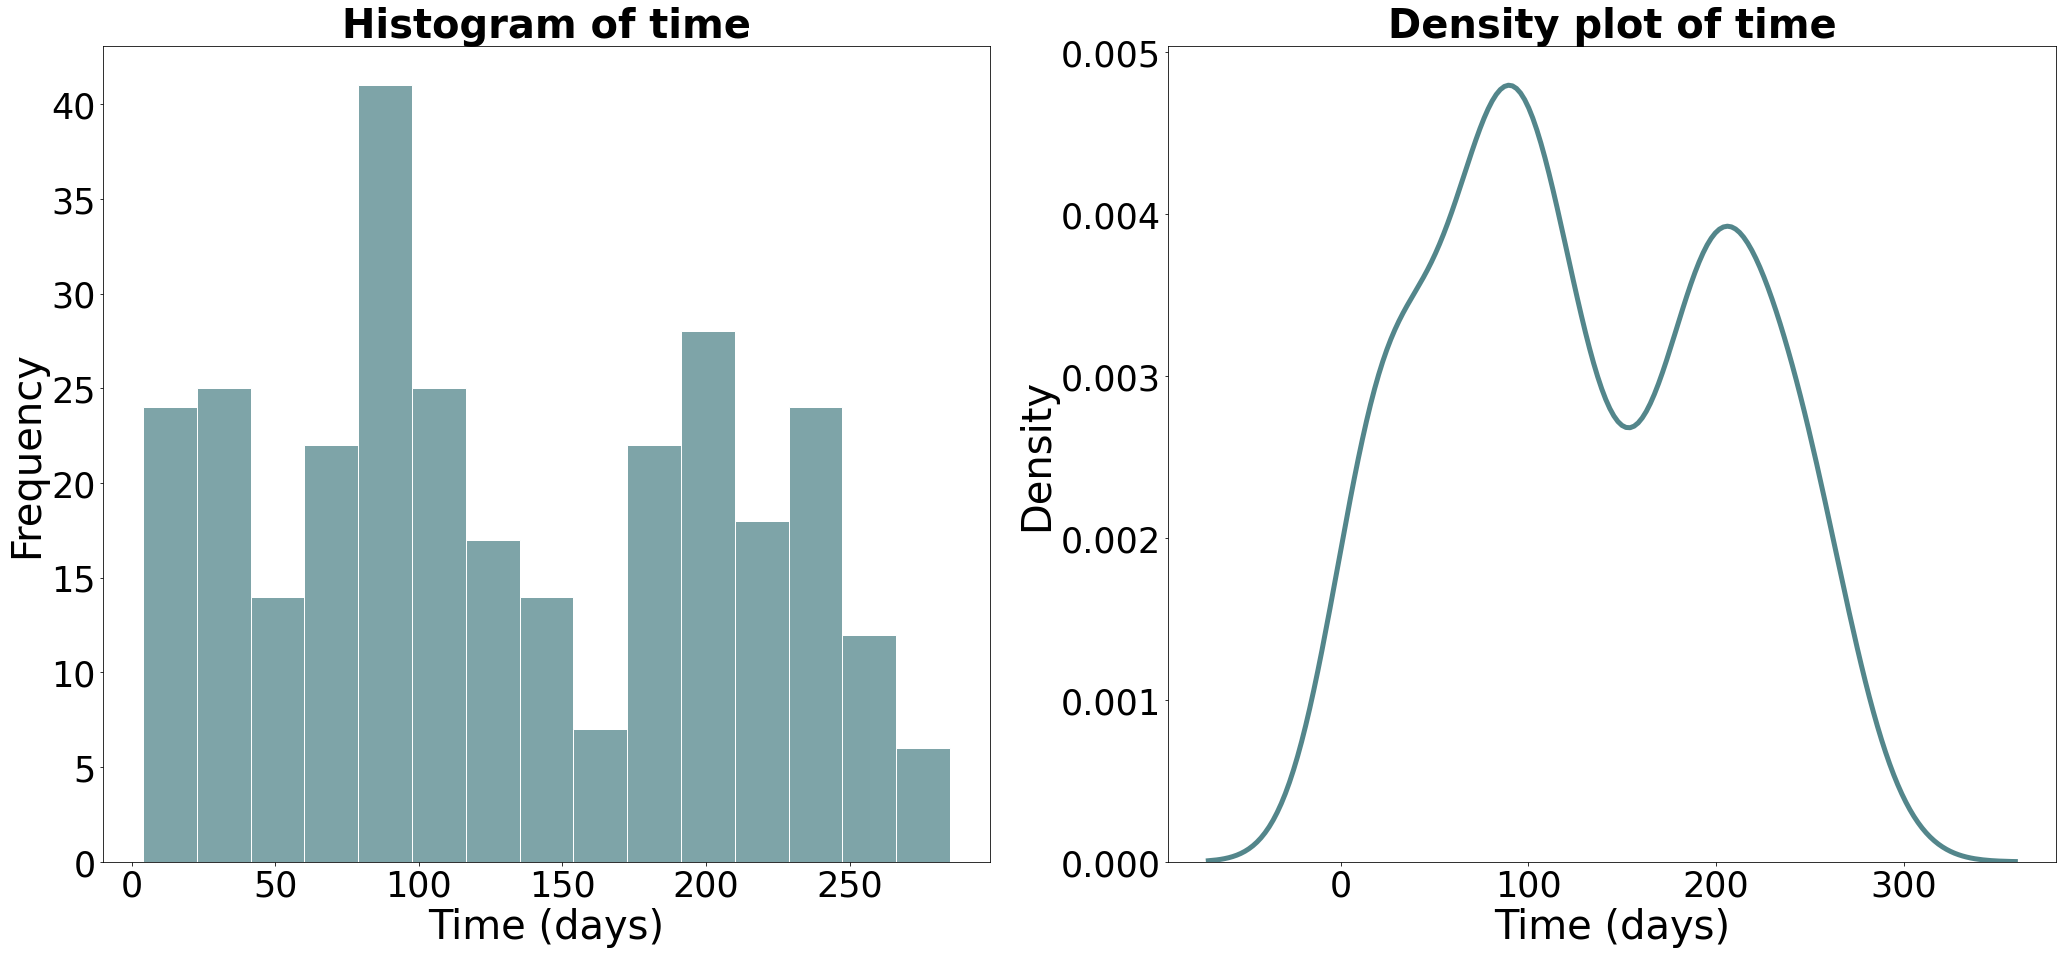

In [28]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='time',bins=15,edgecolor='white',color="#53868B")

plt.title("Histogram of time",fontsize=40,fontweight="bold")
plt.xlabel("Time (days)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


plt.subplot(1, 2, 2)
sns.distplot(a=patient_data.time,bins=15,hist=False,color="#53868B",kde_kws=dict(linewidth=5))

plt.title("Density plot of time",fontsize=40,fontweight="bold")
plt.xlabel("Time (days)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

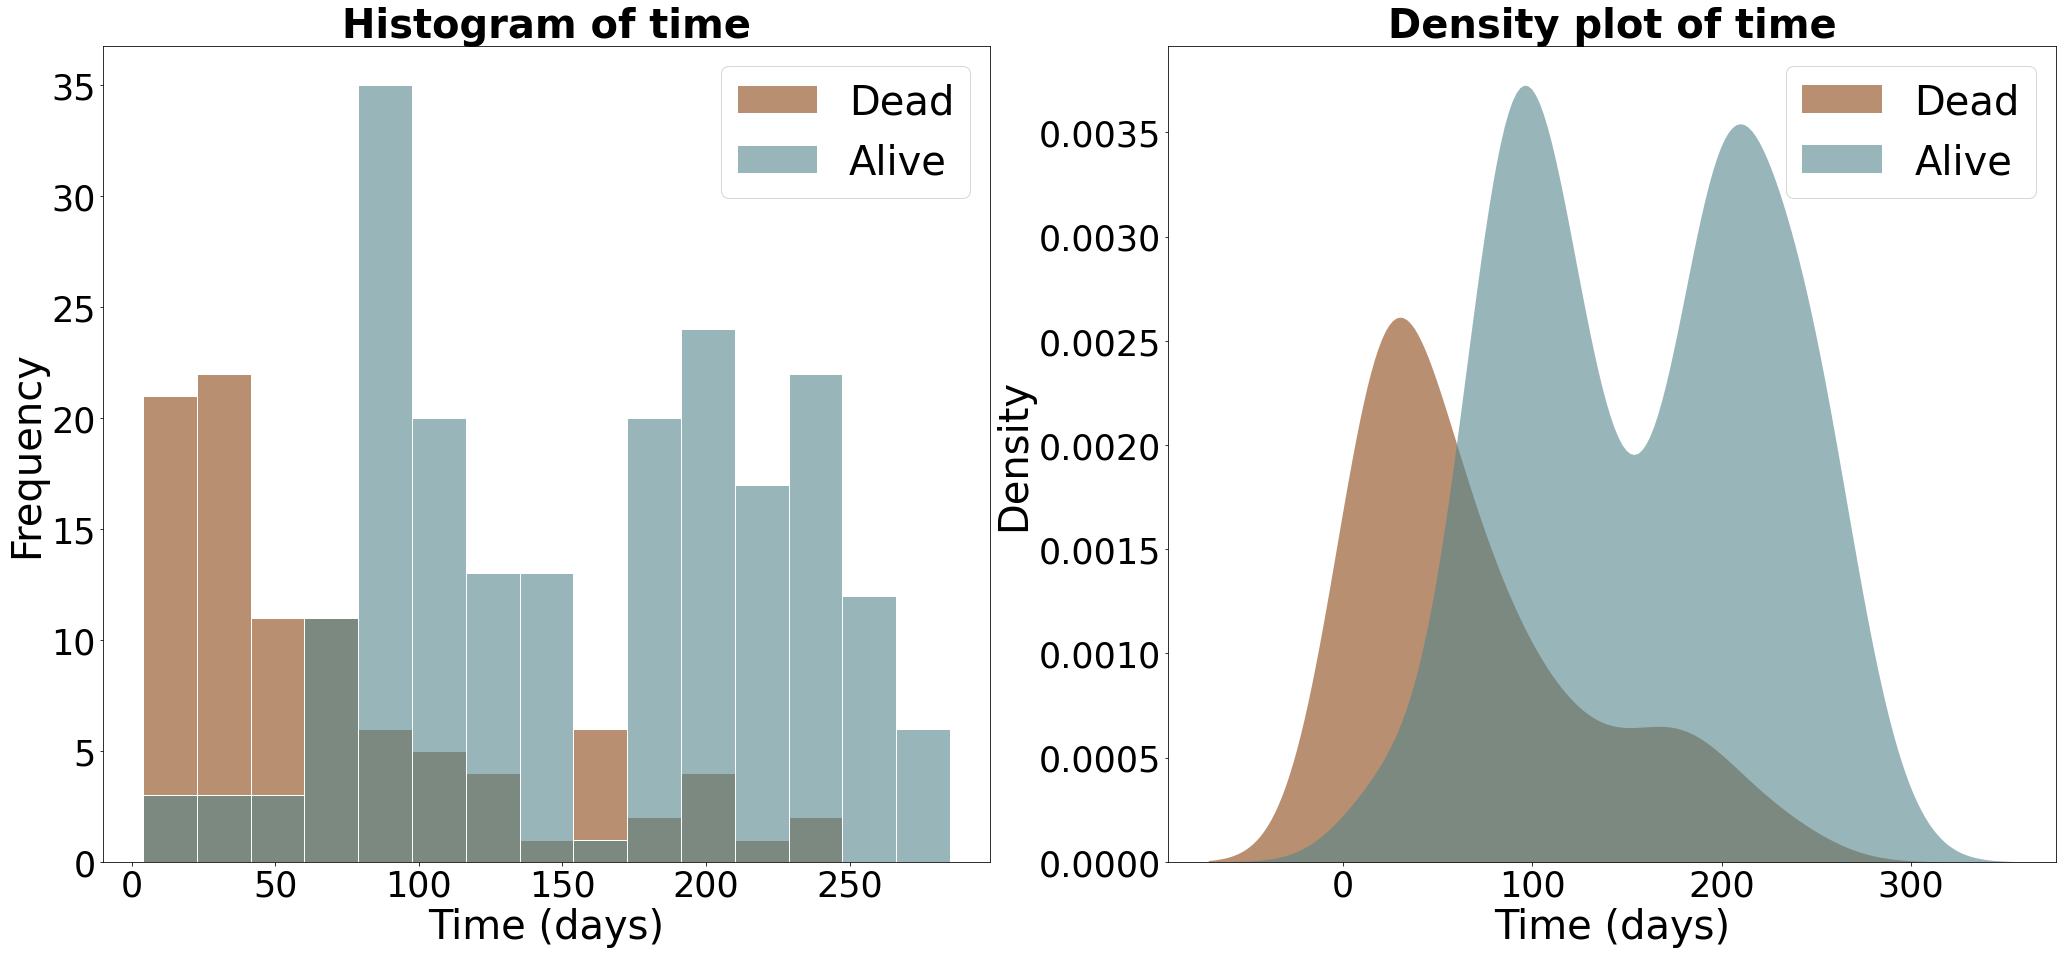

In [29]:
plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)

sns.histplot(data=patient_data,x='time',bins=15,hue="DEATH_EVENT",
                     edgecolor='white',alpha=0.6,palette=["#53868B","#8B4513"],label=["Alive","Dead"])

plt.title("Histogram of time",fontsize=40,fontweight="bold")
plt.xlabel("Time (days)",fontsize=40)
plt.ylabel("Frequency",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40)

plt.subplot(1, 2, 2)
sns.kdeplot(x='time',data=patient_data,hue='DEATH_EVENT',
                    palette=["#53868B","#8B4513"],alpha=0.6, linewidth=0,fill=True)
plt.title("Density plot of time",fontsize=40,fontweight="bold")
plt.xlabel("Time (days)",fontsize=40)
plt.ylabel("Density",fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(labels=["Dead","Alive"],fontsize=40) 
plt.show()




## 1.2 Count plot for categorical attributes

In [30]:
categorical =[]
for data in patient_data.columns:
    if patient_data[data].nunique()<5:
        categorical.append(data)
categorical

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

## Attribute 'anaemia'

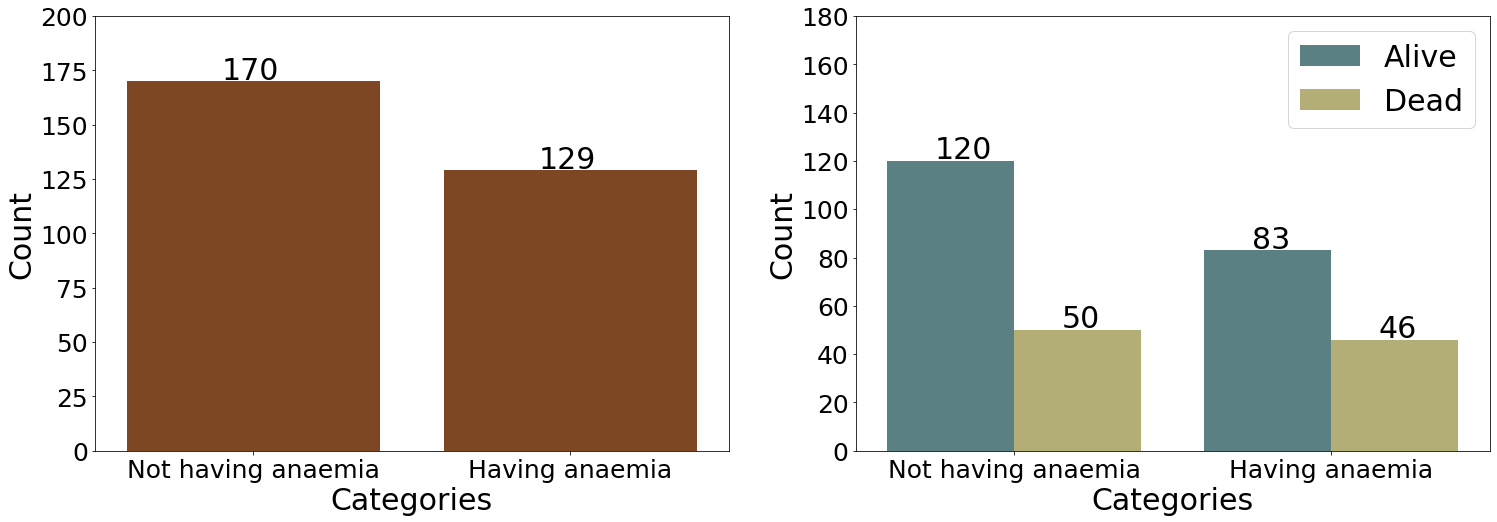

In [31]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(5,5))
ax = sns.countplot(x="anaemia", data=patient_data,color="#8B4513")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Not having anaemia","Having anaemia"],fontsize=25)
plt.ylim(0,200)
#plt.title("Count plot of 'anaemia'")
plt.yticks(fontsize=25)


plt.subplot(1, 2, 2)

ax = sns.countplot(x="anaemia", data=patient_data,palette=["#53868B",'#BDB76B'],hue="DEATH_EVENT")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Not having anaemia","Having anaemia"],fontsize=25)
plt.ylim(0,180)
#plt.title("Count plot of 'anaemia'")
plt.legend(["Alive","Dead"],fontsize=30)
plt.yticks(fontsize=25)
plt.show()

## Attribute 'diabetes'

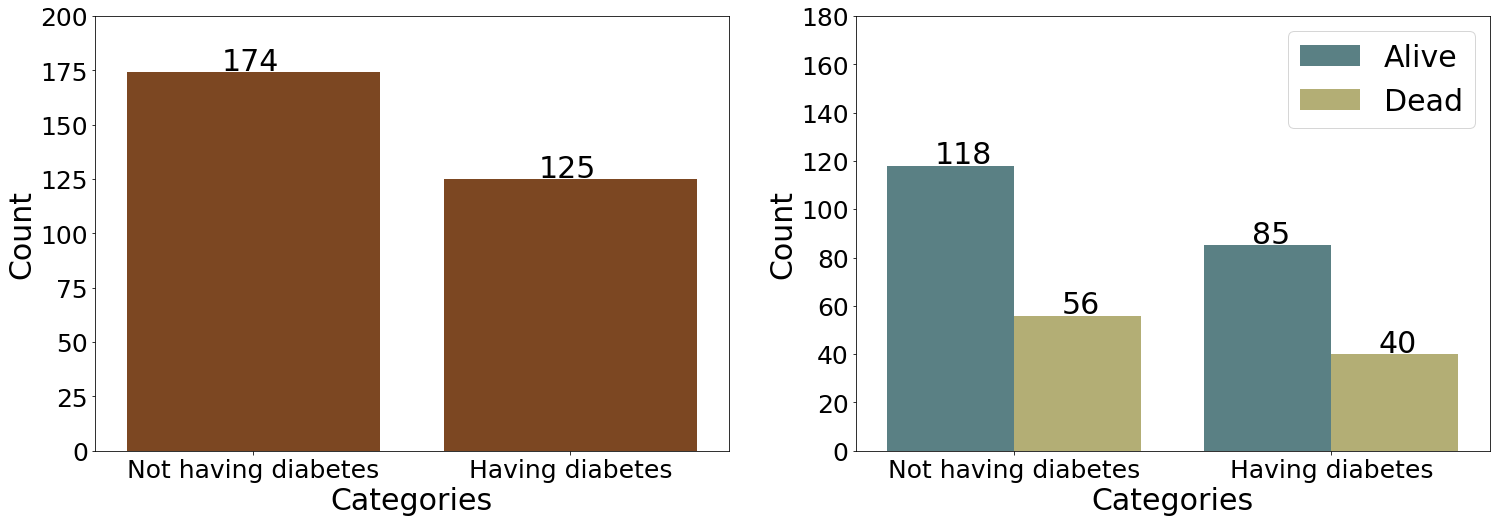

In [32]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(5,5))
ax = sns.countplot(x="diabetes", data=patient_data,color="#8B4513")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Not having diabetes","Having diabetes"],fontsize=25)
plt.ylim(0,200)
#plt.title("Count plot of 'anaemia'")
plt.yticks(fontsize=25)


plt.subplot(1, 2, 2)

ax = sns.countplot(x="diabetes", data=patient_data,palette=["#53868B",'#BDB76B'],hue="DEATH_EVENT")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Not having diabetes","Having diabetes"],fontsize=25)
plt.ylim(0,180)
#plt.title("Count plot of 'anaemia'")
plt.legend(["Alive","Dead"],fontsize=30)
plt.yticks(fontsize=25)
plt.show()

## Attribute 'sex'

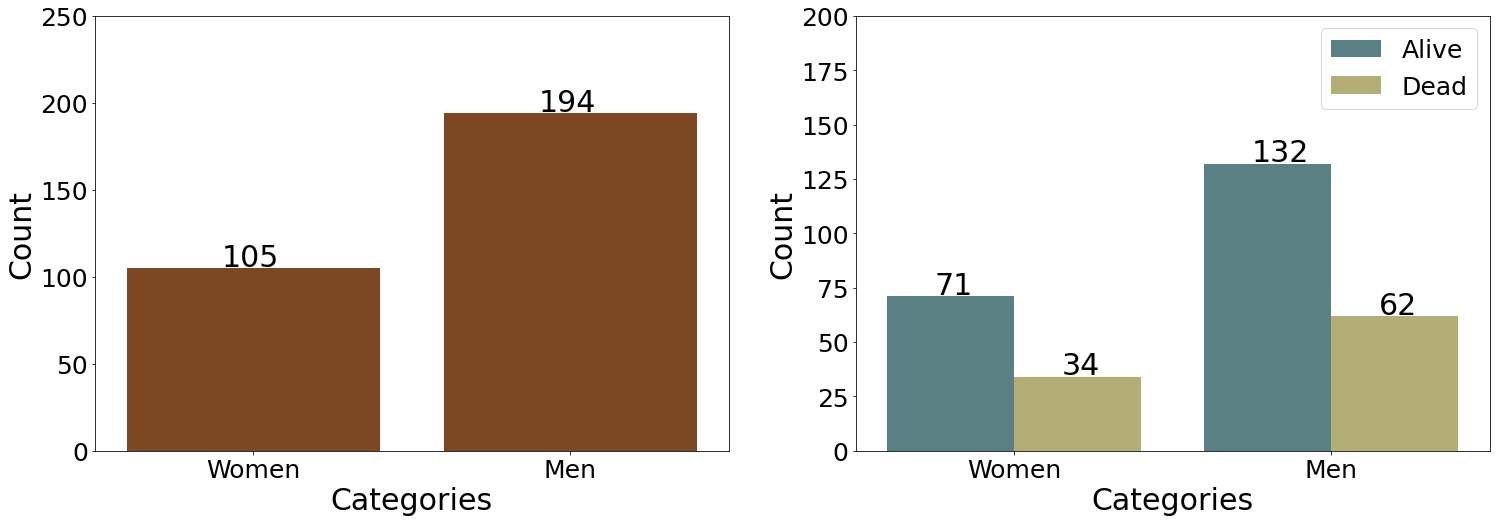

In [33]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(5,5))
ax = sns.countplot(x="sex", data=patient_data,color="#8B4513")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Women","Men"],fontsize=25)
plt.ylim(0,250)
#plt.title("Count plot of 'anaemia'")
plt.yticks(fontsize=25)



plt.subplot(1, 2, 2)

ax = sns.countplot(x="sex", data=patient_data,palette=["#53868B",'#BDB76B'],hue="DEATH_EVENT")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Women","Men"],fontsize=25)
plt.ylim(0,200)
#plt.title("Count plot of 'anaemia'")
plt.legend(["Alive","Dead"],fontsize=25)
plt.yticks(fontsize=25)

plt.show()

## Attribute 'high_blood_pressure'

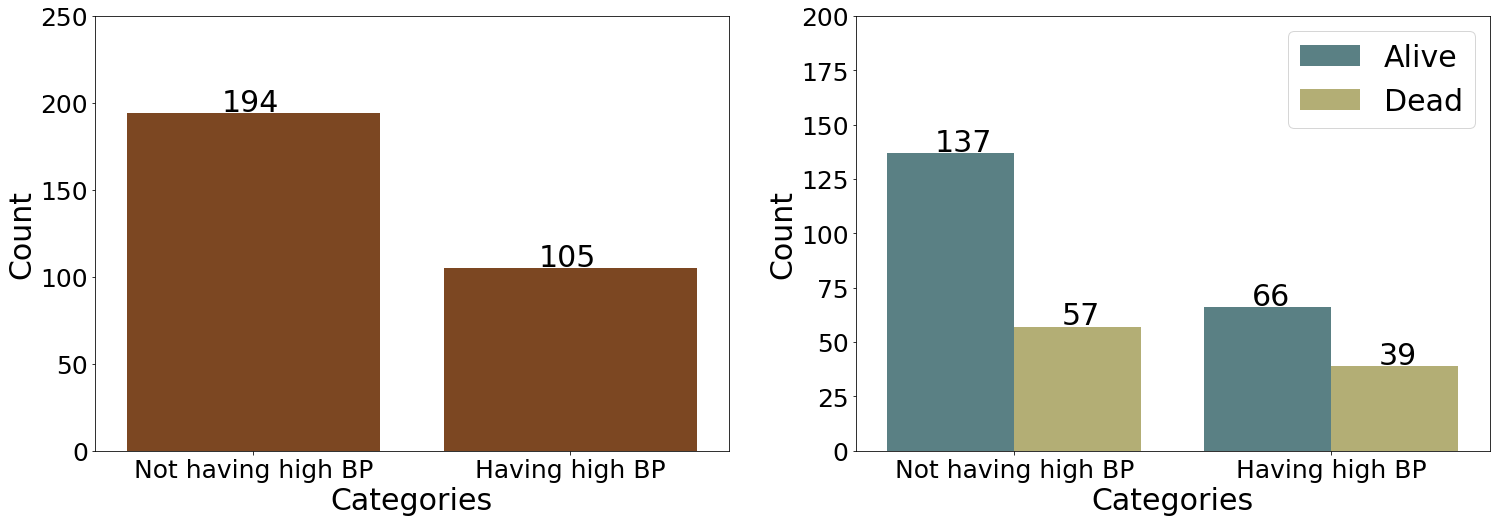

In [34]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(5,5))
ax = sns.countplot(x="high_blood_pressure", data=patient_data,color="#8B4513")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Not having high BP","Having high BP"],fontsize=25)
plt.ylim(0,250)
#plt.title("Count plot of 'anaemia'")
plt.yticks(fontsize=25)



plt.subplot(1, 2, 2)

ax = sns.countplot(x="high_blood_pressure", data=patient_data,palette=["#53868B",'#BDB76B'],hue="DEATH_EVENT")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["Not having high BP","Having high BP"],fontsize=25)
plt.ylim(0,200)
#plt.title("Count plot of 'anaemia'")
plt.legend(["Alive","Dead"],fontsize=30)
plt.yticks(fontsize=25)

plt.show()

## Attribute 'smoking'

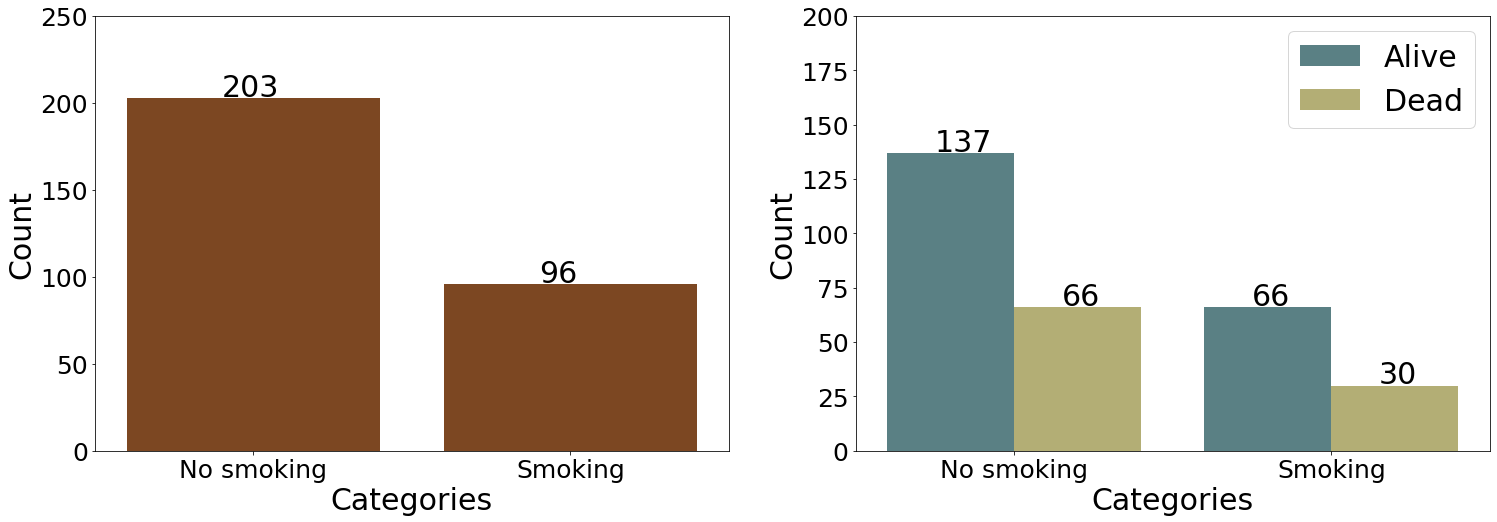

In [35]:
plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(5,5))
ax = sns.countplot(x="smoking", data=patient_data,color="#8B4513")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["No smoking","Smoking"],fontsize=25)
plt.ylim(0,250)
#plt.title("Count plot of 'anaemia'")
plt.yticks(fontsize=25)


plt.subplot(1, 2, 2)

ax = sns.countplot(x="smoking", data=patient_data,palette=["#53868B",'#BDB76B'],hue="DEATH_EVENT")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.xticks([0,1],["No smoking","Smoking"],fontsize=25)
plt.ylim(0,200)
#plt.title("Count plot of 'anaemia'")
plt.legend(["Alive","Dead"],fontsize=30)
plt.yticks(fontsize=25)
plt.show()

## Attribute 'DEATH_EVENT'

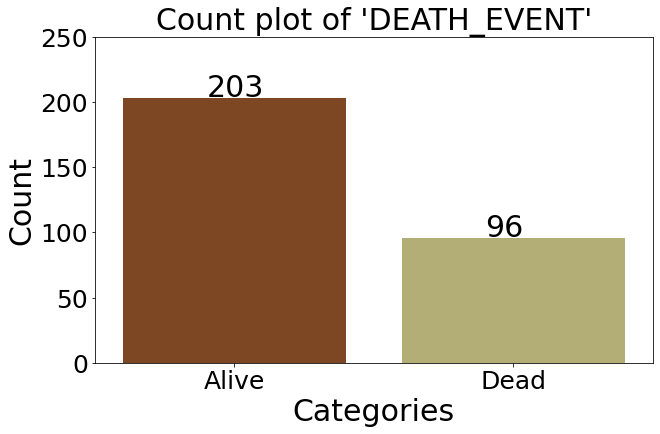

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="DEATH_EVENT", data=patient_data,palette=["#8B4513",'#BDB76B'])

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),size=30)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Categories",fontsize=30)
plt.ylim(0,250)
plt.xticks([0,1],["Alive","Dead"],fontsize=25)
plt.title("Count plot of 'DEATH_EVENT'",fontsize=30)
plt.yticks(fontsize=25)
plt.show()

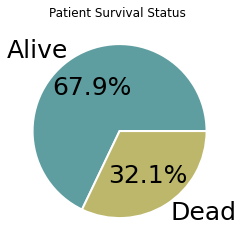

In [37]:
survived = patient_data[patient_data["DEATH_EVENT"] == 0]
dead = patient_data[patient_data["DEATH_EVENT"] == 1]
#sns.countplot(patient_data["DEATH_EVENT"])
values= [len(survived),len(dead)]
labels = ["Alive","Dead"]
plt.pie(values,labels=labels,autopct="%0.1f%%",colors=["#5F9EA0",'#BDB76B'],
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True},textprops={'fontsize': 25})
plt.title("Patient Survival Status ")
plt.show()

## 1.4 Box plots

<AxesSubplot:>

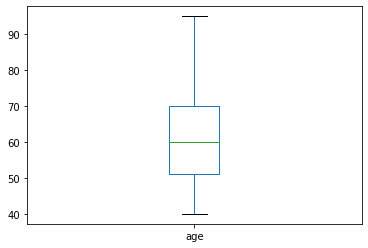

In [38]:
patient_data.boxplot( column =['age'], grid = False)

<AxesSubplot:>

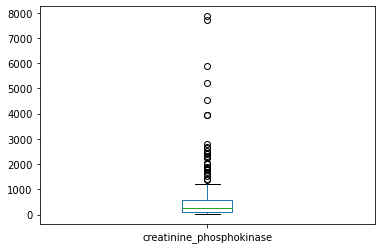

In [39]:
patient_data.boxplot( column =['creatinine_phosphokinase'], grid = False)

<AxesSubplot:>

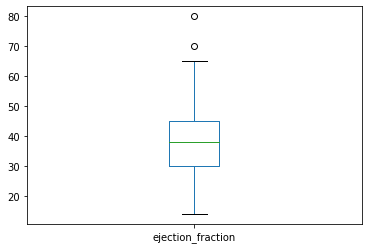

In [40]:
patient_data.boxplot( column =['ejection_fraction'], grid = False)

<AxesSubplot:>

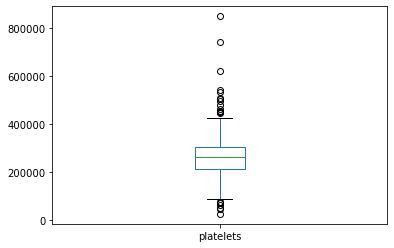

In [41]:
patient_data.boxplot( column =['platelets'], grid = False)

<AxesSubplot:>

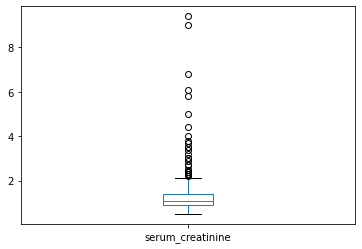

In [42]:
patient_data.boxplot( column =['serum_creatinine'], grid = False)

<AxesSubplot:>

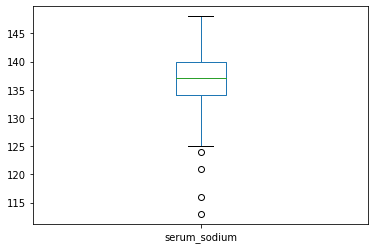

In [43]:
patient_data.boxplot( column =['serum_sodium'], grid = False)

<AxesSubplot:>

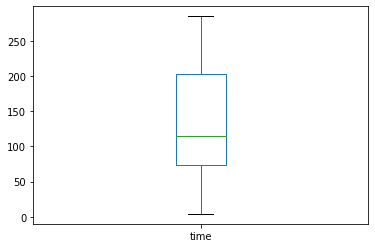

In [44]:
patient_data.boxplot( column =['time'], grid = False)

# 2. Multivariate Plots

## 2.1 Correlation Matrix plot

In [45]:
numerical =[]
for data in patient_data.columns:
    if patient_data[data].nunique()>5:
        numerical.append(data)
numerical

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

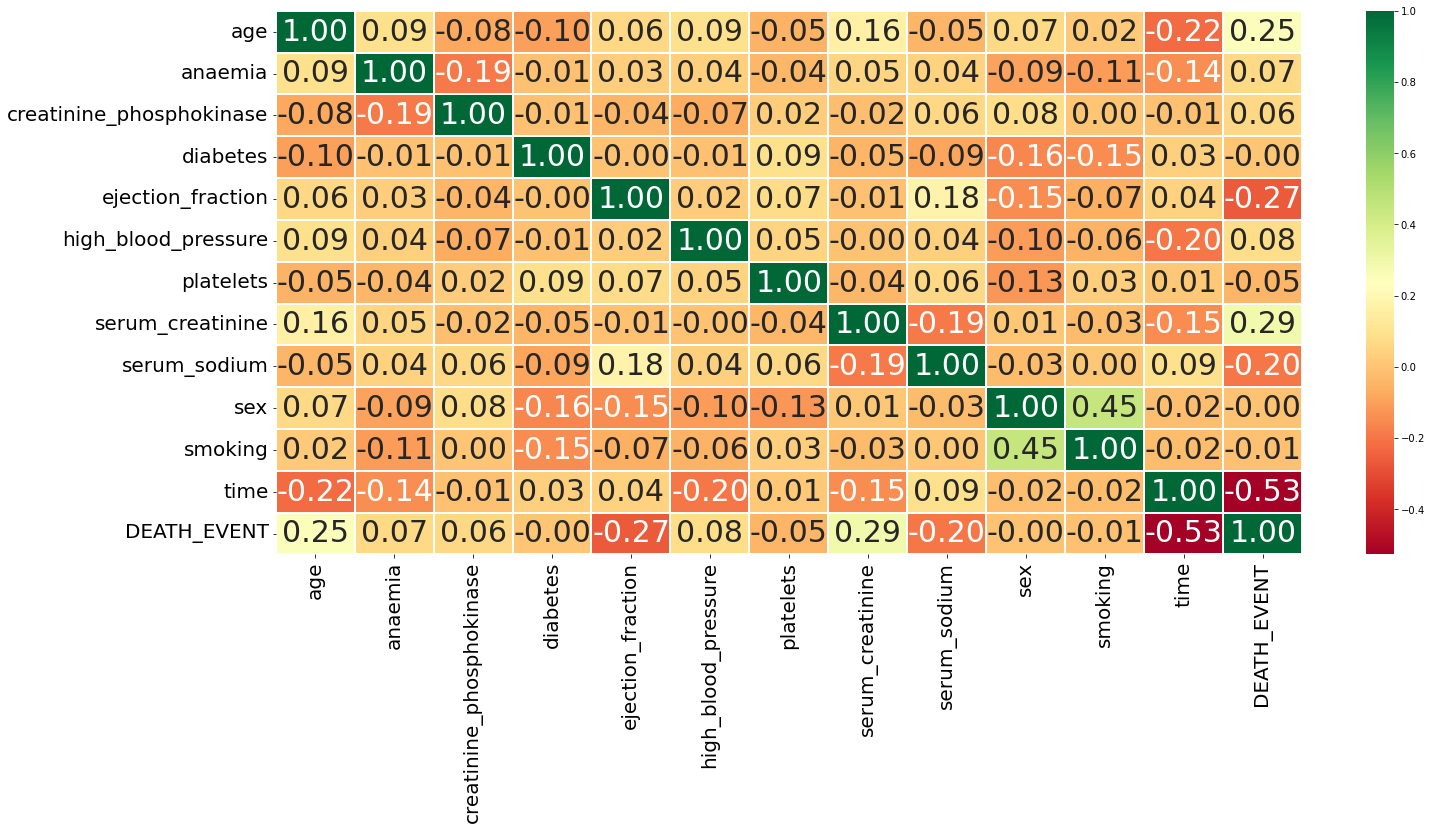

In [46]:
correlation_matrix = patient_data.corr()
plt.figure(figsize=(23,10))

sns.heatmap(correlation_matrix,fmt="0.2f",cmap='RdYlGn',linewidths=0.30,annot=True,annot_kws={"size": 30})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Display the  Heatmap
plt.show()

In [47]:
plt.rcParams.update({'font.size': 10})
correlation_matrix = patient_data[numerical].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

## 2.2 Scatter plot matrix

<Figure size 3600x3600 with 0 Axes>

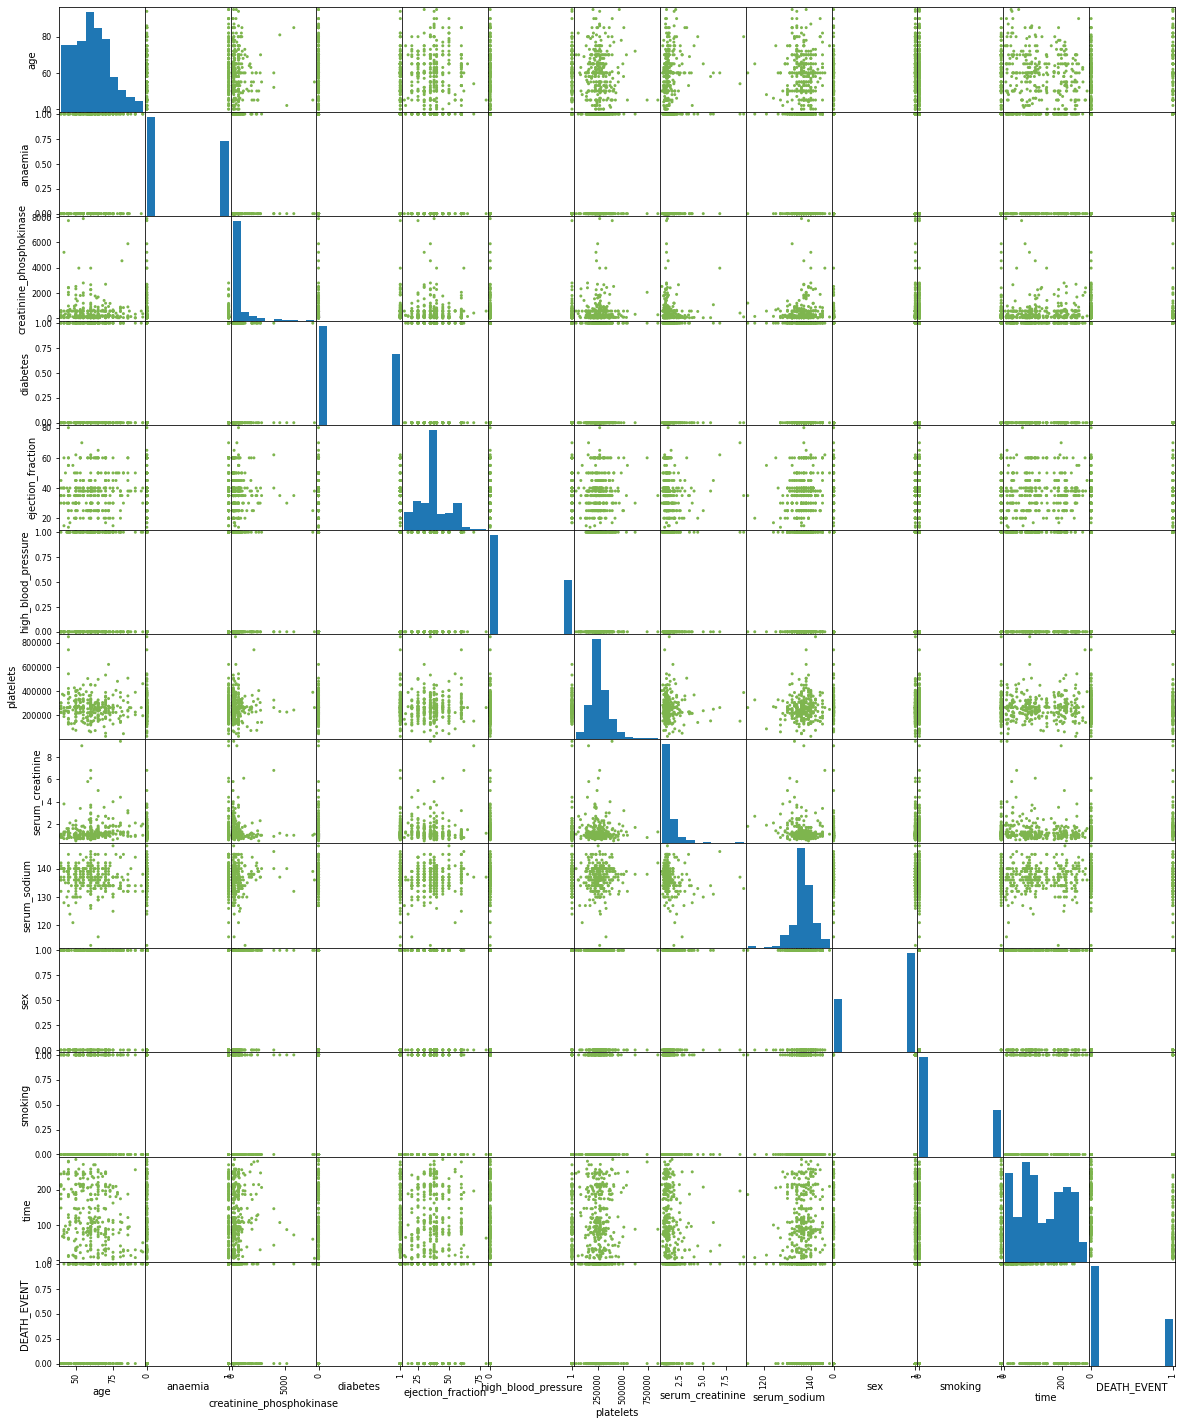

In [48]:
from pandas.plotting import scatter_matrix

plt.rc('axes', labelsize=10)
plt.figure(figsize=(50,50))
scatter_matrix(patient_data,alpha=1,figsize=(20,25),color="#7eb54e",grid=True)
plt.show()

## Categorical and numerical attributes

In [49]:
categorical =[]
for data in patient_data.columns:
    if patient_data[data].nunique()<5:
        categorical.append(data)
categorical

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [50]:
numerical =[]
for data in patient_data.columns:
    if patient_data[data].nunique()>5:
        numerical.append(data)
numerical

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

# QQ plot

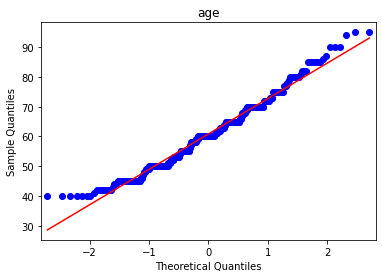

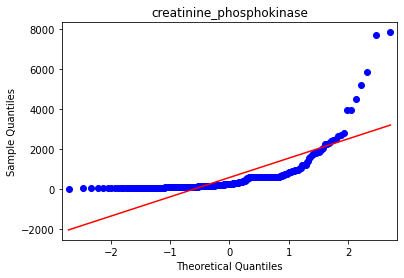

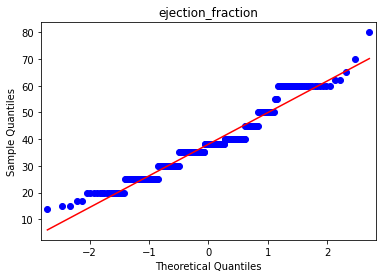

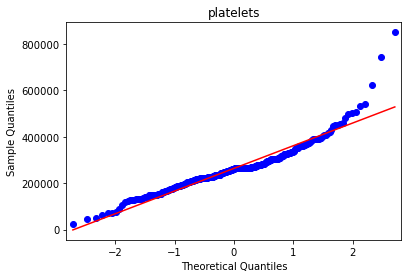

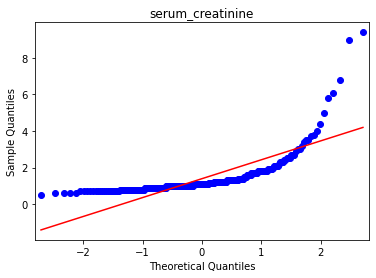

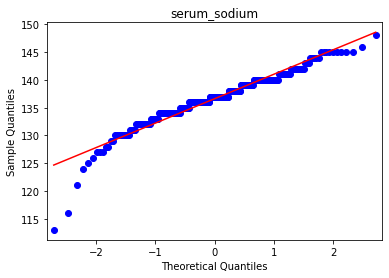

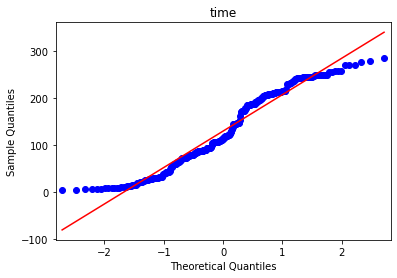

In [51]:
from statsmodels.graphics.gofplots import qqplot
for col in numerical:
    qqplot(patient_data[col], line='s')
    plt.title(col)
    plt.show()

# Normality tests


### Shapiro test

In [52]:
x= patient_data.iloc[:,:11]
x.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')

In [53]:
from scipy.stats import shapiro
for col in x.columns:
    test = shapiro(patient_data[col])
    print(col,":",test)

age : ShapiroResult(statistic=0.9754701852798462, pvalue=5.3505704272538424e-05)
anaemia : ShapiroResult(statistic=0.6296131610870361, pvalue=6.2099638288205785e-25)
creatinine_phosphokinase : ShapiroResult(statistic=0.5142632722854614, pvalue=7.050336006853421e-28)
diabetes : ShapiroResult(statistic=0.6266452074050903, pvalue=5.115523846896366e-25)
ejection_fraction : ShapiroResult(statistic=0.9473159313201904, pvalue=7.215433139862171e-09)
high_blood_pressure : ShapiroResult(statistic=0.6034327149391174, pvalue=1.1686175589182754e-25)
platelets : ShapiroResult(statistic=0.9115099906921387, pvalue=2.8837446753443574e-12)
serum_creatinine : ShapiroResult(statistic=0.5514660477638245, pvalue=5.3927583038658e-27)
serum_sodium : ShapiroResult(statistic=0.9390263557434082, pvalue=9.210247564617191e-10)
sex : ShapiroResult(statistic=0.603431224822998, pvalue=1.1685004623776566e-25)
smoking : ShapiroResult(statistic=0.5881408452987671, pvalue=4.5818434207772147e-26)


# Input and Output variables

In [54]:
x = patient_data.iloc[:,0:11]
y = patient_data.iloc[:,-1]

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 25.8 KB


# Feature Selection Methods
## 1. Filter Methods 

In [56]:
categorical_inputs = categorical[:-1]
categorical_inputs
x_cat = x[categorical_inputs]
x_cat

anaemia  diabetes  high_blood_pressure  sex  smoking
0          0         0                    1    1        0
1          0         0                    0    1        0
2          0         0                    0    1        1
3          1         0                    0    1        0
4          1         1                    0    0        0
..       ...       ...                  ...  ...      ...
294        0         1                    1    1        1
295        0         0                    0    0        0
296        0         1                    0    0        0
297        0         0                    0    1        1
298        0         0                    0    1        1

[299 rows x 5 columns]

In [57]:
numerical

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [58]:
#Time is excluded
numerical_inputs = numerical[:6]
numerical_inputs
x_num = x[numerical_inputs]
x_num

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1.9           137  
4                 2.7           116  
..                ...           ...  
294               1.1           143  
295               1.2           139  
296               0.8           138  
297               1.4           140  
298               1.6           136  

[299 rows x 6 columns]

# Chi square test


In [59]:
#for categorical variables

x = x_cat
y = patient_data["DEATH_EVENT"]

chi_test_scores = chi2(x,y)
chi_test_scores



(array([7.46593411e-01, 6.56814450e-04, 1.22153853e+00, 1.95626598e-03,
        3.23468288e-02]),
 array([0.38755692, 0.97955374, 0.26905893, 0.96472131, 0.85726857]))

In [60]:
chi = pd.Series(chi_test_scores[0])
chi.index = x_cat.columns
chi.sort_values(ascending=True,inplace=True)
chi

diabetes               0.000657
sex                    0.001956
smoking                0.032347
anaemia                0.746593
high_blood_pressure    1.221539
dtype: float64

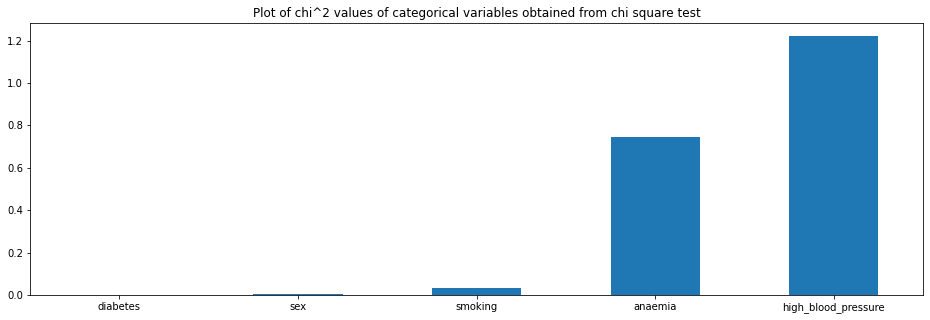

In [61]:
chi.plot.bar(figsize=(16,5))
plt.xticks(rotation=0)
plt.title("Plot of chi^2 values of categorical variables obtained from chi square test")

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize']= 8

plt.show()

In [62]:
p_values = pd.Series(chi_test_scores[1])
p_values.index = x_cat.columns
p_values.sort_values(ascending=True,inplace=True)
p_values

high_blood_pressure    0.269059
anaemia                0.387557
smoking                0.857269
sex                    0.964721
diabetes               0.979554
dtype: float64

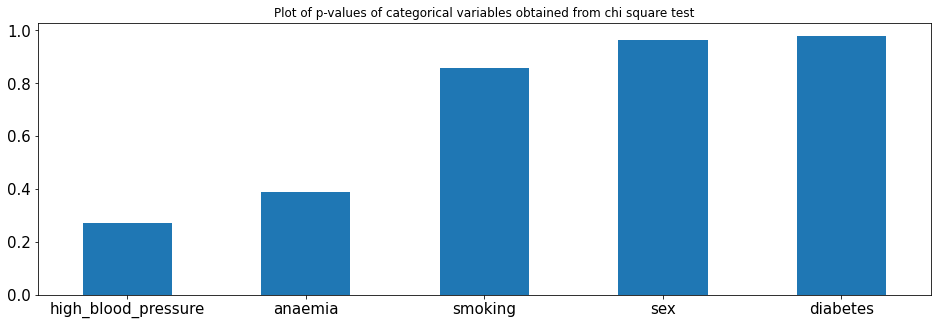

In [63]:
p_values.plot.bar(figsize=(16,5))
plt.xticks(rotation=0)
plt.title("Plot of p-values of categorical variables obtained from chi square test")

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize']= 8

plt.show()

In [64]:
p_values[p_values<0.05] #important attributes

Series([], dtype: float64)

# Mann Whitney U test

In [65]:
# for numerical variables

In [66]:
# Mann-Whitney U test

# seed the random number generator
seed(777)
pv=[]
u = []

for col in numerical:
    # generate two independent samples
    data1 = patient_data.loc[patient_data['DEATH_EVENT']==0,col]
    data2 = patient_data.loc[patient_data['DEATH_EVENT']==1,col]
    # compare samples
    stat, p = mannwhitneyu(data1, data2)
    #print('Statistics=%.3f, p=%.9f' % (stat, p))
    pv.append(p)
    u.append(stat)
#print(numerical)
#print(pv)

df1 = pd.DataFrame(numerical,columns=["numerical"])
df1
df2 = pd.DataFrame(pv, columns=['pvalues'])
df2
df3 = pd.DataFrame(u, columns=['Statistic'])
df3
df=pd.concat([df1,df2,df3],axis=1)
df

numerical       pvalues  Statistic
0                       age  1.667518e-04     7121.0
1  creatinine_phosphokinase  6.840400e-01     9460.0
2         ejection_fraction  7.368249e-07    13176.5
3                 platelets  4.255585e-01    10300.5
4          serum_creatinine  1.580998e-10     5298.0
5              serum_sodium  2.927557e-04    12261.5
6                      time  6.852197e-21    16288.5

<AxesSubplot:xlabel='numerical'>

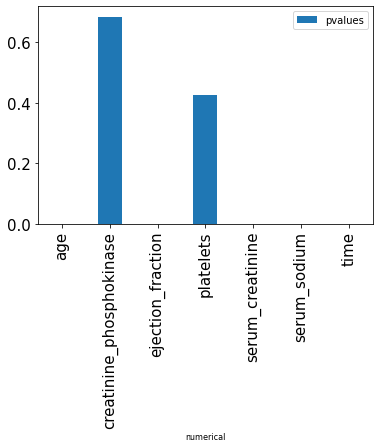

In [67]:
df.plot.bar(x="numerical",y="pvalues")


# 2. Wrapper techniques

In [68]:
x = patient_data.iloc[:,:11]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=777)
#Data Normalisation
mm_sc = MinMaxScaler(feature_range= (0,1))
xtrain_fit = mm_sc.fit(x_train)

xtrain_scaled = xtrain_fit.transform(x_train)

xtest_scaled = xtrain_fit.transform(x_test)
print(xtrain_scaled)

[[0.27272727 0.         0.00548609 ... 0.75757576 1.         0.        ]
 [0.76363636 1.         0.04541975 ... 0.6969697  1.         0.        ]
 [0.25454545 0.         0.07131921 ... 0.63636364 1.         0.        ]
 ...
 [0.45454545 1.         0.00574126 ... 0.81818182 1.         0.        ]
 [0.58181818 0.         0.043506   ... 0.6969697  1.         1.        ]
 [0.03636364 0.         0.66164838 ... 0.81818182 1.         1.        ]]


# Recursive Feature Elimination with Cross Validation (RFECV)

In [69]:

model = RandomForestClassifier(random_state=777) 
scorer = make_scorer(accuracy_score)
cv = RepeatedKFold(n_splits=5,n_repeats=3,random_state=777)
rfecv = RFECV(estimator=model, cv=cv,scoring=scorer)   #5-fold cross-validation
rfecv = rfecv.fit(xtrain_scaled, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium'],
      dtype='object')


                  Attribute  Importance
5          serum_creatinine    0.218989
2         ejection_fraction    0.212946
0                       age    0.139329
1  creatinine_phosphokinase    0.138580
4                 platelets    0.137656
6              serum_sodium    0.124387
3       high_blood_pressure    0.028114


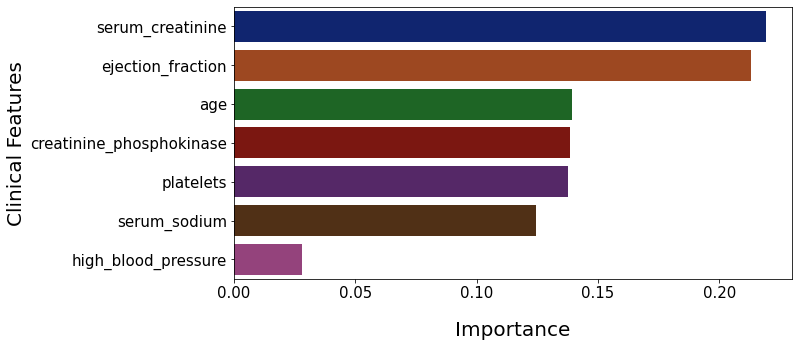

In [70]:
data = pd.DataFrame()
data['Attribute'] =x_train.columns[rfecv.support_]
data['Importance'] = rfecv.estimator_.feature_importances_

data = data.sort_values(by='Importance', ascending=False)
print(data)
plt.rc('font', size=20)
plt.figure(figsize=(10, 5))
#plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
sns.barplot(x=data['Importance'], y=data['Attribute'],palette="dark")
#plt.title('Feature Importances', fontsize=30, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=20, labelpad=20)
plt.ylabel("Clinical Features",fontsize=20)
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20)
plt.show()

# Boruta

In [71]:
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5,random_state=777)
model.fit(xtrain_scaled, y_train)
method = BorutaPy(model, n_estimators='auto', verbose=2, random_state=777)

# relevant features
method.fit(xtrain_scaled, y_train)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=63, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1C90B5AD640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1C90B5AD640, verbose=2)

In [72]:
method.support_

method.ranking_


array([1, 5, 2, 8, 1, 4, 3, 1, 2, 6, 7])

In [73]:

ranks = list(zip(x_train.columns, 
                         method.ranking_, 
                         method.support_))


for feature in ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feature[0], feature[1], feature[2]))

Feature: age                       Rank: 1,  Keep: True
Feature: anaemia                   Rank: 5,  Keep: False
Feature: creatinine_phosphokinase  Rank: 2,  Keep: False
Feature: diabetes                  Rank: 8,  Keep: False
Feature: ejection_fraction         Rank: 1,  Keep: True
Feature: high_blood_pressure       Rank: 4,  Keep: False
Feature: platelets                 Rank: 3,  Keep: False
Feature: serum_creatinine          Rank: 1,  Keep: True
Feature: serum_sodium              Rank: 2,  Keep: False
Feature: sex                       Rank: 6,  Keep: False
Feature: smoking                   Rank: 7,  Keep: False


# Modelling


In [74]:
patient_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# BEFORE OVERSAMPLING WITH SMOTE

# Strategy 1 - Base Model with all attributes excluding time

### Train Test split

In [75]:
x = patient_data.iloc[:,:11]
y=patient_data.iloc[:,-1]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=777)

mm_sc = MinMaxScaler()
xtrain_fit = mm_sc.fit(x_train)

xtrain_scaled = xtrain_fit.transform(x_train)

xtest_scaled = xtrain_fit.transform(x_test)
print(xtrain_scaled)

[[0.14545455 1.         0.01289746 ... 0.48571429 0.         0.        ]
 [0.45454545 1.         0.0105989  ... 0.77142857 0.         0.        ]
 [0.41818182 0.         0.02081471 ... 0.91428571 1.         1.        ]
 ...
 [0.45454545 1.         0.01340825 ... 0.6        1.         0.        ]
 [0.63636364 0.         0.07048908 ... 0.68571429 1.         0.        ]
 [0.54545455 0.         0.10279658 ... 0.57142857 0.         0.        ]]


In [76]:
y_test.value_counts()

0    61
1    29
Name: DEATH_EVENT, dtype: int64

In [77]:
y_train.value_counts()

0    142
1     67
Name: DEATH_EVENT, dtype: int64

In [78]:
x_train.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
dtype: object

In [79]:
x.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  
0        0  
1        0  
2        1  
3        0  
4        0

In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [81]:
cv=KFold(n_splits=5,random_state=777,shuffle=True)
score1 = make_scorer(accuracy_score)
score2 = make_scorer(precision_score)
score3 = make_scorer(recall_score)
score4 = make_scorer(f1_score)
score5 = make_scorer(recall_score,pos_label=0)


In [82]:
scorer = make_scorer(f1_score)
bal_scorer = make_scorer(accuracy_score)

# 1)Logistic Regression

##  before tuning

In [83]:
plt.rcParams.update({'axes.labelsize': 'small'})

Parameters are : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7031358885017421
Cross validation Precision : 0.55
Cross validation recall : 0.19839743589743591
Cross validation specificity : 0.9448275862068967
Cross validation f1 score : 0.25915743108837735
Classification report
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        61
           1       0.57      0.28      0.37        29

    accuracy                           0.70        90
   macro avg       0.65      0.59      0.59        90
weighted avg       0.67      0.70      0.66        90

Accuracy: 0.7
Precision: 0.5714285714285714
Sensitivity_recall: 0.27586206896551724
Specificity: 0.9016393442622951
F1_score: 0.37209

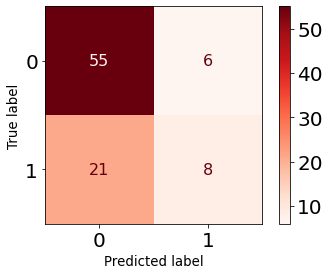

ROC AUC=0.675


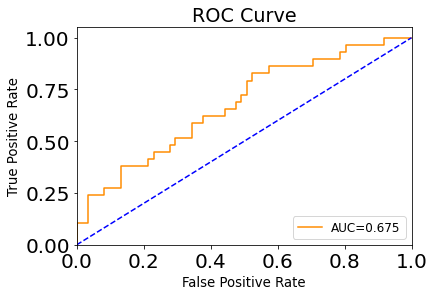

In [84]:
lr1 = LogisticRegression(random_state=777)
lr1= lr1.fit(xtrain_scaled,y_train)
print("Parameters are :",lr1.get_params(deep=True))
  
cv_accuracy = cross_val_score(lr1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(lr1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(lr1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(lr1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(lr1,xtrain_scaled,y_train,cv=cv,scoring=score5)

print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())


y_predicted = lr1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr1','wb') as file:
    pickle.dump(lr1,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = lr1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()



### Hyperparameter tuning

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Tuned Hyperparameters : {'C': 2.8, 'penalty': 'l2', 'solver': 'newton-cg'}
Parameters are : {'C': 2.8, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.746109175377468
Cross validation Precision : 0.672142857142857
Cross validation recall : 0.36826923076923074
Cross validation specificity : 0.923342175066313
Cross validation f1 score : 0.46862251536770316
Classification report
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        61
           1       0.58      0.38      0.46        29

    accuracy                           0.71        90
   macro avg       0.66      0.62      0.63        90
weighted avg       0.69      0.71   

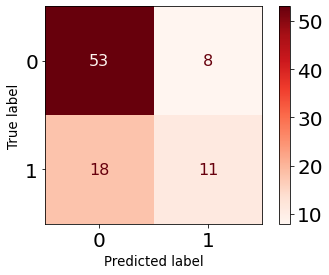

ROC AUC=0.705


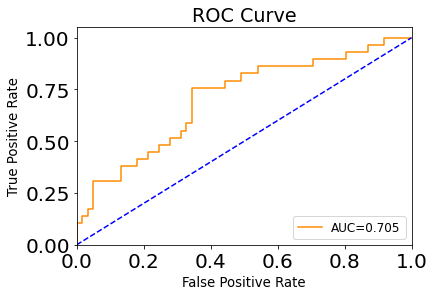

In [85]:
parameters = {
        'penalty' : ['l1','l2',"elasticnet"], 
        'C'       : np.arange(1,3,0.2),
        'solver'  : ['newton-cg', 'lbfgs'],
       
    }
lr2 = LogisticRegression(random_state=777)
gridsearch = GridSearchCV(lr2,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_lr1 = lr2.set_params(**grid_result.best_params_)
  
tuned_lr1.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_lr1.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_lr1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_lr1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_lr1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_lr1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_lr1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

    
    
y_predicted = tuned_lr1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr2','wb') as file:
    pickle.dump(tuned_lr1,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_lr1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
 

# 2)Random Forest 

## before tuning

Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.770267131242741
Cross validation Precision : 0.741969696969697
Cross validation recall : 0.5131410256410256
Cross validation f1 score : 0.5595545314900153
Cross validation Specificity : 0.886472148541114
Classification report
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        61
           1       0.57      0.45      0.50        29

    accuracy                           0.71        90
   macro avg       0.66      0.64      0.65        90
weighted avg       0.70      0.71      0.70        90

Accuracy

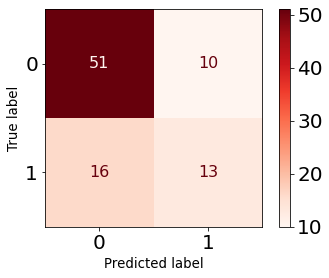

ROC AUC=0.788


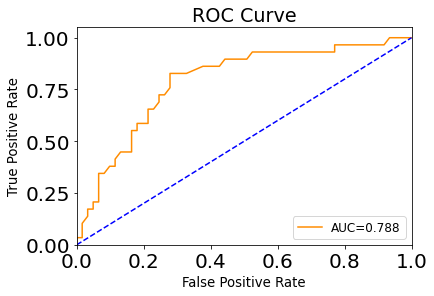

In [86]:
rf1 = RandomForestClassifier(random_state=777)
rf1= rf1.fit(xtrain_scaled,y_train)
print("Parameters are :",rf1.get_params(deep=True))

cv_accuracy = cross_val_score(rf1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(rf1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(rf1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(rf1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(rf1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation f1 score :", cv_f1.mean())       
print("Cross validation Specificity :", cv_specificity.mean())
y_predicted = rf1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf1','wb') as file:
    pickle.dump(rf1,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()
#ROC CURVE
    
probs = rf1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    


### Hyperparameter tuning

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Tuned Hyperparameters : {'max_depth': 11, 'max_leaf_nodes': 19, 'n_estimators': 80}
Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'max_leaf_nodes': 19, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': -1, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7558652729384437
Cross validation Precision : 0.7221895424836602
Cross validation recall : 0.4977564102564102
Cross validation f1 score : 0.5511904761904762
Cross validation Specificity : 0.8710875331564987
Classification report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        61
           1       0.62      0.52      0.57        29

    accuracy                

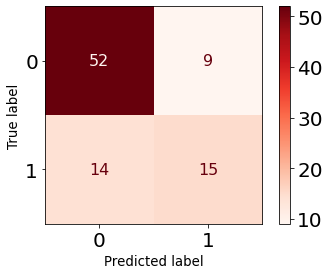

ROC AUC=0.787


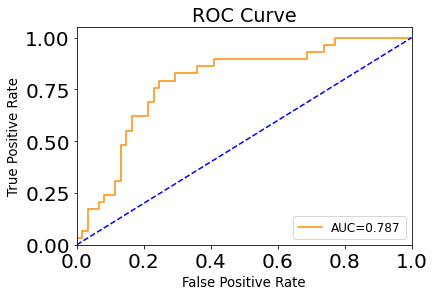

In [87]:
param_grid = {
        'max_depth': np.arange(11,15,1),
         'max_leaf_nodes':np.arange(15,20,1),
        'n_estimators': [50,60,80,100,101,102,105]
    
    }
    
rf2 = RandomForestClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(rf2,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_rf1 = rf2.set_params(**grid_result.best_params_)
  
tuned_rf1.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_rf1.get_params(deep=True))      

    
cv_accuracy = cross_val_score(tuned_rf1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_rf1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_rf1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_rf1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_rf1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation f1 score :", cv_f1.mean())       
print("Cross validation Specificity :",cv_specificity.mean())
    
y_predicted = tuned_rf1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf2','wb') as file:
    pickle.dump(tuned_rf1,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = tuned_rf1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

# 3) XGBoost

## Before tuning

Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Cross validation Accuracy : 0.726945412311266
Cross validation Precision : 0.5584126984126984
Cross validation recall : 0.5118589743589743

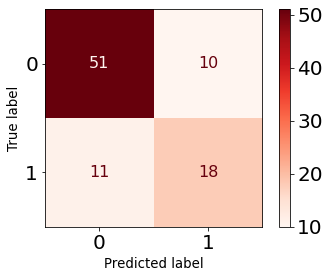

ROC AUC=0.732


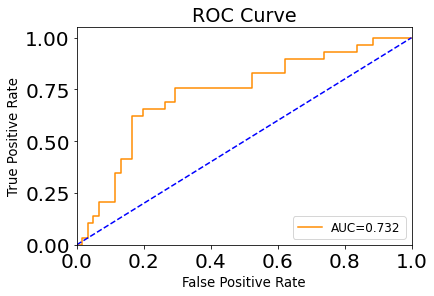

In [88]:
xgb1 = XGBClassifier(random_state=777)
xgb1= xgb1.fit(xtrain_scaled,y_train)
print("Parameters are :",xgb1.get_params(deep=True))
            

cv_accuracy = cross_val_score(xgb1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(xgb1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(xgb1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(xgb1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(xgb1,xtrain_scaled,y_train,cv=cv,scoring=score5)

print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())
    
    
y_predicted = xgb1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb1','wb') as file:
    pickle.dump(xgb1,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()
#ROC CURVE
    
probs = xgb1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    


### Hyperparameter tuning

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 48}
Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 3, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 48, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
C

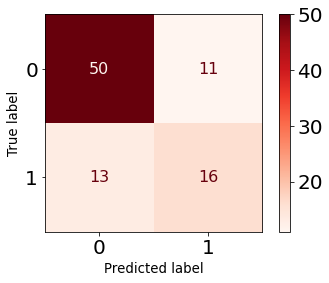

ROC AUC=0.767


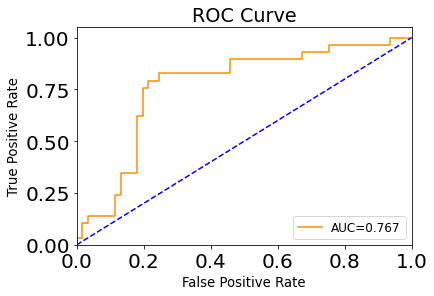

In [89]:
 params={
     "learning_rate"    : [0.001,0.001,0.01,0.1] ,
     "max_depth" : np.arange(2,5,1),
     "n_estimators":[40,42,44,46,48,50]
    
    }
xgb2 = XGBClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(xgb2,                    # model
                   param_grid = params,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_xgb1 = xgb2.set_params(**grid_result.best_params_)
  
tuned_xgb1.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_xgb1.get_params(deep=True))      

    
cv_accuracy = cross_val_score(tuned_xgb1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_xgb1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_xgb1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_xgb1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_xgb1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation Specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())
    
y_predicted = tuned_xgb1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb2','wb') as file:
    pickle.dump(tuned_xgb1,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_xgb1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()


# 4) Knn

## before tuning

Text(0, 0.5, 'Accuracy')

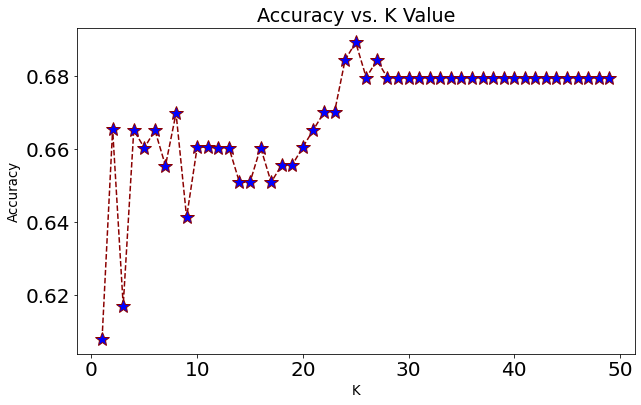

In [90]:
accuracy_rate = []

for i in range(1,50):
    np.random.seed(777)
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain_scaled,y_train,cv=cv,scoring=bal_scorer)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))

plt.plot(range(1,50),accuracy_rate,color='darkred', linestyle='dashed', marker='*',
         markerfacecolor='blue', markersize=15)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

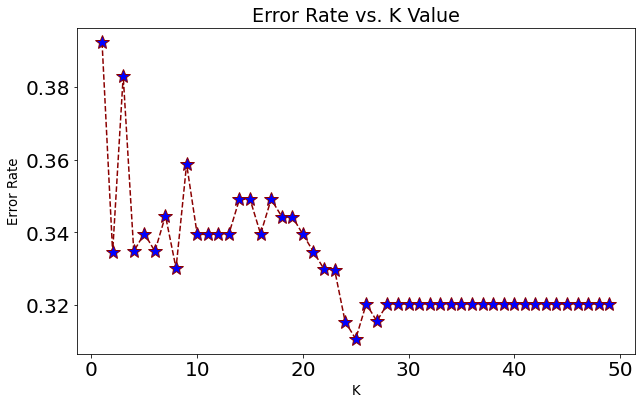

In [91]:
error_rate = []

for i in range(1,50):
    np.random.seed(777)
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain_scaled,y_train,cv=cv,scoring=bal_scorer)
    error_rate.append(1-score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='darkred', linestyle='dashed', marker='*',
        markerfacecolor='blue', markersize=15)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Parameters are : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Cross validation Accuracy : 0.6602787456445993
Cross validation Precision : 0.44833333333333336
Cross validation recall : 0.19102564102564104
Cross validation specificity : 0.8819628647214854
Cross validation f1 score : 0.2643274853801169
Classification report
              precision    recall  f1-score   support

           0       0.71      0.90      0.80        61
           1       0.54      0.24      0.33        29

    accuracy                           0.69        90
   macro avg       0.63      0.57      0.57        90
weighted avg       0.66      0.69      0.65        90

Accuracy: 0.6888888888888889
Precision: 0.5384615384615384
Sensitivity_recall: 0.2413793103448276
Specificity: 0.9016393442622951
F1_score: 0.3333333333333333
MCC: 0.1901251483722195
Confusion matrix: [[55  6]
 [22  7]]


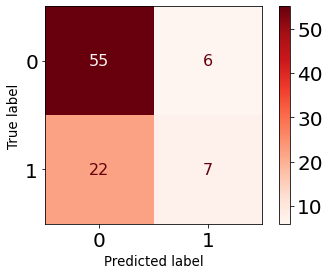

ROC AUC=0.603


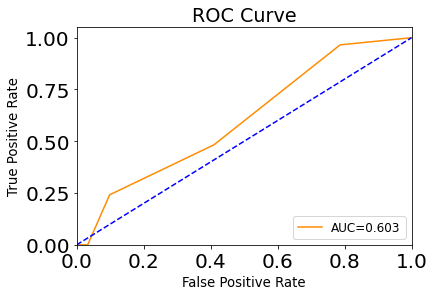

In [92]:
np.random.seed(777)
knn1 = KNeighborsClassifier()
knn1= knn1.fit(xtrain_scaled,y_train)
print("Parameters are :",knn1.get_params(deep=True))
            

cv_accuracy = cross_val_score(knn1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(knn1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(knn1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(knn1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(knn1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())
    
y_predicted = knn1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn1','wb') as file:
    pickle.dump(knn1,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = knn1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()


### Hyperparameter tuning

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Tuned Hyperparameters : {'leaf_size': 35, 'n_neighbors': 10, 'weights': 'distance'}
Parameters are : {'algorithm': 'auto', 'leaf_size': 35, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Cross validation Accuracy : 0.645876887340302
Cross validation Precision : 0.3738095238095238
Cross validation recall : 0.14775641025641023
Cross validation specificity : 0.8811671087533156
Cross validation f1 score : 0.20932723966779693
Classification report
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        61
           1       0.36      0.14      0.20        29

    accuracy                           0.64        90
   macro avg       0.52      0.51      0.49        90
weighted avg       0.58      0.64      0.59        90

Accuracy: 0.6444444444444445
Precision: 0.36363636363636365
Sensitivity_recall: 0.13793103448275862
S

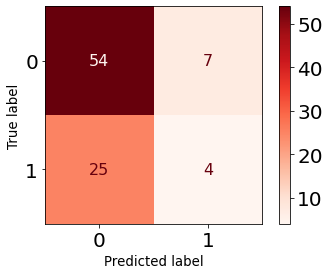

ROC AUC=0.585


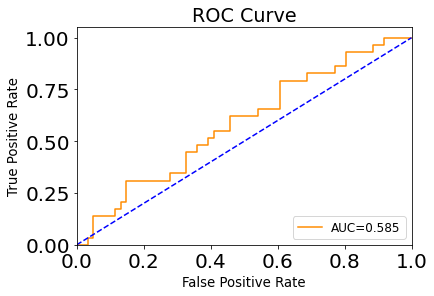

In [93]:
param_grid = {
        "n_neighbors":np.arange(10,50,5),
        'weights':['distance'], 
         "leaf_size" : [35,40,45,50]
    }
np.random.seed(777)
knn2 = KNeighborsClassifier(n_jobs=-1)
gridsearch = GridSearchCV(knn2,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_knn1 = knn2.set_params(**grid_result.best_params_)
  
tuned_knn1.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_knn1.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_knn1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_knn1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_knn1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_knn1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_knn1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    

    
y_predicted = tuned_knn1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn2','wb') as file:
    pickle.dump(tuned_knn1,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = tuned_knn1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

# 5) SVM 

## before tuning



Parameters are : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.6602787456445993
Cross validation Precision : 0.4966666666666667
Cross validation recall : 0.10608974358974359
Cross validation specificity : 0.923342175066313
Cross validation f1 score : 0.16234335839598996
Classification report
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        61
           1       0.56      0.17      0.26        29

    accuracy                           0.69        90
   macro avg       0.63      0.55      0.53        90
weighted avg       0.66      0.69      0.63        90

Accuracy: 0.6888888888888889
Precision: 0.5555555555555556
Sensitivity_recall: 0.1724137931034483
Specificity: 0.93442

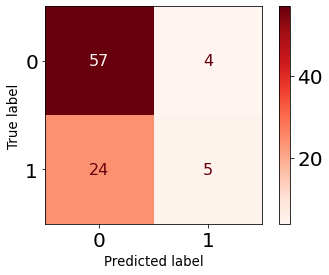

ROC AUC=0.654


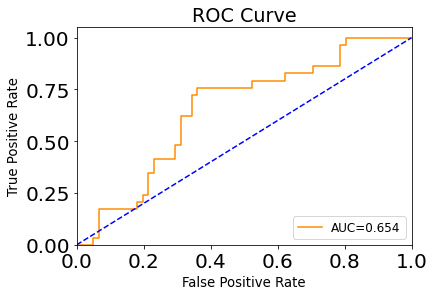

In [94]:
svm1 = SVC(probability=True,random_state=777)
svm1= svm1.fit(xtrain_scaled,y_train)
print("Parameters are :",svm1.get_params(deep=True))     


cv_accuracy = cross_val_score(svm1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(svm1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(svm1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(svm1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(svm1,xtrain_scaled,y_train,cv=cv,scoring=score5)

print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean()) 
print("Cross validation f1 score :", cv_f1.mean()) 


y_predicted = svm1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm1','wb') as file:
    pickle.dump(svm1,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = svm1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    


### Hyperparameter tuning

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Tuned Hyperparameters : {'C': 3.001, 'gamma': 'scale', 'kernel': 'rbf'}
Parameters are : {'C': 3.001, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.7031358885017422
Cross validation Precision : 0.5944444444444443
Cross validation recall : 0.3275641025641026
Cross validation specificity : 0.8811671087533156
Cross validation f1 score : 0.407988554273384
Classification report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        61
           1       0.55      0.38      0.45        29

    accuracy                           0.70        90
   macro avg       0.65      0.62      0.62        90
weighted avg       0.68      0.70      

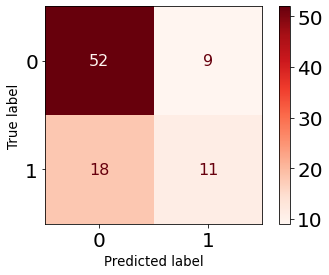

ROC AUC=0.692


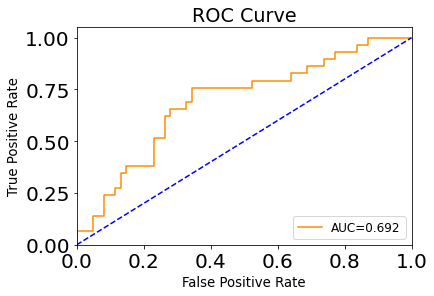

In [95]:
param_grid = {
               'kernel': ['rbf',"sigmoid"],
                "C":np.arange(0.001,5,0.5),
                "gamma" : ['scale', 'auto'] 
                }

svm2 = SVC(probability=True, random_state=777)
gridsearch = GridSearchCV(svm2,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_svm1 = svm2.set_params(**grid_result.best_params_)
  
tuned_svm1.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_svm1.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_svm1,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_svm1,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_svm1,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_svm1,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_svm1,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean()) 
print("Cross validation f1 score :", cv_f1.mean()) 



y_predicted = tuned_svm1.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm2','wb') as file:
    pickle.dump(tuned_svm1,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_svm1.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    


## Comparing the ROC curves of tuned models before SMOTE

Logistic Model : ROC AUC=0.705
Random Forest Model : ROC AUC=0.787
XGBoost : ROC AUC=0.767
KNN : ROC AUC=0.585
SVM : ROC AUC=0.692


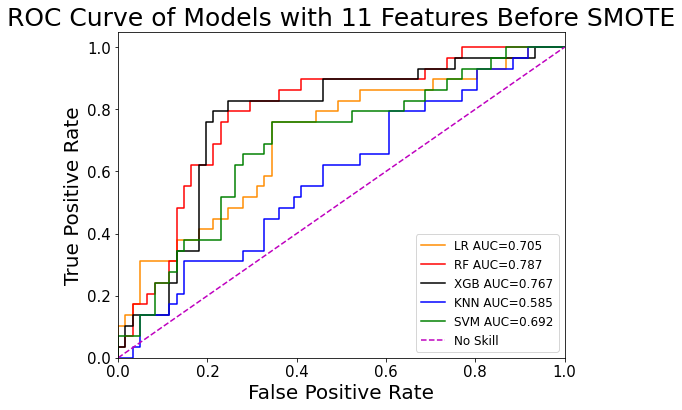

In [96]:
#ROC CURVE
plt.figure(figsize=(8,6))

#-----------------------BEFORE SMOTE  


probs_lr = tuned_lr1.predict_proba(xtest_scaled)[:,1]
fpr_lr,tpr_lr,threshold_lr=roc_curve(y_test,probs_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)
print('Logistic Model : ROC AUC=%0.3f'%roc_auc_lr)
plt.plot(fpr_lr,tpr_lr,label='LR AUC=%0.3f'%roc_auc_lr,color='darkorange')


probs_rf = tuned_rf1.predict_proba(xtest_scaled)[:,1]
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,probs_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)
print('Random Forest Model : ROC AUC=%0.3f'%roc_auc_rf)
plt.plot(fpr_rf,tpr_rf,label='RF AUC=%0.3f'%roc_auc_rf,color='red')



probs_xgb = tuned_xgb1.predict_proba(xtest_scaled)[:,1]
fpr_xg,tpr_xg,threshold_g=roc_curve(y_test,probs_xgb)
roc_auc_xg=auc(fpr_xg,tpr_xg)
print('XGBoost : ROC AUC=%0.3f'%roc_auc_xg)
plt.plot(fpr_xg,tpr_xg,label='XGB AUC=%0.3f'%roc_auc_xg,color='black')

probs_knn = tuned_knn1.predict_proba(xtest_scaled)[:,1]
fpr_knn,tpr_knn,threshold_g=roc_curve(y_test,probs_knn)
roc_auc_knn=auc(fpr_knn,tpr_knn)
print('KNN : ROC AUC=%0.3f'%roc_auc_knn)
plt.plot(fpr_knn,tpr_knn,label='KNN AUC=%0.3f'%roc_auc_knn,color='blue')

probs_svm = tuned_svm1.predict_proba(xtest_scaled)[:,1]
fpr_svm,tpr_svm,threshold_svm=roc_curve(y_test,probs_svm)
roc_auc_svm=auc(fpr_svm,tpr_svm)
print('SVM : ROC AUC=%0.3f'%roc_auc_svm)
plt.plot(fpr,tpr,label='SVM AUC=%0.3f'%roc_auc_svm,color='green')


plt.plot([0,1],[0,1],'m--',label='No Skill')
plt.legend(loc='lower right',fontsize=12)

plt.xlim([0,1])
plt.xticks(fontsize=15)
plt.ylim([0,1.05])
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("ROC Curve of Models with 11 Features Before SMOTE",fontsize=25)
plt.show()




# Comparing confusion matrices of tuned models before SMOTE

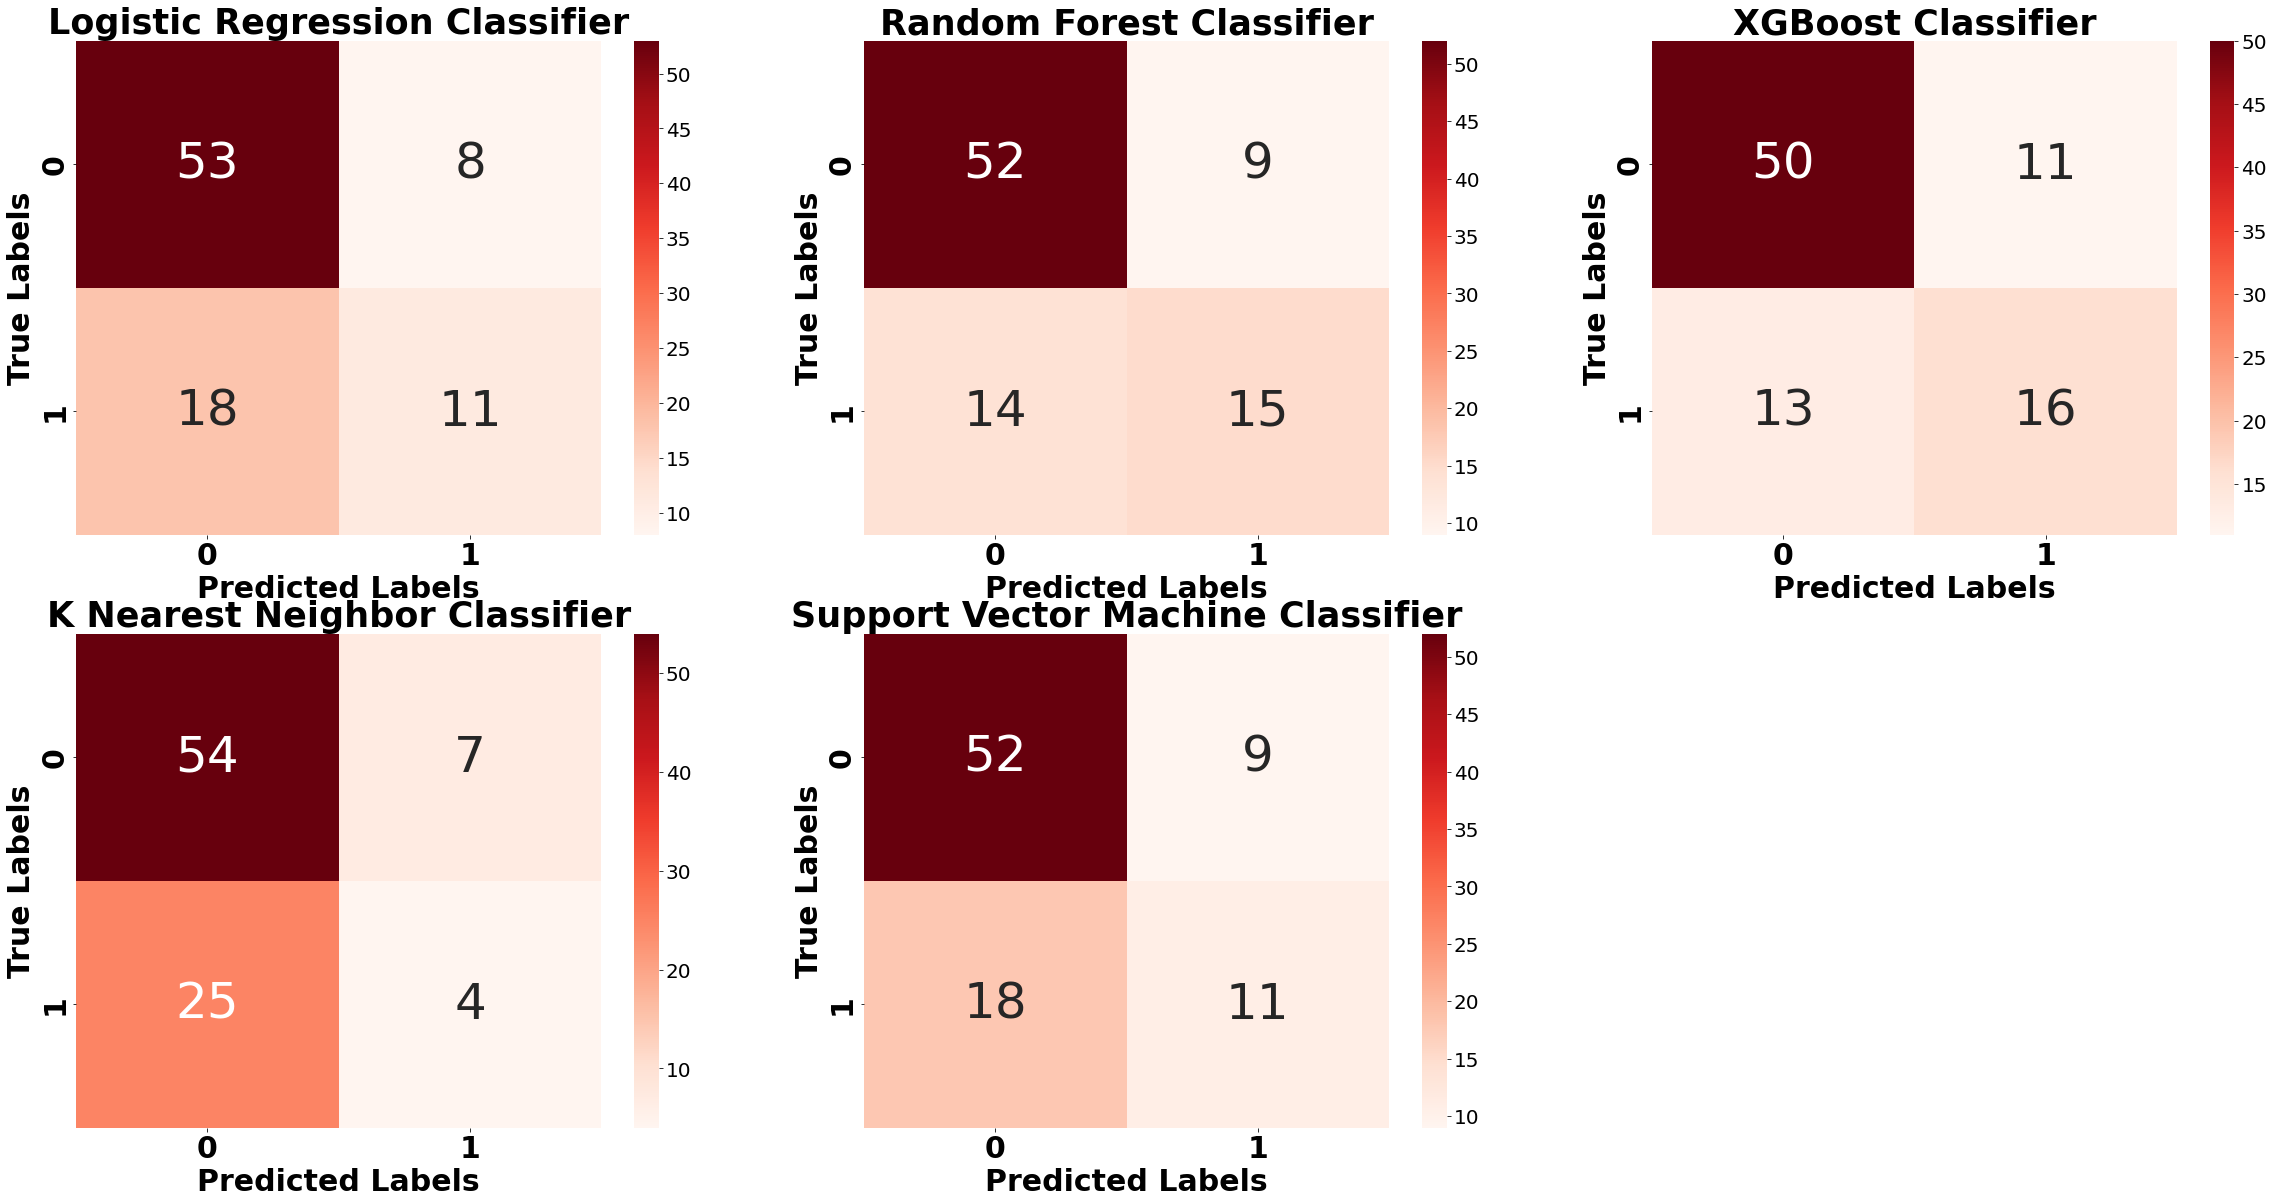

In [97]:
plt.figure(figsize=(40,20))

plt.subplot(2,3,1)
y_lr = tuned_lr1.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_lr)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Logistic Regression Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,2)
y_rf = tuned_rf1.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_rf)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Random Forest Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.subplot(2,3,3)
y_xgb = tuned_xgb1.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_xgb)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("XGBoost Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,4)
y_knn = tuned_knn1.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_knn)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("K Nearest Neighbor Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,5)
y_svm = tuned_svm1.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_svm)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Support Vector Machine Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.show()


# Strategy 2 - Model using serum creatinine, ejection fraction, age, serum sodium,platelets, creatinien phosphokinase

In [98]:
x_6 = patient_data.iloc[:,[7,4,0,8,2,6]]
x_6.head()

serum_creatinine  ejection_fraction   age  serum_sodium  \
0               1.9                 20  75.0           130   
1               1.1                 38  55.0           136   
2               1.3                 20  65.0           129   
3               1.9                 20  50.0           137   
4               2.7                 20  65.0           116   

   creatinine_phosphokinase  platelets  
0                       582  265000.00  
1                      7861  263358.03  
2                       146  162000.00  
3                       111  210000.00  
4                       160  327000.00

In [99]:
y=patient_data.iloc[:,-1]

In [100]:
#Train test split
x_train,x_test,y_train,y_test = train_test_split(x_6,y,test_size=0.30,stratify=y,random_state=777)

#Data Normalisation

mm_sc = MinMaxScaler()
xtrain_fit = mm_sc.fit(x_train)

xtrain_scaled = xtrain_fit.transform(x_train)

xtest_scaled = xtrain_fit.transform(x_test)
#print(xtrain_scaled[4])

In [101]:
#Split of datapoints
for train_idx, test_idx in cv.split(x,y):
    print(y[train_idx].sum(), y[test_idx].sum())

81 15
79 17
72 24
78 18
74 22


# 1) Logistic Regression 
## before tuning

Parameters are : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7225319396051104
Cross validation Precision : 0.7333333333333333
Cross validation recall : 0.14775641025641023
Cross validation specificity : 0.993103448275862
Cross validation f1 score : 0.24482456140350878
Classification report
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        61
           1       0.67      0.28      0.39        29

    accuracy                           0.72        90
   macro avg       0.70      0.61      0.61        90
weighted avg       0.71      0.72      0.68        90

Accuracy: 0.7222222222222222
Precision: 0.6666666666666666
Sensitivity_recall: 0.27586206896551724
Specificity: 0.934426

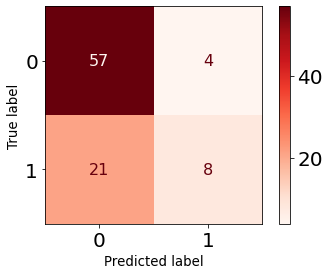

ROC AUC=0.794


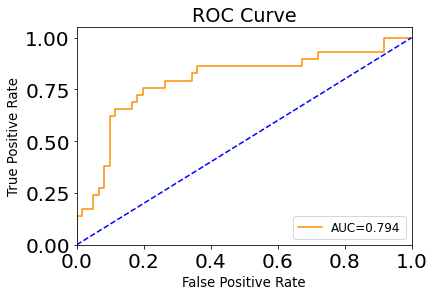

In [102]:
lr5 = LogisticRegression(random_state=777)
lr5= lr5.fit(xtrain_scaled,y_train)
print("Parameters are :",lr5.get_params(deep=True))
            

cv_accuracy = cross_val_score(lr5,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(lr5,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(lr5,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(lr5,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(lr5,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = lr5.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr5','wb') as file:
    pickle.dump(lr5,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = lr5.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
   

### Hyperparameter tuning

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Tuned Hyperparameters : {'C': 1.101, 'penalty': 'l1', 'solver': 'liblinear'}
Parameters are : {'C': 1.101, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 777, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7463414634146341
Cross validation Precision : 0.7723809523809525
Cross validation recall : 0.3125
Cross validation specificity : 0.950132625994695
Cross validation f1 score : 0.43780791492798493
Classification report
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        61
           1       0.67      0.41      0.51        29

    accuracy                           0.74        90
   macro avg       0.72      0.66      0.67        90
weighted avg       0.73      0.74      0.

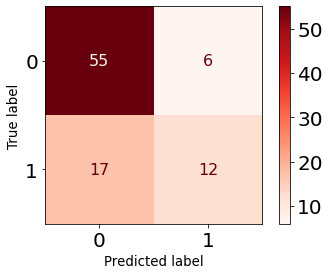

ROC AUC=0.785


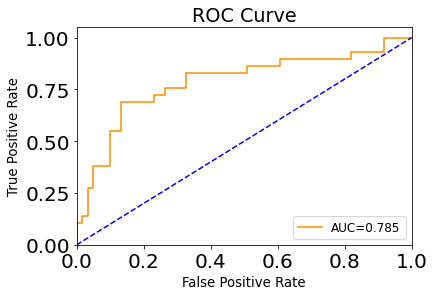

In [103]:
parameters = {
        'penalty' : ['l1','l2',"elasticnet"], 
        'C'       : np.arange(0.001,1.2,0.05),
        'solver'  : ['newton-cg', 'lbfgs','liblinear']
        
    }
lr6 = LogisticRegression(random_state=777)
gridsearch = GridSearchCV(lr6,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_lr3 = lr6.set_params(**grid_result.best_params_)
  
tuned_lr3.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_lr3.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_lr3,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_lr3,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_lr3,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_lr3,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_lr3,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = tuned_lr3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr6','wb') as file:
    pickle.dump(tuned_lr3,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_lr3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 2)Random Forest
## before tuning

Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7797909407665505
Cross validation Precision : 0.7072435897435898
Cross validation recall : 0.5605769230769231
Cross validation specificity : 0.8787798408488063
Cross validation f1 score : 0.6140614248451777
Classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        61
           1       0.67      0.55      0.60        29

    accuracy                           0.77        90
   macro avg       0.73      0.71      0.72        90
weighted avg       0.76      0.77      0.76        90

Accur

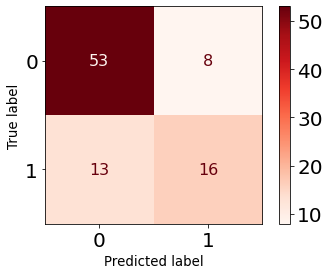

ROC AUC=0.785


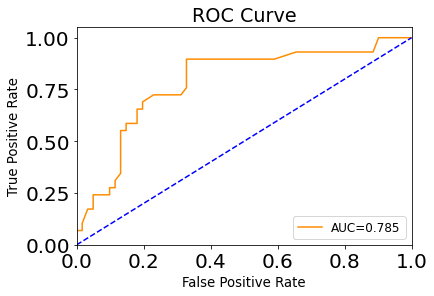

In [104]:
rf5 = RandomForestClassifier(random_state=777)
rf5= rf5.fit(xtrain_scaled,y_train)
print("Parameters are :",rf5.get_params(deep=True))

cv_accuracy = cross_val_score(rf5,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(rf5,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(rf5,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(rf5,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(rf5,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean()) 
print("Cross validation f1 score :", cv_f1.mean())    

y_predicted = rf5.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf5','wb') as file:
    pickle.dump(rf5,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = rf5.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

### Hyperparameter tuning

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tuned Hyperparameters : {'max_depth': 10, 'n_estimators': 100}
Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.78931475029036
Cross validation Precision : 0.7508333333333334
Cross validation recall : 0.5605769230769231
Cross validation specificity : 0.8925729442970821
Cross validation f1 score : 0.6248324549846289
Classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        61
           1       0.67      0.55      0.60        29

    accuracy                           0.77      

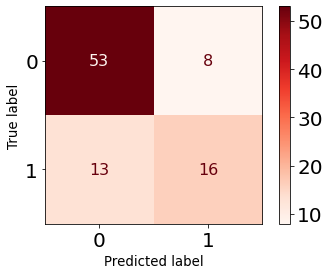

ROC AUC=0.790


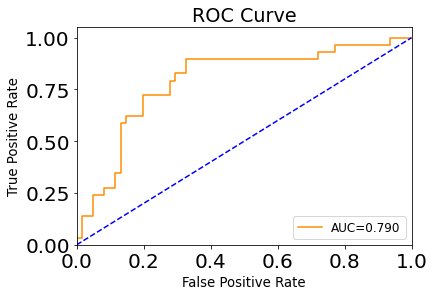

In [105]:
param_grid = {
        'max_depth': np.arange(8,16,1),
        'n_estimators': [50,75,100]
    }
    
rf6 = RandomForestClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(rf6,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_rf3 = rf6.set_params(**grid_result.best_params_)
  
tuned_rf3.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_rf3.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_rf3,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_rf3,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_rf3,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_rf3,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_rf3,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())       
print("Cross validation f1 score :", cv_f1.mean())       


y_predicted = tuned_rf3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf6','wb') as file:
    pickle.dump(tuned_rf3,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = tuned_rf3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
   

## 3) XGBOOST
## Before Tuning

Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Cross validation Accuracy : 0.7171893147502904
Cross validation Precision : 0.5566666666666666
Cross validation recall : 0.476923076923076

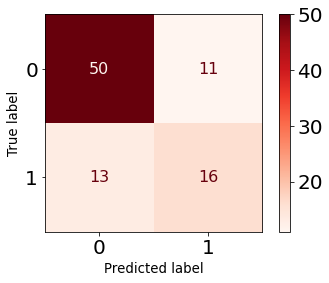

ROC AUC=0.734


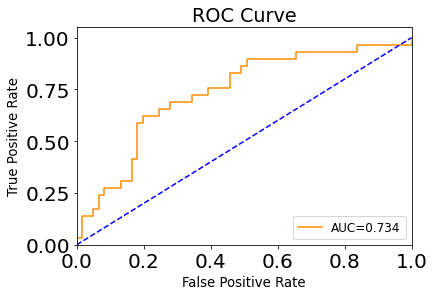

In [106]:
xgb5 = XGBClassifier(random_state=777)
xgb5= xgb5.fit(xtrain_scaled,y_train)
print("Parameters are :",xgb5.get_params(deep=True))
            

cv_accuracy = cross_val_score(xgb5,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(xgb5,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(xgb5,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(xgb5,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(xgb5,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = xgb5.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb5','wb') as file:
    pickle.dump(xgb5,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = xgb5.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
   

### Hyperparameter tuning

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Tuned Hyperparameters : {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 90}
Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.01, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 90, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None

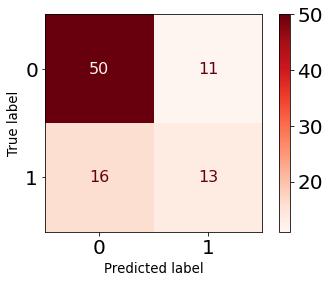

ROC AUC=0.761


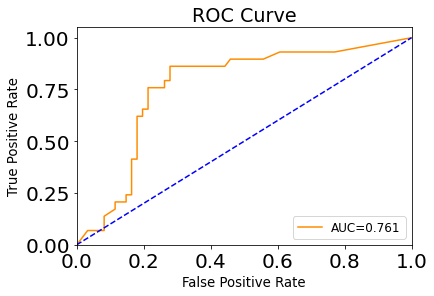

In [107]:
params={
     "learning_rate"    : [0.001,0.01,0.05,0.1] ,
     "max_depth" : np.arange(5,11,1),
     "n_estimators":[10,30,60,90,100]
    
    }
xgb6 = XGBClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(xgb6,                    # model
                   param_grid = params,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_xgb3 = xgb6.set_params(**grid_result.best_params_)
  
tuned_xgb3.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_xgb3.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_xgb3,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_xgb3,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_xgb3,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_xgb3,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_xgb3,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity ;",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = tuned_xgb3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb6','wb') as file:
    pickle.dump(tuned_xgb3,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_xgb3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 4) KNN
## before Tuning

Text(0, 0.5, 'Accuracy')

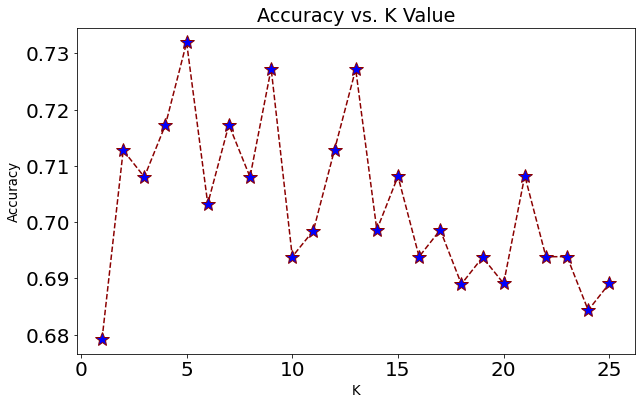

In [108]:
accuracy_rate = []

# Will take some time
for i in range(1,26):
    np.random.seed(777)
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain_scaled,y_train,cv=cv,scoring=bal_scorer)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))

plt.plot(range(1,26),accuracy_rate,color='darkred', linestyle='dashed', marker='*',
         markerfacecolor='blue', markersize=15)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

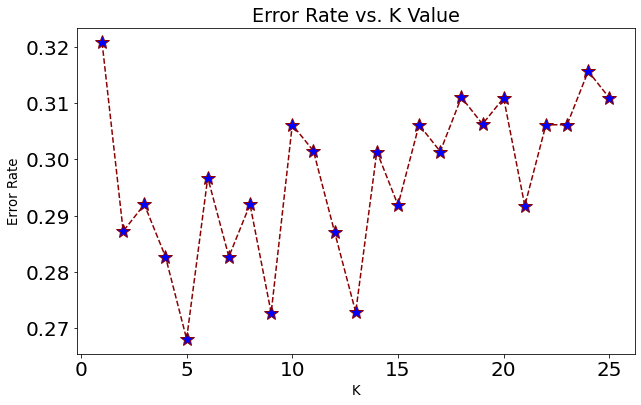

In [109]:
error_rate = []

# Will take some time
for i in range(1,26):
    np.random.seed(777)
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain_scaled,y_train,cv=cv,scoring=bal_scorer)
    error_rate.append(1-score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_rate,color='darkred', linestyle='dashed', marker='*',
        markerfacecolor='blue', markersize=15)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Parameters are : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Cross validation Accuracy : 0.7319396051103368
Cross validation Precision : 0.6369047619047619
Cross validation recall : 0.3724358974358974
Cross validation specificity : 0.9010610079575597
Cross validation f1 score : 0.46933333333333344
Classification report
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        61
           1       0.50      0.34      0.41        29

    accuracy                           0.68        90
   macro avg       0.61      0.59      0.59        90
weighted avg       0.65      0.68      0.66        90

Accuracy: 0.6777777777777778
Precision: 0.5
Sensitivity_recall: 0.3448275862068966
Specificity: 0.8360655737704918
F1_score: 0.40816326530612246
MCC: 0.20333963704804733
Confusion matrix: [[51 10]
 [19 10]]


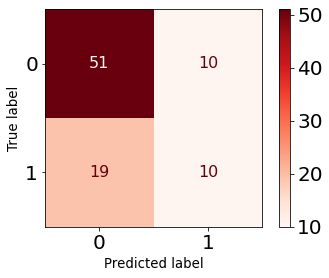

ROC AUC=0.762


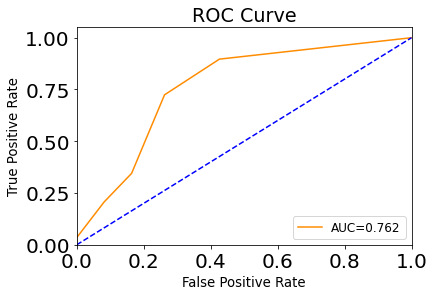

In [110]:
np.random.seed(777)
knn5 = KNeighborsClassifier()
knn5= knn5.fit(xtrain_scaled,y_train)
print("Parameters are :",knn5.get_params(deep=True))
            

cv_accuracy = cross_val_score(knn5,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(knn5,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(knn5,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(knn5,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(knn5,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = knn5.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn5','wb') as file:
    pickle.dump(knn5,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = knn5.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    


### Hyperparameter tuning

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Tuned Hyperparameters : {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Parameters are : {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Cross validation Accuracy : 0.7656213704994193
Cross validation Precision : 0.8377777777777778
Cross validation recall : 0.32051282051282054
Cross validation specificity : 0.9716180371352786
Cross validation f1 score : 0.45238080495356037
Classification report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        61
           1       0.61      0.38      0.47        29

    accuracy                           0.72        90
   macro avg       0.68      0.63      0.64        90
weighted avg       0.71      0.72      0.70        90

Accuracy: 0.7222222222222222
Precision: 0.6111111111111112
Sensitivity_reca

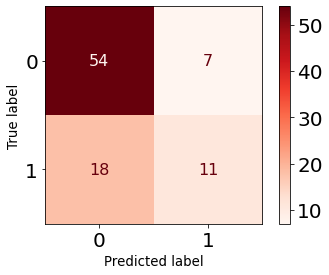

ROC AUC=0.804


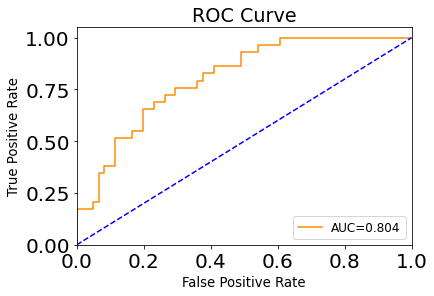

In [111]:
param_grid = {
        "n_neighbors":np.arange(8,20,1),
        'weights':["uniform",'distance'], 
         'metric':['minkowski','euclidean','manhattan'],
       "leaf_size":np.arange(10,30,2)
    }
np.random.seed(777)
knn6 = KNeighborsClassifier(n_jobs=-1)
gridsearch = GridSearchCV(knn6,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_knn3 = knn6.set_params(**grid_result.best_params_)
  
tuned_knn3.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_knn3.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_knn3,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_knn3,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_knn3,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_knn3,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity =  cross_val_score(tuned_knn3,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    

    

y_predicted = tuned_knn3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn6','wb') as file:
    pickle.dump(tuned_knn3,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = tuned_knn3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 5)SVM
## Before Tuning

Parameters are : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.7415795586527294
Cross validation Precision : 0.7126695526695526
Cross validation recall : 0.369551282051282
Cross validation specificity : 0.9140583554376658
Cross validation f1 score : 0.4788233209285841
Classification report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        61
           1       0.68      0.52      0.59        29

    accuracy                           0.77        90
   macro avg       0.74      0.70      0.71        90
weighted avg       0.76      0.77      0.76        90

Accuracy: 0.7666666666666667
Precision: 0.6818181818181818
Sensitivity_recall: 0.5172413793103449
Specificity: 0.8852459

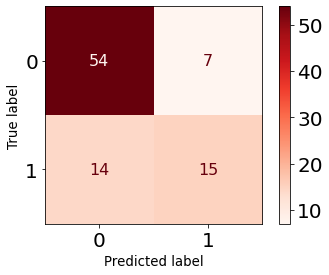

ROC AUC=0.817


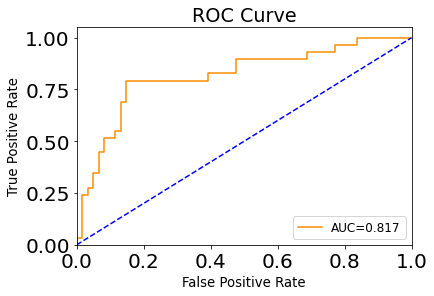

In [112]:
svm5 = SVC(probability=True,random_state=777)
svm5= svm5.fit(xtrain_scaled,y_train)
print("Parameters are :",svm5.get_params(deep=True))
            


cv_accuracy = cross_val_score(svm5,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(svm5,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(svm5,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(svm5,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(svm5,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean()) 

y_predicted = svm5.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm5','wb') as file:
    pickle.dump(svm5,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = svm5.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

### Hyperparameter tuning

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Tuned Hyperparameters : {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Parameters are : {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.7313588850174215
Cross validation Precision : 0.5800155400155399
Cross validation recall : 0.5201923076923076
Cross validation specificity : 0.823607427055703
Cross validation f1 score : 0.5436374367320658
Classification report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        61
           1       0.48      0.48      0.48        29

    accuracy                           0.67        90
   macro avg       0.62      0.62      0.62        90
weighted avg       0.67      0.67      0.67

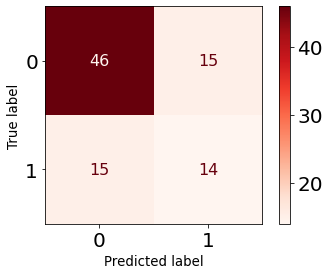

ROC AUC=0.702


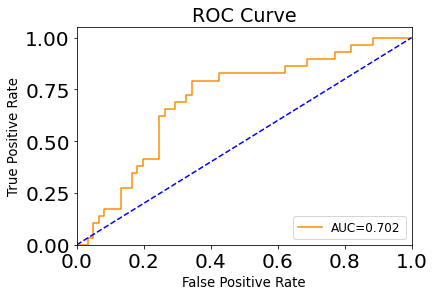

In [113]:
param_grid = {
              'kernel': ['sigmoid','poly','rbf','linear'],
               'C':[1,10,100,0.1],
              "gamma" : ['auto','scale'] 
            }

svm6 = SVC(probability=True, random_state=777)
gridsearch = GridSearchCV(svm6,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(xtrain_scaled,y_train)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_svm3 = svm6.set_params(**grid_result.best_params_)
  
tuned_svm3.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_svm3.get_params(deep=True))   

cv_accuracy = cross_val_score(tuned_svm3,xtrain_scaled,y_train,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_svm3,xtrain_scaled,y_train,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_svm3,xtrain_scaled,y_train,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_svm3,xtrain_scaled,y_train,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_svm3,xtrain_scaled,y_train,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean()) 


y_predicted = tuned_svm3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm6','wb') as file:
    pickle.dump(tuned_svm3,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_svm3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
    

## Comparing the ROC of tuned models before SMOTE

Logistic Model : ROC AUC=0.785
Random Forest Model : ROC AUC=0.790
XGBoost : ROC AUC=0.761
KNN : ROC AUC=0.804
SVM : ROC AUC=0.702


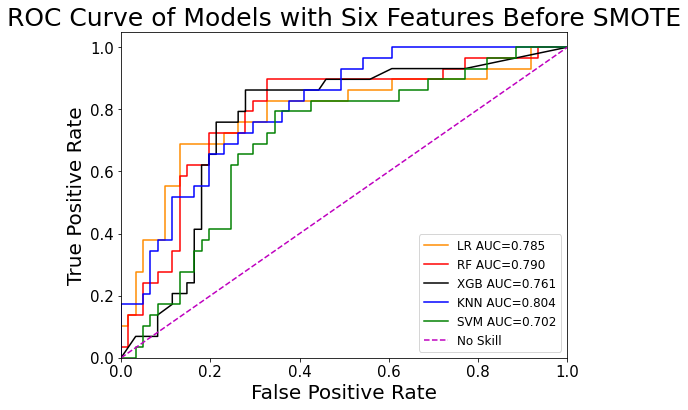

In [114]:
#ROC CURVE
#-----------------------Before SMOTE
plt.figure(figsize=(8,6))

probs_lr = tuned_lr3.predict_proba(xtest_scaled)[:,1]
fpr_lr,tpr_lr,threshold_lr=roc_curve(y_test,probs_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)
print('Logistic Model : ROC AUC=%0.3f'%roc_auc_lr)
plt.plot(fpr_lr,tpr_lr,label='LR AUC=%0.3f'%roc_auc_lr,color='darkorange')

probs_rf = tuned_rf3.predict_proba(xtest_scaled)[:,1]
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,probs_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)
print('Random Forest Model : ROC AUC=%0.3f'%roc_auc_rf)
plt.plot(fpr_rf,tpr_rf,label='RF AUC=%0.3f'%roc_auc_rf,color='red')

probs_xgb = tuned_xgb3.predict_proba(xtest_scaled)[:,1]
fpr_xg,tpr_xg,threshold_g=roc_curve(y_test,probs_xgb)
roc_auc_xg=auc(fpr_xg,tpr_xg)
print('XGBoost : ROC AUC=%0.3f'%roc_auc_xg)
plt.plot(fpr_xg,tpr_xg,label='XGB AUC=%0.3f'%roc_auc_xg,color='black')

probs_knn = tuned_knn3.predict_proba(xtest_scaled)[:,1]
fpr_knn,tpr_knn,threshold_g=roc_curve(y_test,probs_knn)
roc_auc_knn=auc(fpr_knn,tpr_knn)
print('KNN : ROC AUC=%0.3f'%roc_auc_knn)
plt.plot(fpr_knn,tpr_knn,label='KNN AUC=%0.3f'%roc_auc_knn,color='blue')


probs_svm = tuned_svm3.predict_proba(xtest_scaled)[:,1]
fpr_svm,tpr_svm,threshold_svm=roc_curve(y_test,probs_svm)
roc_auc_svm=auc(fpr_svm,tpr_svm)
print('SVM : ROC AUC=%0.3f'%roc_auc_svm)
plt.plot(fpr,tpr,label='SVM AUC=%0.3f'%roc_auc_svm,color='green')

plt.plot([0,1],[0,1],'m--',label='No Skill')
plt.legend(loc='lower right',fontsize=12)

plt.xlim([0,1])
plt.xticks(fontsize=15)
plt.ylim([0,1.05])
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("ROC Curve of Models with Six Features Before SMOTE",fontsize=25)
plt.show()





# Comparing confusion matrices of tuned models before SMOTE

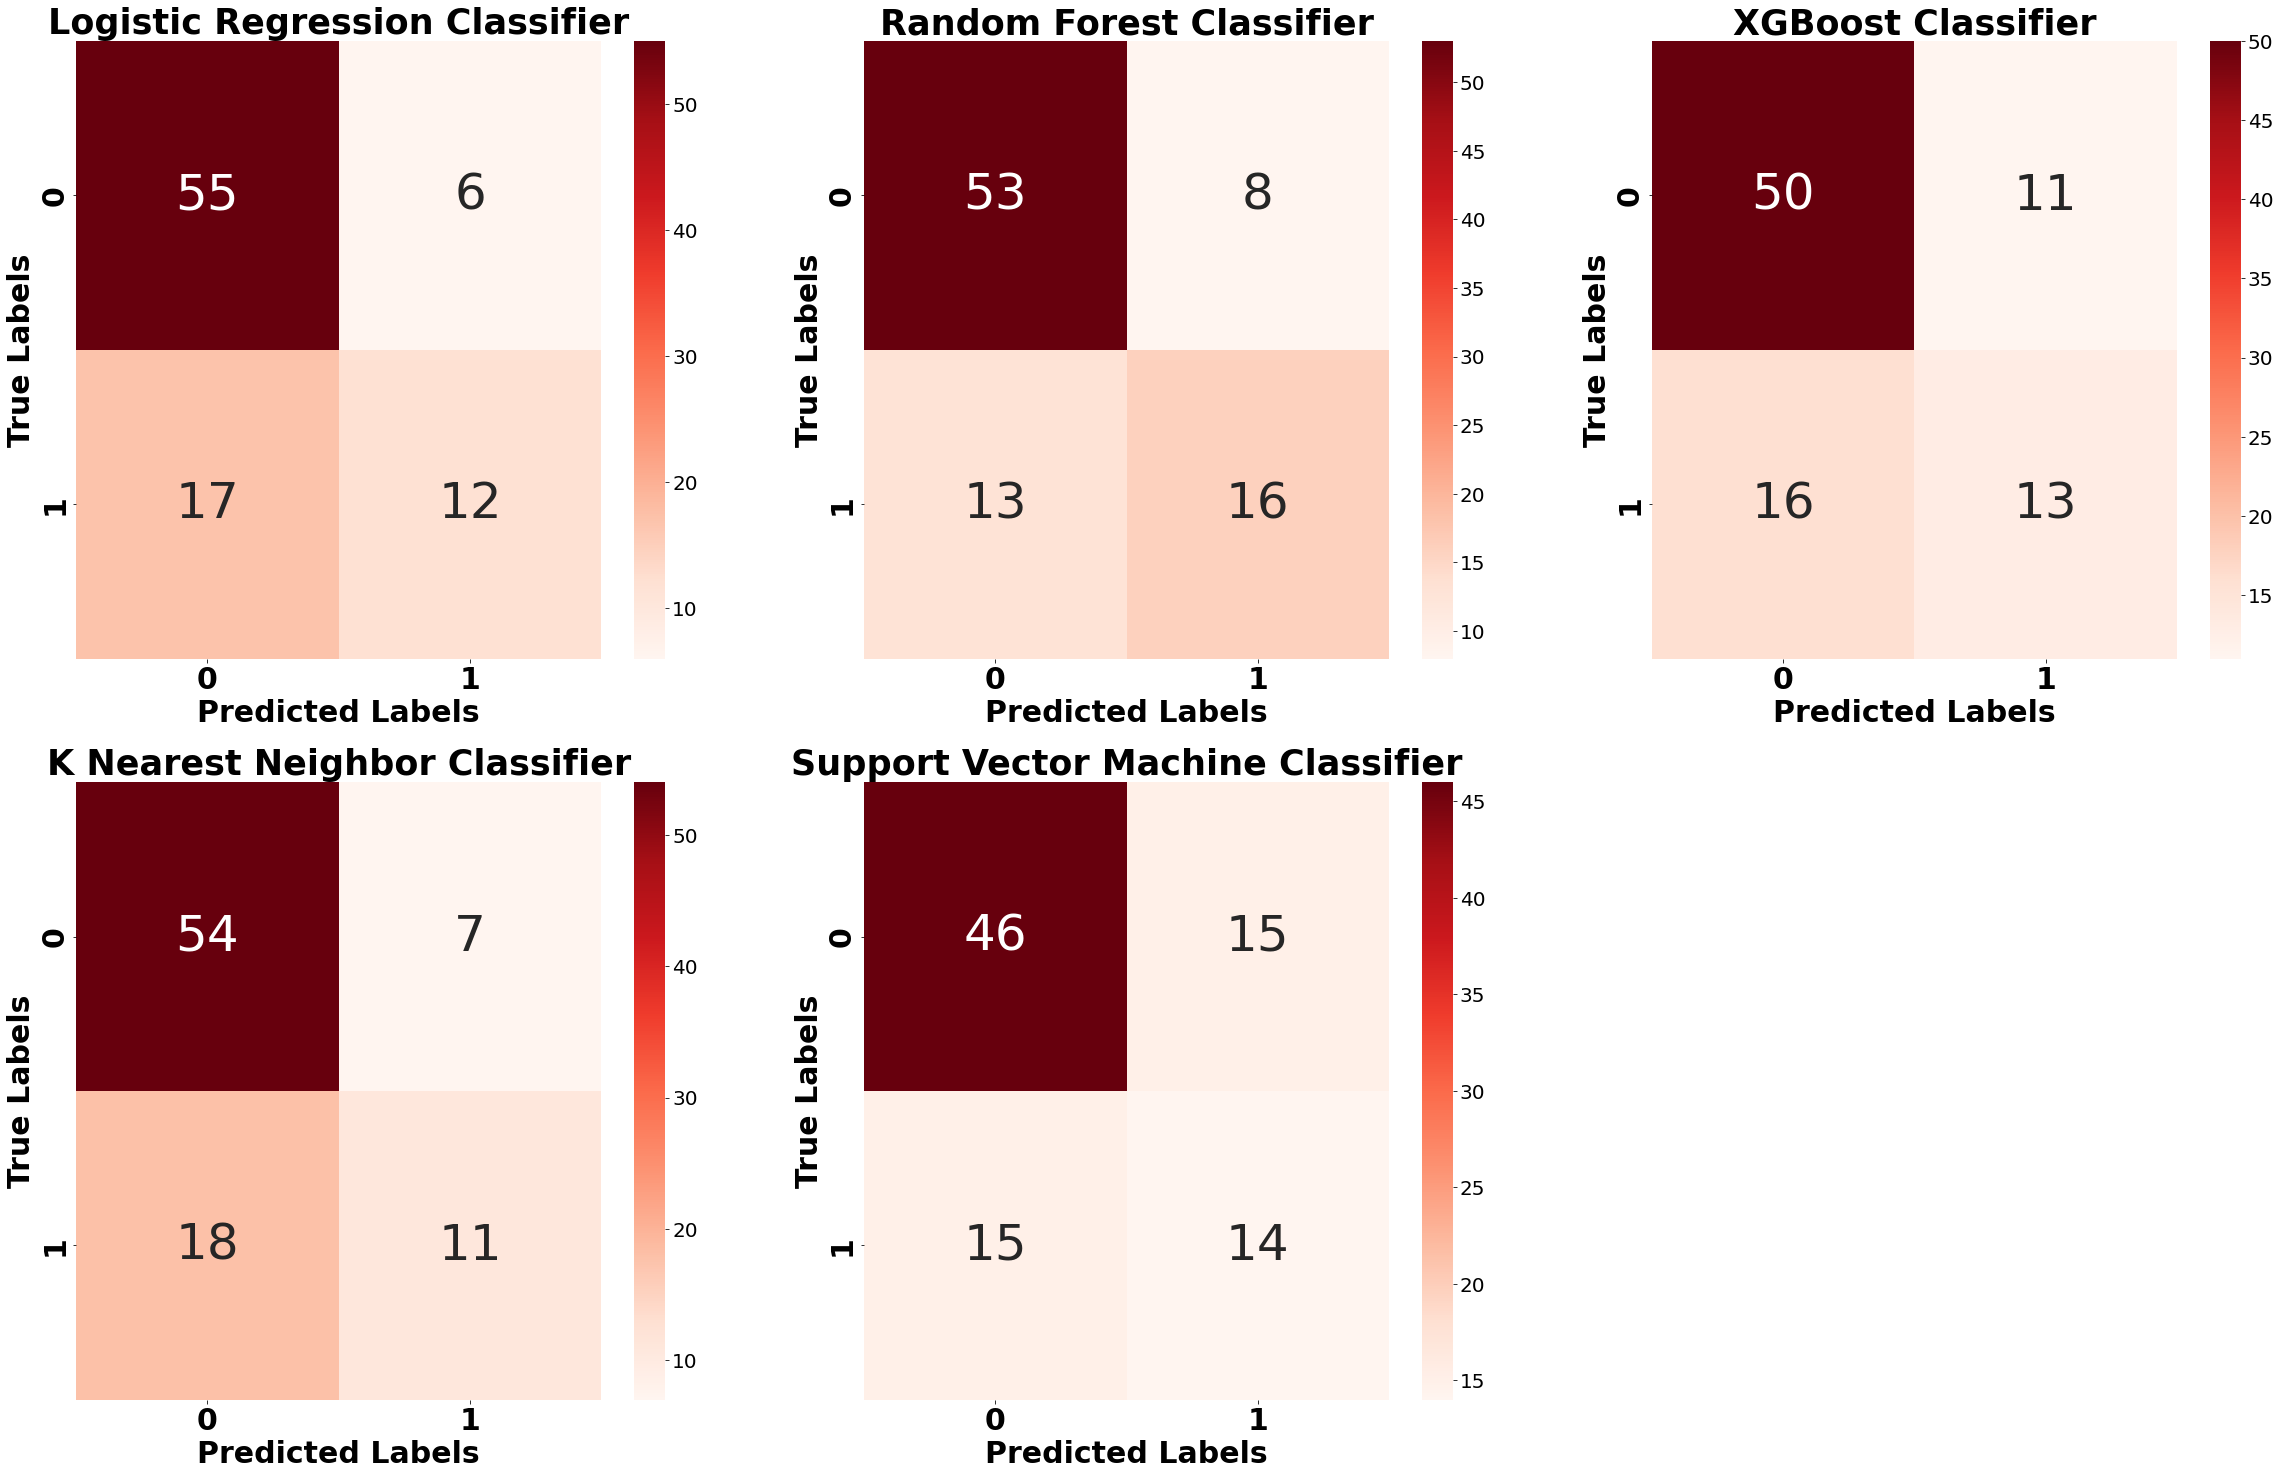

In [115]:
plt.figure(figsize=(40,25))

plt.subplot(2,3,1)
y_lr = tuned_lr3.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_lr)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Logistic Regression Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,2)
y_rf = tuned_rf3.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_rf)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Random Forest Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.subplot(2,3,3)
y_xgb = tuned_xgb3.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_xgb)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("XGBoost Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,4)
y_knn = tuned_knn3.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_knn)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("K Nearest Neighbor Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,5)
y_svm = tuned_svm3.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_svm)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Support Vector Machine Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.show()


# Oversampled dataset

# Resampling using smote

In [116]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

np.random.seed(777)
os = SMOTE()
x_train_resampled, y_train_resampled = os.fit_resample(xtrain_scaled, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))

#Resampled columns are stored in xtrain_resampled and ytrain_resampled

Before OverSampling, counts of label '1': 67
Before OverSampling, counts of label '0': 142 

After OverSampling, the shape of train_X: (284, 6)
After OverSampling, the shape of train_y: (284,) 

After OverSampling, counts of label '1': 142
After OverSampling, counts of label '0': 142


In [117]:
x_train.columns


Index(['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium',
       'creatinine_phosphokinase', 'platelets'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='ejection_fraction'>

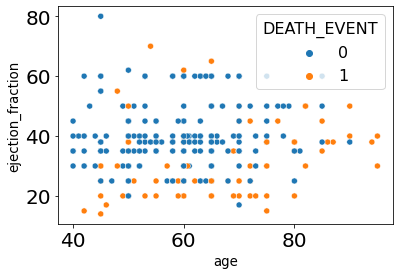

In [118]:
sns.scatterplot(x="age", y="ejection_fraction", data=patient_data, hue="DEATH_EVENT")

In [119]:
resampledx = np.concatenate((x_train_resampled,xtest_scaled))
resampledy = np.concatenate((y_train_resampled,y_test))

<AxesSubplot:>

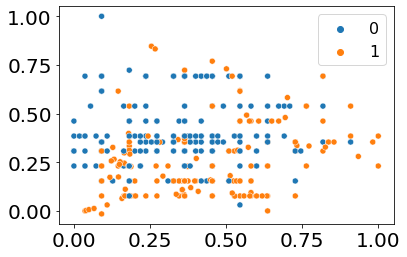

In [120]:
x = resampledx[:,2]
y = resampledx[:,1]
sns.scatterplot(x=x, y=y, hue=resampledy)

# AFTER OVERSAMPLING WITH SMOTE

In [121]:
x = patient_data.iloc[:,:11]
y=patient_data.iloc[:,-1]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=777)

mm_sc = MinMaxScaler()
xtrain_fit = mm_sc.fit(x_train)

xtrain_scaled = xtrain_fit.transform(x_train)

xtest_scaled = xtrain_fit.transform(x_test)
print(xtrain_scaled)

[[0.14545455 1.         0.01289746 ... 0.48571429 0.         0.        ]
 [0.45454545 1.         0.0105989  ... 0.77142857 0.         0.        ]
 [0.41818182 0.         0.02081471 ... 0.91428571 1.         1.        ]
 ...
 [0.45454545 1.         0.01340825 ... 0.6        1.         0.        ]
 [0.63636364 0.         0.07048908 ... 0.68571429 1.         0.        ]
 [0.54545455 0.         0.10279658 ... 0.57142857 0.         0.        ]]


In [122]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
np.random.seed(777)
os = SMOTE()
x_train_resampled, y_train_resampled = os.fit_resample(xtrain_scaled, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))

Before OverSampling, counts of label '1': 67
Before OverSampling, counts of label '0': 142 

After OverSampling, the shape of train_X: (284, 11)
After OverSampling, the shape of train_y: (284,) 

After OverSampling, counts of label '1': 142
After OverSampling, counts of label '0': 142


In [123]:

cv=KFold(n_splits=5,random_state=777,shuffle=True)
score1 = make_scorer(accuracy_score)
score2 = make_scorer(precision_score)
score3 = make_scorer(recall_score)
score4 = make_scorer(f1_score)
score5 = make_scorer(recall_score,pos_label=0)

scorer = make_scorer(f1_score)
bal_scorer = make_scorer(accuracy_score)

resampledx = np.concatenate((x_train_resampled, xtest_scaled))
resampledy = np.concatenate((y_train_resampled,y_test))


# 1. Logistic Regression

# Before Tuning

Parameters are : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.725
Cross validation Precision : 0.7109479026720406
Cross validation recall : 0.7794257732401564
Cross validation specificity : 0.6781544925662571
Cross validation f1 score : 0.7395068459991181
Classification report
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        61
           1       0.48      0.72      0.58        29

    accuracy                           0.66        90
   macro avg       0.65      0.67      0.64        90
weighted avg       0.71      0.66      0.67        90

Accuracy: 0.6555555555555556
Precision: 0.4772727272727273
Sensitivity_recall: 0.7241379310344828
Specificity: 0.6229508196721312
F1_s

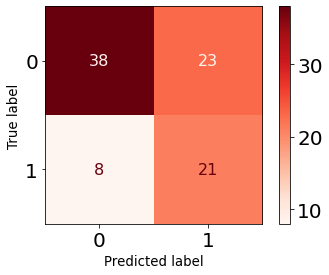

ROC AUC=0.697


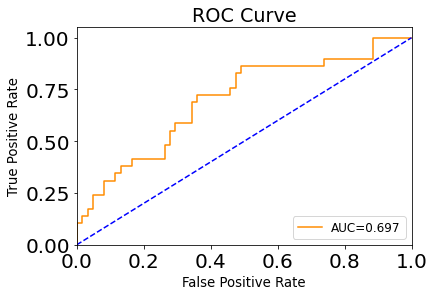

In [124]:
lr3 = LogisticRegression(random_state=777)
lr3= lr3.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",lr3.get_params(deep=True))
            

cv_accuracy = cross_val_score(lr3,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(lr3,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(lr3,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(lr3,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(lr3,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())
    
    
y_predicted = lr3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr3','wb') as file:
    pickle.dump(lr3,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()
#ROC CURVE
    
probs = lr3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# Hyperparameter Tuning

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Tuned Hyperparameters : {'C': 3.0009999999999994, 'penalty': 'l1', 'solver': 'liblinear'}
Parameters are : {'C': 3.0009999999999994, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 777, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7674812030075189
Cross validation Precision : 0.7465813278716504
Cross validation recall : 0.8219114670050492
Cross validation f1 score : 0.7803486132511555
Cross validation Specificity : 0.7151605257487611
Classification report
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        61
           1       0.54      0.69      0.61        29

    accuracy                           0.71        90
   macro avg       0.69      0.71      0.69        90
weigh

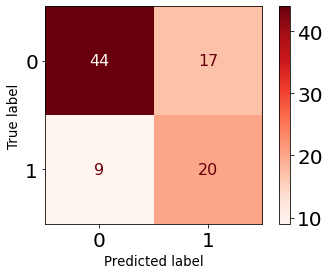

ROC AUC=0.719


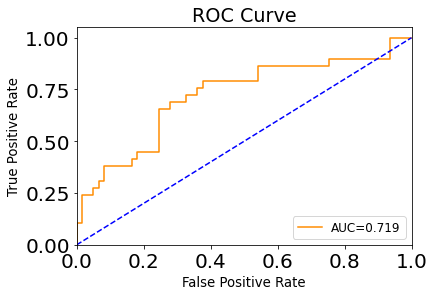

In [125]:
parameters = {
      'penalty' : ['l1','l2',"elasticnet"], 
        'C'       :  np.arange(0.001,5,1),
       'solver'  : [ 'elasticnet','lbfgs',"liblinear"]
      
    }
lr4 = LogisticRegression(random_state=777)
gridsearch = GridSearchCV(lr4,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled,y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_lr2 = lr4.set_params(**grid_result.best_params_)
  
tuned_lr2.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",tuned_lr2.get_params(deep=True))      

   
cv_accuracy = cross_val_score(tuned_lr2,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_lr2,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_lr2,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_lr2,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_lr2,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation f1 score :", cv_f1.mean())   
print("Cross validation Specificity :",cv_specificity.mean())
    
y_predicted = tuned_lr2.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr4','wb') as file:
    pickle.dump(tuned_lr2,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_lr2.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 2. RANDOM FOREST

# Before Tuning

Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7853383458646617
Cross validation Precision : 0.7755555555555556
Cross validation recall : 0.8175364945544373
Cross validation Specificity : 0.7636920922215039
Cross validation f1 score : 0.7903010017566349
Classification report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        61
           1       0.57      0.55      0.56        29

    accuracy                           0.72        90
   macro avg       0.68      0.68      0.68        90
weighted avg       0.72      0.72      0.72        90

Accur

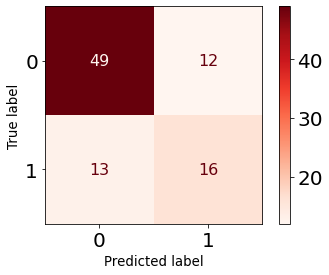

ROC AUC=0.772


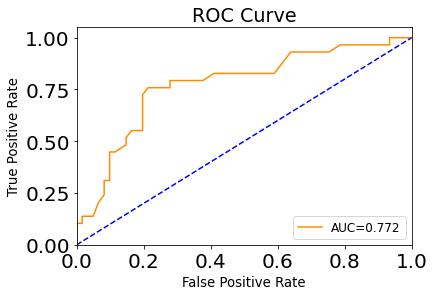

In [126]:
rf3 = RandomForestClassifier(random_state=777)
rf3= rf3.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",rf3.get_params(deep=True))
            

cv_accuracy = cross_val_score(rf3,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(rf3,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(rf3,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(rf3,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(rf3,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation Specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())       

y_predicted = rf3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf3','wb') as file:
    pickle.dump(rf3,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = rf3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()


# Hyperparameter Tuning

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Tuned Hyperparameters : {'max_depth': 12, 'max_leaf_nodes': 16, 'n_estimators': 50}
Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.781766917293233
Cross validation Precision : 0.7671701655572625
Cross validation recall : 0.8188173790388813
Cross validation Specificity : 0.7552854988149107
Cross validation f1 score : 0.7862801608669269
Classification report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.66      0.66      0.66        29

    accuracy                 

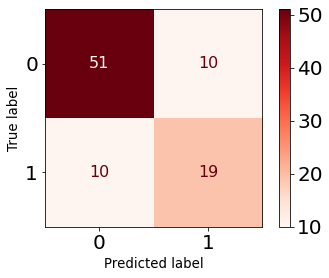

ROC AUC=0.791


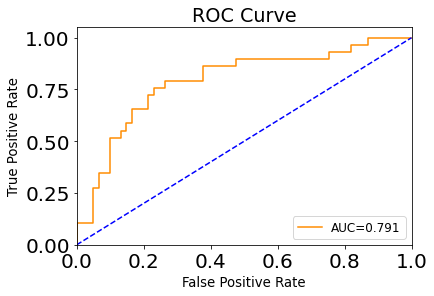

In [127]:
param_grid = {
        'max_depth': np.arange(12,15,1),
        'max_leaf_nodes':np.arange(15,20,1),
        'n_estimators': [50,60,80,100,101,102,105]
    }
    
rf4 = RandomForestClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(rf4,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled, y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_rf2 = rf4.set_params(**grid_result.best_params_)
  
tuned_rf2.fit(x_train_resampled, y_train_resampled)
print("Parameters are :",tuned_rf2.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_rf2,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_rf2,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_rf2,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_rf2,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_rf2,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)


print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation Specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = tuned_rf2.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf4','wb') as file:
    pickle.dump(tuned_rf2,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_rf2.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
   

# 3. XGBOOST

# Before Tuning

Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Cross validation Accuracy : 0.7748120300751878
Cross validation Precision : 0.7627586206896552
Cross validation recall : 0.803352384263541

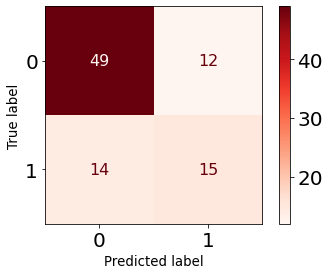

ROC AUC=0.741


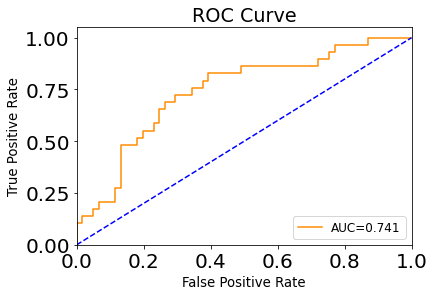

In [128]:
xgb3 = XGBClassifier(random_state=777)
xgb3= xgb3.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",xgb3.get_params(deep=True))
            

cv_accuracy = cross_val_score(xgb3,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(xgb3,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(xgb3,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(xgb3,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(xgb3,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    
    
y_predicted = xgb3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb3','wb') as file:
    pickle.dump(xgb3,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = xgb3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    


# Hyperparameter Tuning

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 90}
Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 5, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 90, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


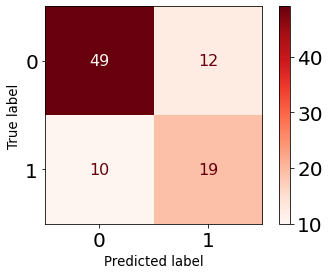

ROC AUC=0.760


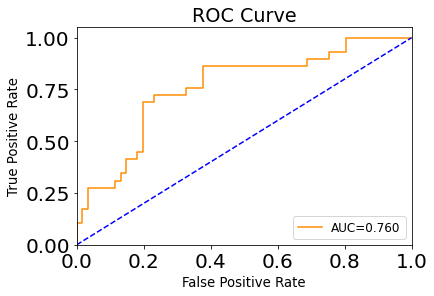

In [129]:
params={
      "learning_rate"    : [0.001,0.01,0.05,0.1] ,
     "max_depth" : np.arange(5,11,1),
     "n_estimators":[50,60,70,80,90,100]
    }

    
xgb4 = XGBClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(xgb4,                    # model
                   param_grid = params,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled, y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_xgb2 = xgb4.set_params(**grid_result.best_params_)
  
tuned_xgb2.fit(x_train_resampled, y_train_resampled)
print("Parameters are :",tuned_xgb2.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_xgb2,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_xgb2,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_xgb2,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_xgb2,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_xgb2,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())   

y_predicted = tuned_xgb2.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb4','wb') as file:
    pickle.dump(tuned_xgb2,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_xgb2.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

# 4. KNN

Text(0, 0.5, 'Accuracy')

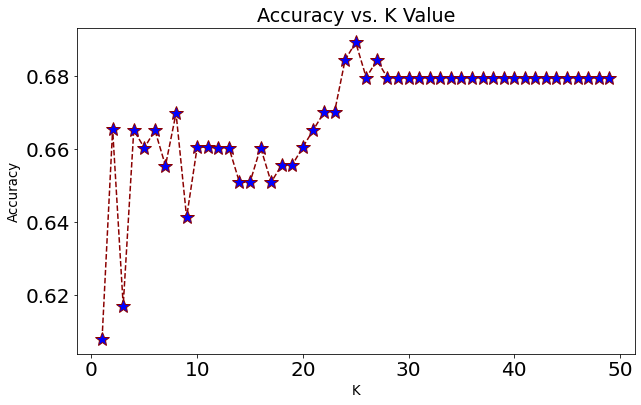

In [130]:
accuracy_rate = []

for i in range(1,50):
    np.random.seed(777)
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain_scaled,y_train,cv=cv,scoring=bal_scorer)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))

plt.plot(range(1,50),accuracy_rate,color='darkred', linestyle='dashed', marker='*',
         markerfacecolor='blue', markersize=15)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

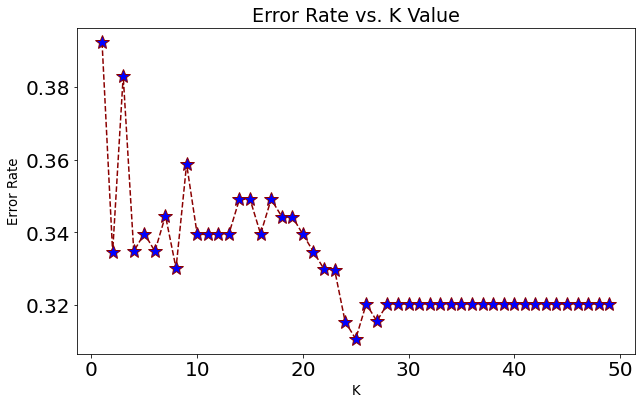

In [131]:
error_rate = []

for i in range(1,50):
    np.random.seed(777)
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain_scaled,y_train,cv=cv,scoring=bal_scorer)
    error_rate.append(1-score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='darkred', linestyle='dashed', marker='*',
        markerfacecolor='blue', markersize=15)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Before Tuning

Parameters are : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Cross validation Accuracy : 0.6581453634085213
Cross validation Precision : 0.6659572685379136
Cross validation recall : 0.611263463688864
Cross validation specificity : 0.6955451411333764
Cross validation f1 score : 0.6361214893887406
Classification report
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        61
           1       0.42      0.48      0.45        29

    accuracy                           0.62        90
   macro avg       0.58      0.59      0.58        90
weighted avg       0.64      0.62      0.63        90

Accuracy: 0.6222222222222222
Precision: 0.42424242424242425
Sensitivity_recall: 0.4827586206896552
Specificity: 0.6885245901639344
F1_score: 0.45161290322580644
MCC: 0.16610561529507634
Confusion matrix: [[42 19]
 [15 14]]


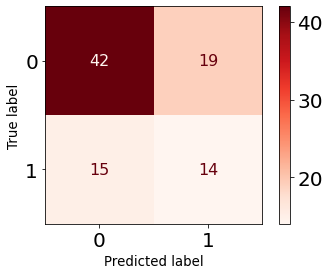

ROC AUC=0.599


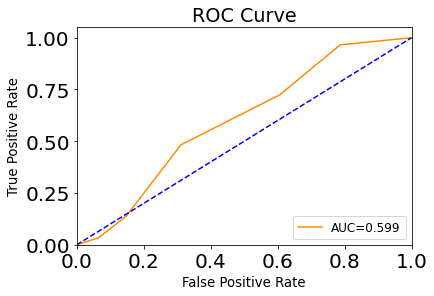

In [132]:
np.random.seed(777)
knn3 = KNeighborsClassifier()
knn3= knn3.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",knn3.get_params(deep=True))
            
cv_accuracy = cross_val_score(knn3,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(knn3,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(knn3,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(knn3,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(knn3,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    


y_predicted = knn3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn3','wb') as file:
    pickle.dump(knn3,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = knn3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

# Hyperparameter Tuning

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Tuned Hyperparameters : {'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
Parameters are : {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Cross validation Accuracy : 0.6970551378446116
Cross validation Precision : 0.6868703578380998
Cross validation recall : 0.7186726397685435
Cross validation specificity : 0.671805645335057
Cross validation f1 score : 0.7020246310221097
Classification report
              precision    recall  f1-score   support

           0       0.71      0.90      0.80        61
           1       0.54      0.24      0.33        29

    accuracy                           0.69        90
   macro avg       0.63      0.57      0.57        90
weighted avg       0.66      0.69      0.65        90

Accuracy: 0.6888888888888889
Precision: 0.5384615384615384
Sensitivity_recall: 0.2413793103448276
Specifi

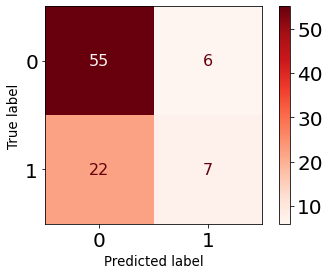

ROC AUC=0.607


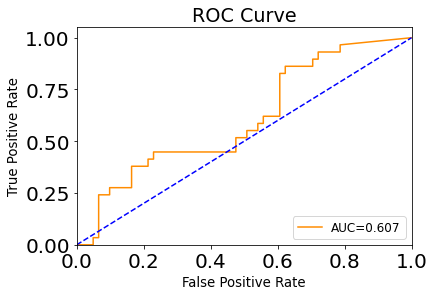

In [133]:
param_grid = {
        'weights':["uniform",'distance'], 
        "n_neighbors":np.arange(5,20,2),
       "leaf_size":np.arange(10,20,2)
        }
np.random.seed(777)
knn4 = KNeighborsClassifier(n_jobs=-1)
gridsearch = GridSearchCV(knn4,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled,y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_knn2 = knn4.set_params(**grid_result.best_params_)
  
tuned_knn2.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_knn2.get_params(deep=True))      


cv_accuracy = cross_val_score(tuned_knn2,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_knn2,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_knn2,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_knn2,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_knn2,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    


y_predicted = tuned_knn2.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn4','wb') as file:
    pickle.dump(tuned_knn2,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_knn2.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 5. SVM

# Before Tuning

Parameters are : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.6934210526315788
Cross validation Precision : 0.6919088669950739
Cross validation recall : 0.7027087741939992
Cross validation specificity : 0.6928668390433097
Cross validation f1 score : 0.6880882558301913
Classification report
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        61
           1       0.49      0.66      0.56        29

    accuracy                           0.67        90
   macro avg       0.65      0.66      0.65        90
weighted avg       0.70      0.67      0.68        90

Accuracy: 0.6666666666666666
Precision: 0.48717948717948717
Sensitivity_recall: 0.6551724137931034
Specificity: 0.67213

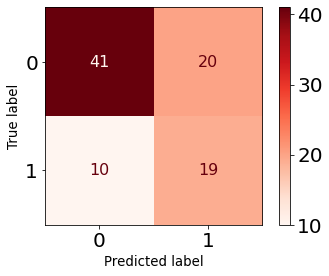

ROC AUC=0.677


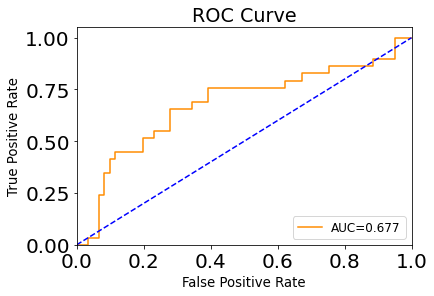

In [134]:
svm3 = SVC(probability=True,random_state=777)
svm3= svm3.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",svm3.get_params(deep=True))
            

cv_accuracy = cross_val_score(svm3,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(svm3,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(svm3,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(svm3,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(svm3,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean()) 
print("Cross validation f1 score :", cv_f1.mean()) 

y_predicted = svm3.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm3','wb') as file:
    pickle.dump(svm3,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)

plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = svm3.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# Hyperparameter Tuning

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Tuned Hyperparameters : {'C': 19.000999999999998, 'gamma': 'scale', 'kernel': 'rbf'}
Parameters are : {'C': 19.000999999999998, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross Validation Scores are [0.82352941 0.73529412 0.79310345 0.83076923 0.75862069]
Average Cross Validation score :0.7882633796224059
Cross validation Accuracy : 0.7745614035087719
Cross validation Precision : 0.7500058247903075
Cross validation recall : 0.8353868407551243
Cross validation specificity : 0.7153253609135961
Cross validation f1 score : 0.7882633796224059
Classification report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        61
           1       0.62      0.62     

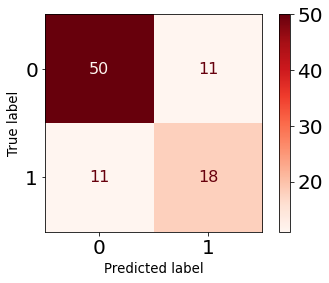

ROC AUC=0.735


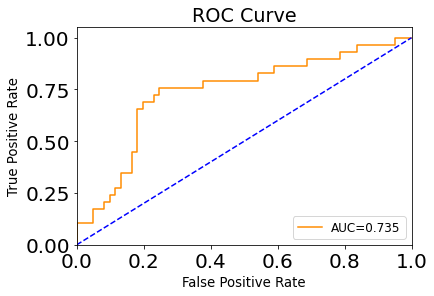

In [135]:
param_grid = {
               'kernel': ['rbf','sigmoid','linear'],
                "C":np.arange(0.001,20,1),
                'gamma':["scale",'auto']}

svm4 = SVC(probability=True, random_state=777)
gridsearch = GridSearchCV(svm4,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled,y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_svm2 = svm4.set_params(**grid_result.best_params_)
  
tuned_svm2.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_svm2.get_params(deep=True))      
score=cross_val_score(tuned_svm2,x_train_resampled,y_train_resampled,cv=cv,scoring=scorer)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
 
cv_accuracy = cross_val_score(tuned_svm2,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_svm2,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_svm2,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_svm2,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_svm2,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())     
    
y_predicted = tuned_svm2.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm4','wb') as file:
    pickle.dump(tuned_svm2,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
cm = confusion_matrix(y_test, y_predicted, labels=tuned_svm2.classes_)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_svm2.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
   

## Comparing ROC curve of tuned models after SMOTE

Logistic Model : ROC AUC=0.719
Random Forest Model : ROC AUC=0.791
XGBoost : ROC AUC=0.760
KNN : ROC AUC=0.607
SVM : ROC AUC=0.735


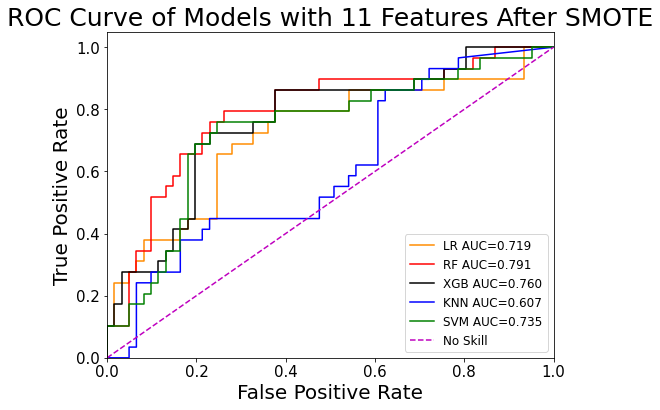

In [136]:
#ROC CURVE
plt.figure(figsize=(8,6))

probs_lr = tuned_lr2.predict_proba(xtest_scaled)[:,1]
fpr_lr,tpr_lr,threshold_lr=roc_curve(y_test,probs_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)
print('Logistic Model : ROC AUC=%0.3f'%roc_auc_lr)
plt.plot(fpr_lr,tpr_lr,label='LR AUC=%0.3f'%roc_auc_lr,color='darkorange')

probs_rf = tuned_rf2.predict_proba(xtest_scaled)[:,1]
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,probs_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)
print('Random Forest Model : ROC AUC=%0.3f'%roc_auc_rf)
plt.plot(fpr_rf,tpr_rf,label='RF AUC=%0.3f'%roc_auc_rf,color='red')

probs_xgb = tuned_xgb2.predict_proba(xtest_scaled)[:,1]
fpr_xg,tpr_xg,threshold_g=roc_curve(y_test,probs_xgb)
roc_auc_xg=auc(fpr_xg,tpr_xg)
print('XGBoost : ROC AUC=%0.3f'%roc_auc_xg)
plt.plot(fpr_xg,tpr_xg,label='XGB AUC=%0.3f'%roc_auc_xg,color='black')

probs_knn = tuned_knn2.predict_proba(xtest_scaled)[:,1]
fpr_knn,tpr_knn,threshold_g=roc_curve(y_test,probs_knn)
roc_auc_knn=auc(fpr_knn,tpr_knn)
print('KNN : ROC AUC=%0.3f'%roc_auc_knn)
plt.plot(fpr_knn,tpr_knn,label='KNN AUC=%0.3f'%roc_auc_knn,color='blue')



probs_svm = tuned_svm2.predict_proba(xtest_scaled)[:,1]
fpr_svm,tpr_svm,threshold_svm=roc_curve(y_test,probs_svm)
roc_auc_svm=auc(fpr_svm,tpr_svm)
print('SVM : ROC AUC=%0.3f'%roc_auc_svm)
plt.plot(fpr,tpr,label='SVM AUC=%0.3f'%roc_auc_svm,color='green')


plt.plot([0,1],[0,1],'m--',label='No Skill')
plt.legend(loc='lower right',fontsize=12)

plt.xlim([0,1])
plt.xticks(fontsize=15)
plt.ylim([0,1.05])
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("ROC Curve of Models with 11 Features After SMOTE",fontsize=25)
plt.show()



# Comparing confusion matrices of tuned models after SMOTE

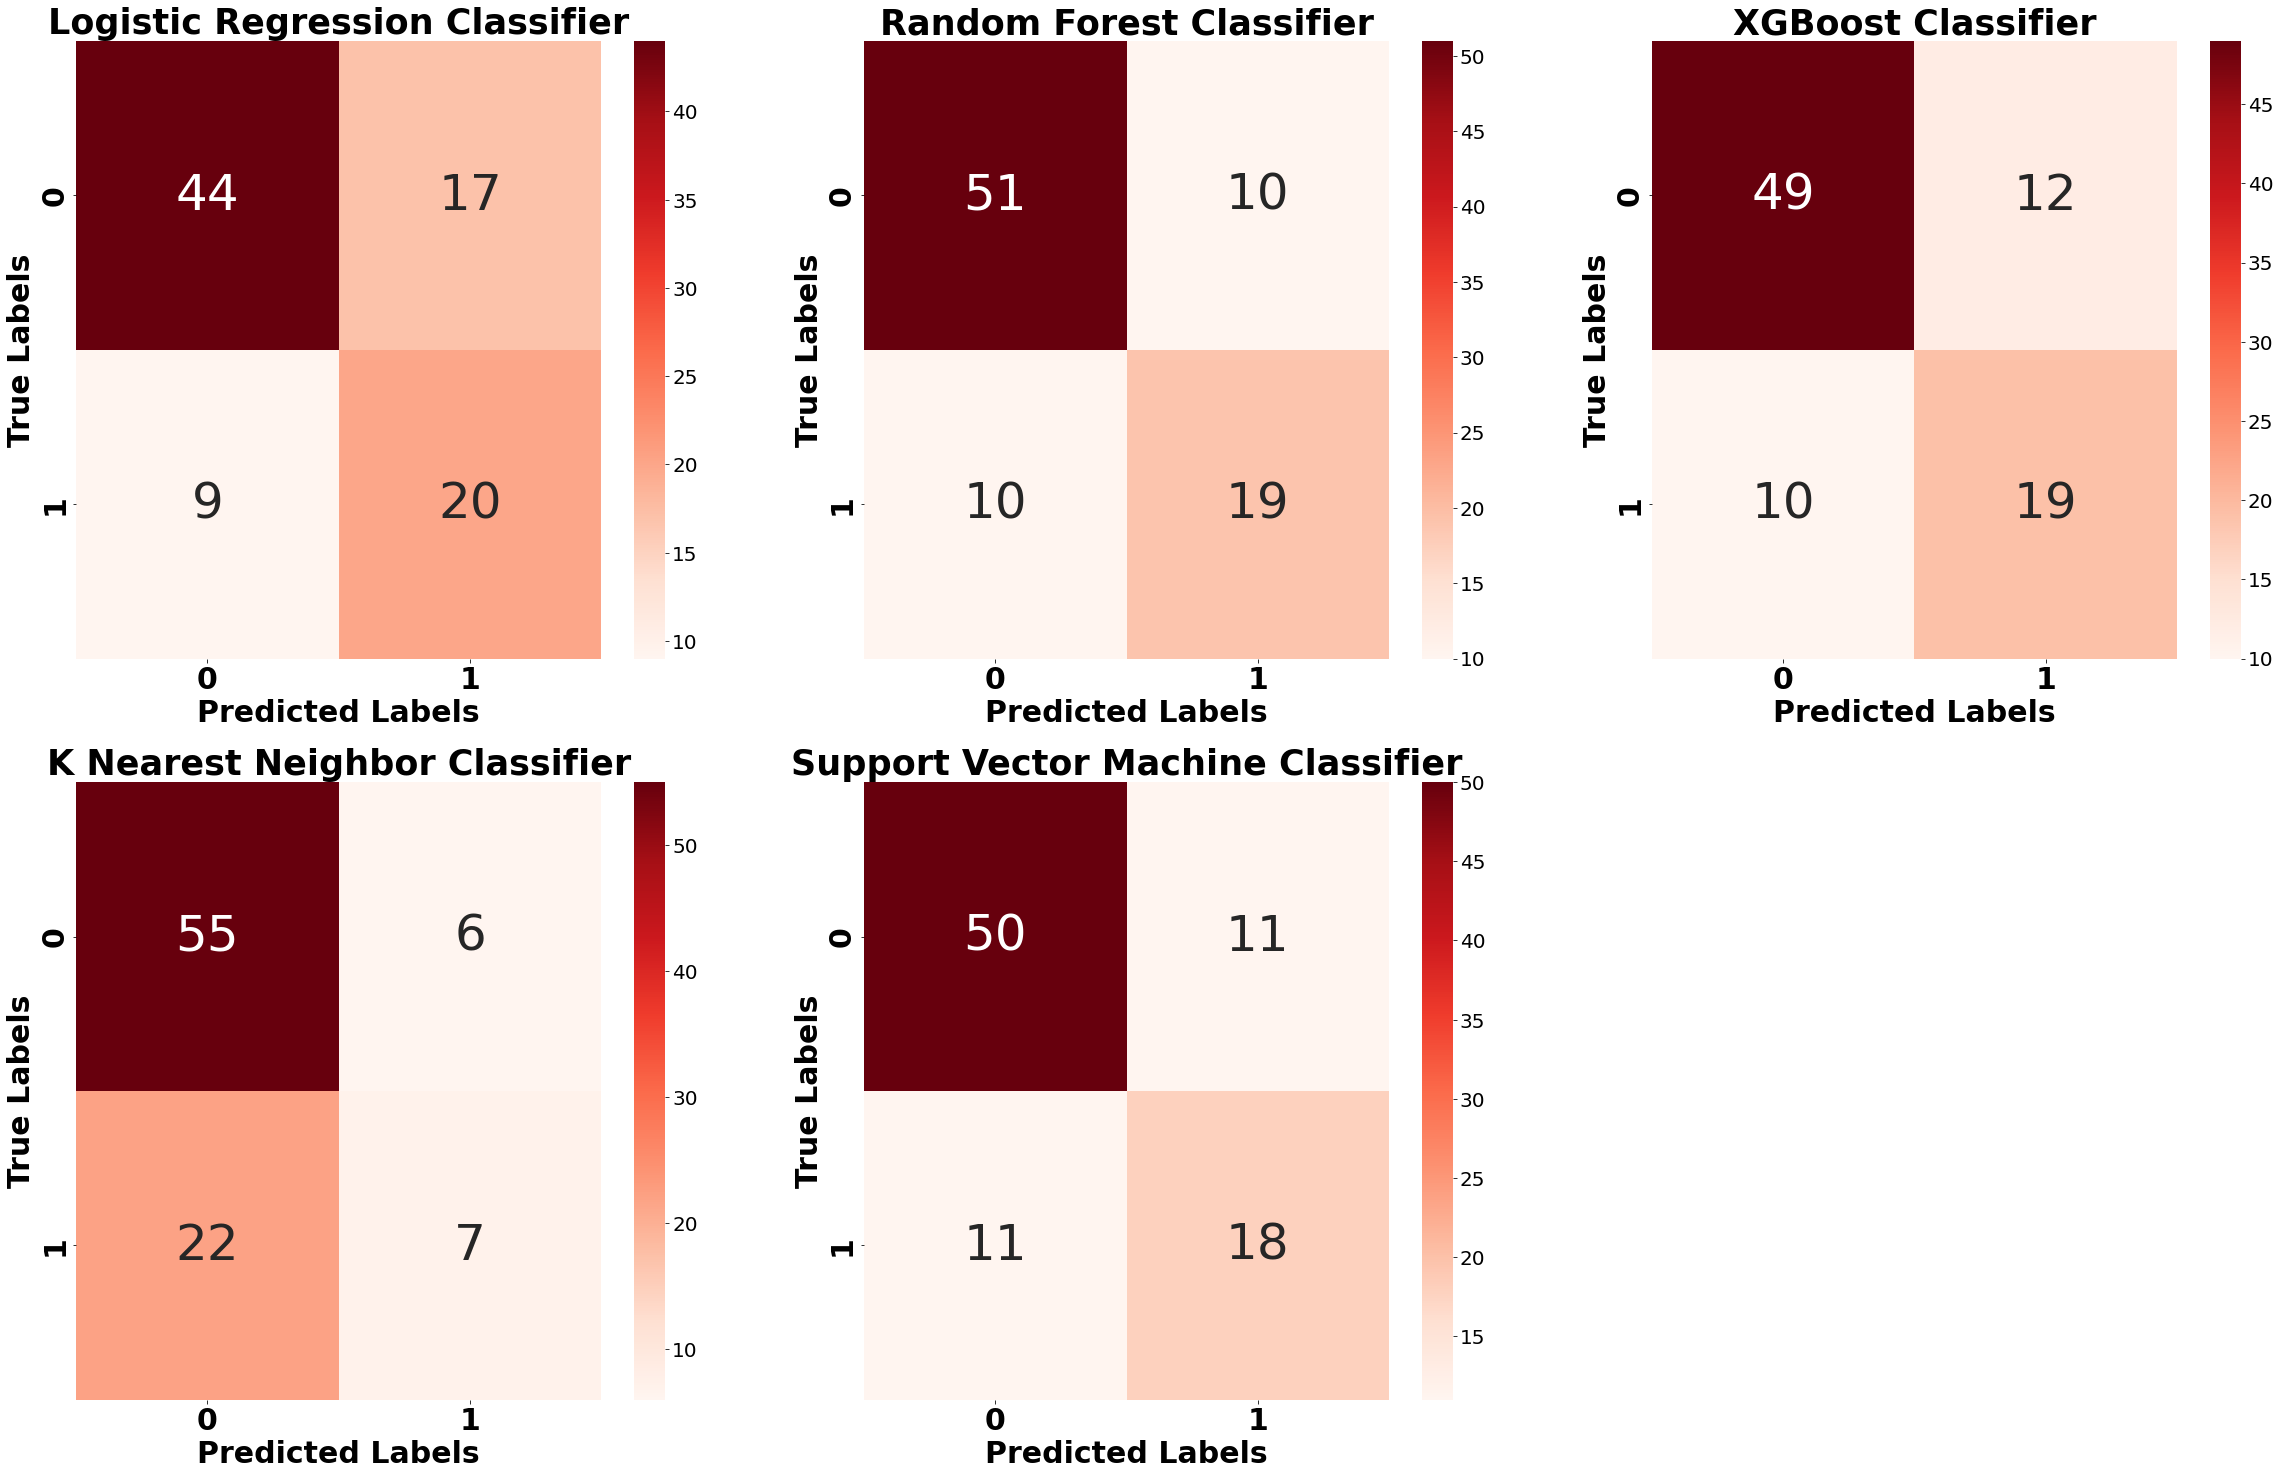

In [137]:
plt.figure(figsize=(40,25))

plt.subplot(2,3,1)
y_lr = tuned_lr2.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_lr)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Logistic Regression Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,2)
y_rf = tuned_rf2.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_rf)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Random Forest Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.subplot(2,3,3)
y_xgb = tuned_xgb2.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_xgb)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("XGBoost Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,4)
y_knn = tuned_knn2.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_knn)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("K Nearest Neighbor Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,5)
y_svm = tuned_svm2.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_svm)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Support Vector Machine Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.show()


# Strategy 2 - Model using serum creatinine, ejection fraction, age, serum sodium,platelets, creatinien phosphokinase

In [138]:
x_6 = patient_data.iloc[:,[7,4,0,8,2,6]]
x_6.head()

serum_creatinine  ejection_fraction   age  serum_sodium  \
0               1.9                 20  75.0           130   
1               1.1                 38  55.0           136   
2               1.3                 20  65.0           129   
3               1.9                 20  50.0           137   
4               2.7                 20  65.0           116   

   creatinine_phosphokinase  platelets  
0                       582  265000.00  
1                      7861  263358.03  
2                       146  162000.00  
3                       111  210000.00  
4                       160  327000.00

In [139]:
y=patient_data.iloc[:,-1]

In [140]:
#Train test split
x_train,x_test,y_train,y_test = train_test_split(x_6,y,test_size=0.30,stratify=y,random_state=777)

mm_sc = MinMaxScaler()
xtrain_fit = mm_sc.fit(x_train)

xtrain_scaled = xtrain_fit.transform(x_train)

xtest_scaled = xtrain_fit.transform(x_test)
#print(xtrain_scaled[4])

### SMOTE

In [141]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

os = SMOTE(random_state=777)
x_train_resampled, y_train_resampled = os.fit_resample(xtrain_scaled, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))

Before OverSampling, counts of label '1': 67
Before OverSampling, counts of label '0': 142 

After OverSampling, the shape of train_X: (284, 6)
After OverSampling, the shape of train_y: (284,) 

After OverSampling, counts of label '1': 142
After OverSampling, counts of label '0': 142


In [142]:
x_6.columns

Index(['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium',
       'creatinine_phosphokinase', 'platelets'],
      dtype='object')

In [143]:
for train_idx, test_idx in cv.split(x,y):
    print(y[train_idx].sum(), y[test_idx].sum())

81 15
79 17
72 24
78 18
74 22


# 1. Logistic regression

# Before Tuning

Parameters are : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.7042606516290727
Cross validation Precision : 0.7037500000000001
Cross validation recall : 0.742186001517626
Cross validation specificity : 0.6854611075199311
Cross validation f1 score : 0.7124131437106305
Classification report
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        61
           1       0.57      0.72      0.64        29

    accuracy                           0.73        90
   macro avg       0.71      0.73      0.71        90
weighted avg       0.76      0.73      0.74        90

Accuracy: 0.7333333333333333
Precision: 0.5675675675675675
Sensitivity_recall: 0.7241379310344828
Specificity: 0.737704918

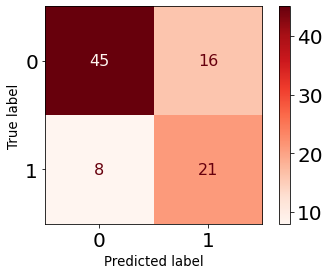

ROC AUC=0.783


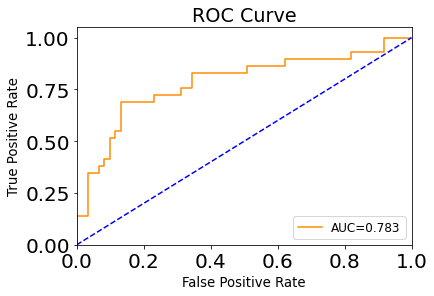

In [144]:
lr7 = LogisticRegression(random_state=777)
lr7= lr7.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",lr7.get_params(deep=True))
            
cv_accuracy = cross_val_score(lr7,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(lr7,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(lr7,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(lr7,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(lr7,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())


y_predicted = lr7.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr7','wb') as file:
    pickle.dump(lr7,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = lr7.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# Hyperparameter Tuning

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuned Hyperparameters : {'C': 2.601}
Parameters are : {'C': 2.601, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.725438596491228
Cross validation Precision : 0.7264069264069264
Cross validation recall : 0.7555341661449897
Cross validation specificity : 0.7130101271277742
Cross validation f1 score : 0.7308160247361699
Classification report
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        61
           1       0.57      0.69      0.62        29

    accuracy                           0.73        90
   macro avg       0.70      0.72      0.71        90
weighted avg       0.75      0.73      0.74        90

Accuracy: 0.733333333

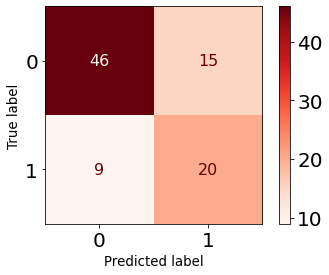

ROC AUC=0.783


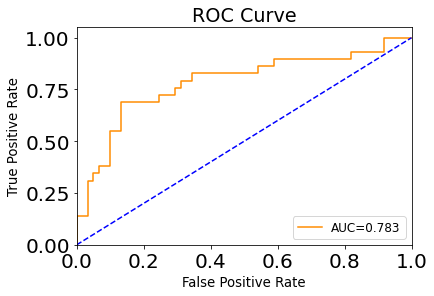

In [145]:
parameters = {
        'C' :  np.arange(0.001,3,0.1)
        }
lr8 = LogisticRegression(random_state=777)
gridsearch = GridSearchCV(lr8,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled,y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_lr4 = lr8.set_params(**grid_result.best_params_)
  
tuned_lr4.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",tuned_lr4.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_lr4,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_lr4,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_lr4,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_lr4,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_lr4,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean())   
print("Cross validation f1 score :", cv_f1.mean())   

    

y_predicted = tuned_lr4.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('lr8','wb') as file:
    pickle.dump(tuned_lr4,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)

plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_lr4.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
   

# 2. Random Forest

# Before Tuning

Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.8029448621553884
Cross validation Precision : 0.7923112371499469
Cross validation recall : 0.8403760673238837
Cross validation specificity : 0.7809782374488257
Cross validation f1 score : 0.8080556864659251
Classification report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        61
           1       0.64      0.62      0.63        29

    accuracy                           0.77        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.76      0.77      0.77        90

Accur

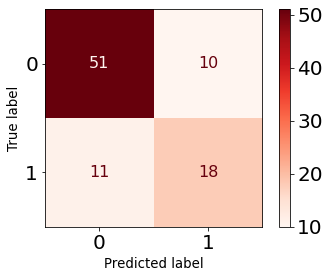

ROC AUC=0.773


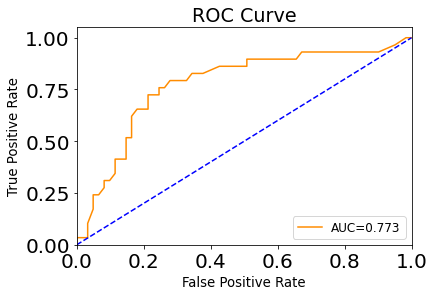

In [146]:
rf7 = RandomForestClassifier(random_state=777)
rf7= rf7.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",rf7.get_params(deep=True))

    
cv_accuracy = cross_val_score(rf7,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(rf7,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(rf7,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(rf7,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(rf7,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :", cv_specificity.mean()) 
print("Cross validation f1 score :", cv_f1.mean())       


y_predicted = rf7.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf7','wb') as file:
    pickle.dump(rf7,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = rf7.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    

# Hyperparameter Tuning

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Tuned Hyperparameters : {'max_depth': 12, 'max_leaf_nodes': 29, 'n_estimators': 70}
Parameters are : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 29, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_jobs': -1, 'oob_score': False, 'random_state': 777, 'verbose': 0, 'warm_start': False}
Cross validation Accuracy : 0.813408521303258
Cross validation Precision : 0.7932260244115084
Cross validation recall : 0.8748781711107
Cross validation specificity : 0.7683591898297781
Cross validation f1 score : 0.8230017747259127
Classification report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        61
           1       0.65      0.69      0.67        29

    accuracy                     

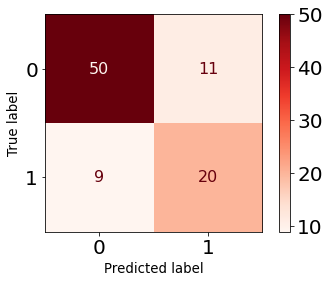

ROC AUC=0.785


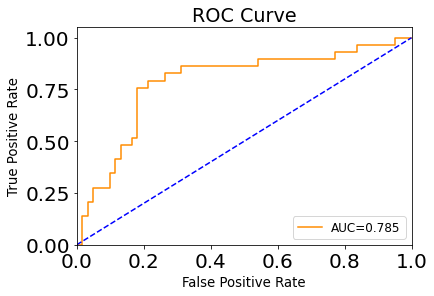

In [147]:
param_grid = {
       'max_depth': np.arange(12,15,1),
        'max_leaf_nodes':np.arange(25,30,1),
        'n_estimators': [50,70,80,100]
    }
    
rf8 = RandomForestClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(rf8,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled, y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_rf4 = rf8.set_params(**grid_result.best_params_)
  
tuned_rf4.fit(x_train_resampled, y_train_resampled)
print("Parameters are :",tuned_rf4.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_rf4,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_rf4,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_rf4,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_rf4,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_rf4,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())

y_predicted = tuned_rf4.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('rf8','wb') as file:
    pickle.dump(tuned_rf4,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")
plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_rf4.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

# 3. XGBoost

# Before Tuning

Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Cross validation Accuracy : 0.7817669172932332
Cross validation Precision : 0.7645443684153361
Cross validation recall : 0.827068092391882

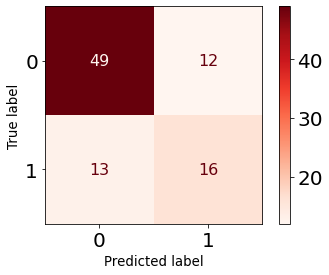

ROC AUC=0.752


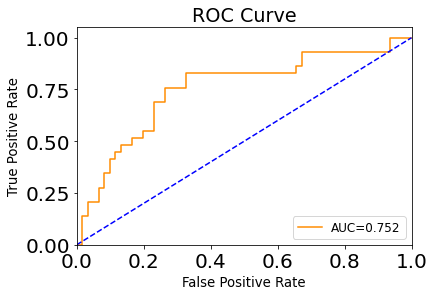

In [148]:
xgb7 = XGBClassifier(random_state=777)
xgb7= xgb7.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",xgb7.get_params(deep=True))

cv_accuracy = cross_val_score(xgb7,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(xgb7,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(xgb7,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(xgb7,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(xgb7,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    
    

y_predicted = xgb7.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb7','wb') as file:
    pickle.dump(xgb7,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = xgb7.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
   

# Hyperparameter Tuning

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 90}
Parameters are : {'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 5, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 90, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 777, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


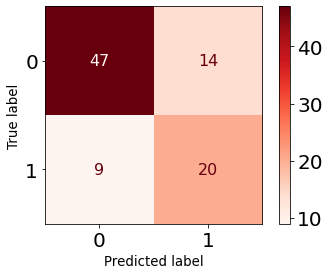

ROC AUC=0.771


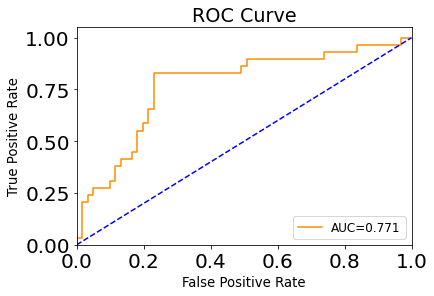

In [149]:
params={
     "learning_rate"    : [0.001,0.01,0.05,0.1] ,
     "max_depth" : np.arange(5,11,1),
        "n_estimators":[10,30,50,70,90,100]
    
    }

    
xgb8 = XGBClassifier(random_state=777,n_jobs=-1)
gridsearch = GridSearchCV(xgb8,                    # model
                   param_grid = params,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled, y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_xgb4 = xgb8.set_params(**grid_result.best_params_)
  
tuned_xgb4.fit(x_train_resampled, y_train_resampled)
print("Parameters are :",tuned_xgb4.get_params(deep=True))      


cv_accuracy = cross_val_score(tuned_xgb4,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_xgb4,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_xgb4,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_xgb4,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_xgb4,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation recall :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean()) 

y_predicted = tuned_xgb4.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('xgb8','wb') as file:
    pickle.dump(tuned_xgb4,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_xgb4.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 4. KNN

# Before Tuning

Parameters are : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Cross validation Accuracy : 0.7782581453634085
Cross validation Precision : 0.7552255384912586
Cross validation recall : 0.8291450935935145
Cross validation specificity : 0.7347112691230338
Cross validation f1 score : 0.7866470732415676
Classification report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        61
           1       0.54      0.52      0.53        29

    accuracy                           0.70        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.70      0.70      0.70        90

Accuracy: 0.7
Precision: 0.5357142857142857
Sensitivity_recall: 0.5172413793103449
Specificity: 0.7868852459016393
F1_score: 0.5263157894736843
MCC: 0.30700362165943407
Confusion matrix: [[48 13]
 [14 15]]


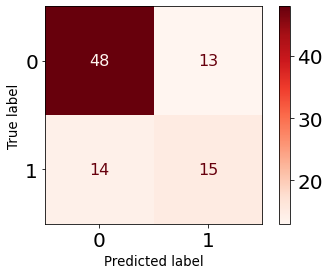

ROC AUC=0.761


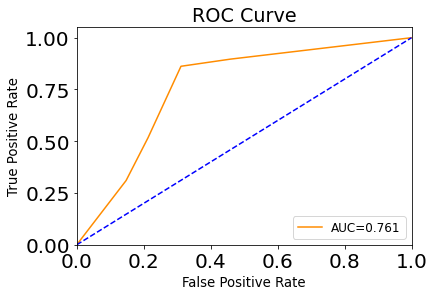

In [150]:
np.random.seed(777)
knn7 = KNeighborsClassifier()
knn7= knn7.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",knn7.get_params(deep=True))
            

cv_accuracy = cross_val_score(knn7,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(knn7,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(knn7,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(knn7,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(knn7,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    


y_predicted = knn7.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn7','wb') as file:
    pickle.dump(knn7,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = knn7.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
    

# Hyperparameter Tuning

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuned Hyperparameters : {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}
Parameters are : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Cross validation Accuracy : 0.7958646616541353
Cross validation Precision : 0.7764701520207637
Cross validation recall : 0.8408805410062847
Cross validation specificity : 0.7619306184012066
Cross validation f1 score : 0.8033777095067418
Classification report
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        61
           1       0.71      0.41      0.52        29

    accuracy                           0.76        90
   macro avg       0.74      0.67      0.68        90
weighted avg       0.75      0.76      0.73        90

Accuracy: 0.7555555555555555
Precision: 0.7058823529411765
Sensitivity_recall: 0.413793103448275

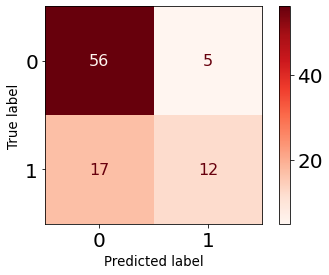

ROC AUC=0.848


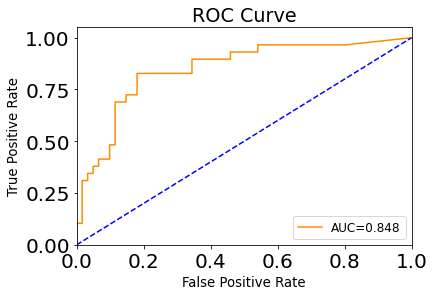

In [151]:
param_grid = {
        'weights':["uniform",'distance'], 
         'metric':['minkowski','euclidean','manhattan'],
        "n_neighbors":np.arange(15,25,2) 
        }
np.random.seed(777)
knn8 = KNeighborsClassifier(n_jobs=-1)
gridsearch = GridSearchCV(knn8,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled,y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_knn4 = knn8.set_params(**grid_result.best_params_)
  
tuned_knn4.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_knn4.get_params(deep=True))      


cv_accuracy = cross_val_score(tuned_knn4,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_knn4,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_knn4,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_knn4,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_knn4,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())    


y_predicted = tuned_knn4.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('knn8','wb') as file:
    pickle.dump(tuned_knn4,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_knn4.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
 

# 5. SVM

# Before Tuning

Parameters are : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.750062656641604
Cross validation Precision : 0.7379779841960041
Cross validation recall : 0.7778100911195654
Cross validation specificity : 0.7269457013574661
Cross validation f1 score : 0.7547234154466556
Classification report
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.67      0.76      0.71        29

    accuracy                           0.80        90
   macro avg       0.77      0.79      0.78        90
weighted avg       0.81      0.80      0.80        90

Accuracy: 0.8
Precision: 0.6666666666666666
Sensitivity_recall: 0.7586206896551724
Specificity: 0.819672131147541
F1_sco

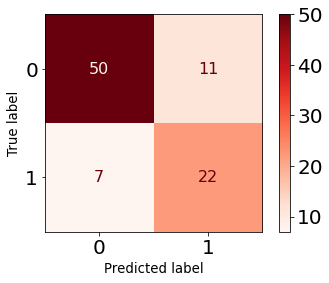

ROC AUC=0.826


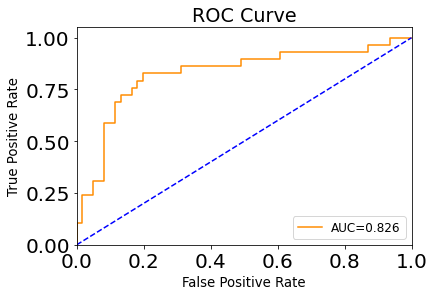

In [152]:

svm7 = SVC(probability=True,random_state=777)
svm7= svm7.fit(x_train_resampled,y_train_resampled)
print("Parameters are :",svm7.get_params(deep=True))
            

cv_accuracy = cross_val_score(svm7,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(svm7,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(svm7,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(svm7,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(svm7,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean()) 

y_predicted = svm7.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm7','wb') as file:
    pickle.dump(svm7,file)


#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()
#ROC CURVE
    
probs = svm7.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
    

# Hyperparameter Tuning

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Tuned Hyperparameters : {'C': 4.499999999999998, 'gamma': 'scale', 'kernel': 'rbf'}
Parameters are : {'C': 4.499999999999998, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 777, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Cross validation Accuracy : 0.7852130325814535
Cross validation Precision : 0.7553054740957966
Cross validation recall : 0.8518149903167072
Cross validation specificity : 0.7275651799181211
Cross validation f1 score : 0.7972023809523809
Classification report
              precision    recall  f1-score   support

           0       0.81      0.89      0.84        61
           1       0.70      0.55      0.62        29

    accuracy                           0.78        90
   macro avg       0.75      0.72      0.73        90
weighted avg  

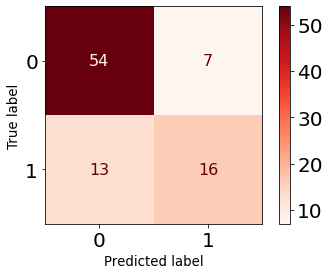

ROC AUC=0.807


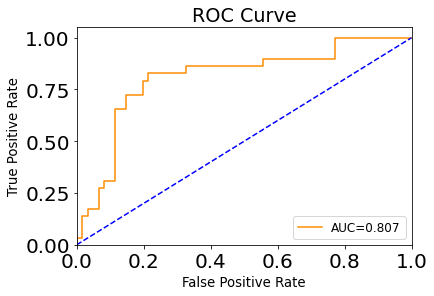

In [153]:
param_grid = {
              'kernel': ['rbf','poly','sigmoid','linear'],
                "C":np.arange(4,5,0.1),
                'gamma':["scale",'auto']
            }

svm8 = SVC(probability=True, random_state=777)
gridsearch = GridSearchCV(svm8,                    # model
                   param_grid = param_grid,   # hyperparameters
                   scoring=bal_scorer,        # metric for scoring
                   cv=cv,verbose=1)    

grid_result =gridsearch.fit(x_train_resampled,y_train_resampled)
print("Tuned Hyperparameters :",grid_result.best_params_ )
    #print(grid_result.best_estimator_)
    #print("Accuracy :",grid_result.best_score_)
    
tuned_svm4 = svm8.set_params(**grid_result.best_params_)
  
tuned_svm4.fit(xtrain_scaled,y_train)
print("Parameters are :",tuned_svm4.get_params(deep=True))      

cv_accuracy = cross_val_score(tuned_svm4,x_train_resampled,y_train_resampled,cv=cv,scoring=score1)
cv_precision = cross_val_score(tuned_svm4,x_train_resampled,y_train_resampled,cv=cv,scoring=score2)
cv_recall = cross_val_score(tuned_svm4,x_train_resampled,y_train_resampled,cv=cv,scoring=score3)
cv_f1 = cross_val_score(tuned_svm4,x_train_resampled,y_train_resampled,cv=cv,scoring=score4)
cv_specificity = cross_val_score(tuned_svm4,x_train_resampled,y_train_resampled,cv=cv,scoring=score5)
print("Cross validation Accuracy :",cv_accuracy.mean())
print("Cross validation Precision :", cv_precision.mean())
print("Cross validation recall :",cv_recall.mean())
print("Cross validation specificity :",cv_specificity.mean())
print("Cross validation f1 score :", cv_f1.mean())   

y_predicted = tuned_svm4.predict(xtest_scaled)
cr=classification_report(y_test,y_predicted)
print("Classification report")
print(cr)

#Save model
with open('svm8','wb') as file:
    pickle.dump(tuned_svm4,file)

#Metrics for test data
Accuracy = accuracy_score(y_test, y_predicted)
Precision = precision_score(y_test, y_predicted)
Sensitivity_recall = recall_score(y_test, y_predicted)
Specificity = recall_score(y_test, y_predicted, pos_label=0)
F1_score = f1_score(y_test, y_predicted)
mcc= matthews_corrcoef(y_test,y_predicted)
   
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("Specificity:",Specificity)
print("F1_score:",F1_score)
print("MCC:",mcc)
CM = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:",CM)
cm = confusion_matrix(y_test, y_predicted, labels=tuned_svm4.classes_)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted,cmap="Reds")

plt.grid(False)
plt.show()

#ROC CURVE
    
probs = tuned_svm4.predict_proba(xtest_scaled)[:,1]
fpr,tpr,threshold=roc_curve(y_test,probs)
#roc_auc=auc(fpr,tpr)
roc_auc= roc_auc_score(y_test,probs)
print('ROC AUC=%0.3f'%roc_auc)
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
plt.legend(loc='lower right',fontsize=12)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
    
  

## Comparing the ROC curves of tuned models after SMOTE

Logistic Model : ROC AUC=0.783
Random Forest Model : ROC AUC=0.785
XGBoost : ROC AUC=0.771
KNN : ROC AUC=0.848
SVM : ROC AUC=0.807


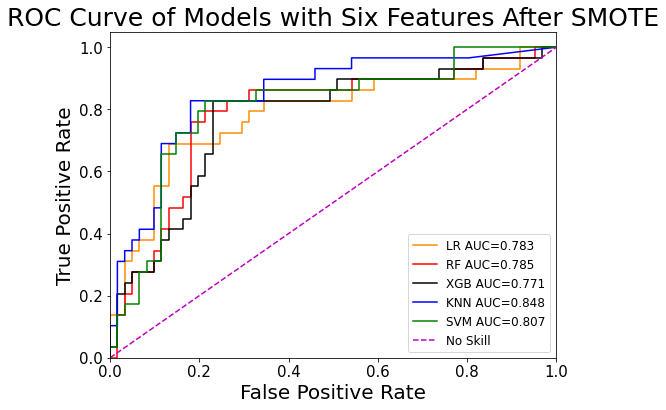

In [154]:
#ROC CURVE
plt.figure(figsize=(8,6))
probs_lr = tuned_lr4.predict_proba(xtest_scaled)[:,1]
fpr_lr,tpr_lr,threshold_lr=roc_curve(y_test,probs_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)
print('Logistic Model : ROC AUC=%0.3f'%roc_auc_lr)
plt.plot(fpr_lr,tpr_lr,label='LR AUC=%0.3f'%roc_auc_lr,color='darkorange')

probs_rf = tuned_rf4.predict_proba(xtest_scaled)[:,1]
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,probs_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)
print('Random Forest Model : ROC AUC=%0.3f'%roc_auc_rf)
plt.plot(fpr_rf,tpr_rf,label='RF AUC=%0.3f'%roc_auc_rf,color='red')



probs_xgb = tuned_xgb4.predict_proba(xtest_scaled)[:,1]
fpr_xg,tpr_xg,threshold_g=roc_curve(y_test,probs_xgb)
roc_auc_xg=auc(fpr_xg,tpr_xg)
print('XGBoost : ROC AUC=%0.3f'%roc_auc_xg)
plt.plot(fpr_xg,tpr_xg,label='XGB AUC=%0.3f'%roc_auc_xg,color='black')

probs_knn = tuned_knn4.predict_proba(xtest_scaled)[:,1]
fpr_knn,tpr_knn,threshold_g=roc_curve(y_test,probs_knn)
roc_auc_knn=auc(fpr_knn,tpr_knn)
print('KNN : ROC AUC=%0.3f'%roc_auc_knn)
plt.plot(fpr_knn,tpr_knn,label='KNN AUC=%0.3f'%roc_auc_knn,color='blue')


probs_svm = tuned_svm4.predict_proba(xtest_scaled)[:,1]
fpr_svm,tpr_svm,threshold_svm=roc_curve(y_test,probs_svm)
roc_auc_svm=auc(fpr_svm,tpr_svm)
print('SVM : ROC AUC=%0.3f'%roc_auc_svm)
plt.plot(fpr,tpr,label='SVM AUC=%0.3f'%roc_auc_svm,color='green')

plt.plot([0,1],[0,1],'m--',label='No Skill')
plt.legend(loc='lower right',fontsize=12)

plt.xlim([0,1])
plt.xticks(fontsize=15)
plt.ylim([0,1.05])
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("ROC Curve of Models with Six Features After SMOTE",fontsize=25)
plt.show()




# Comparing confusion matrices of tuned models after SMOTE

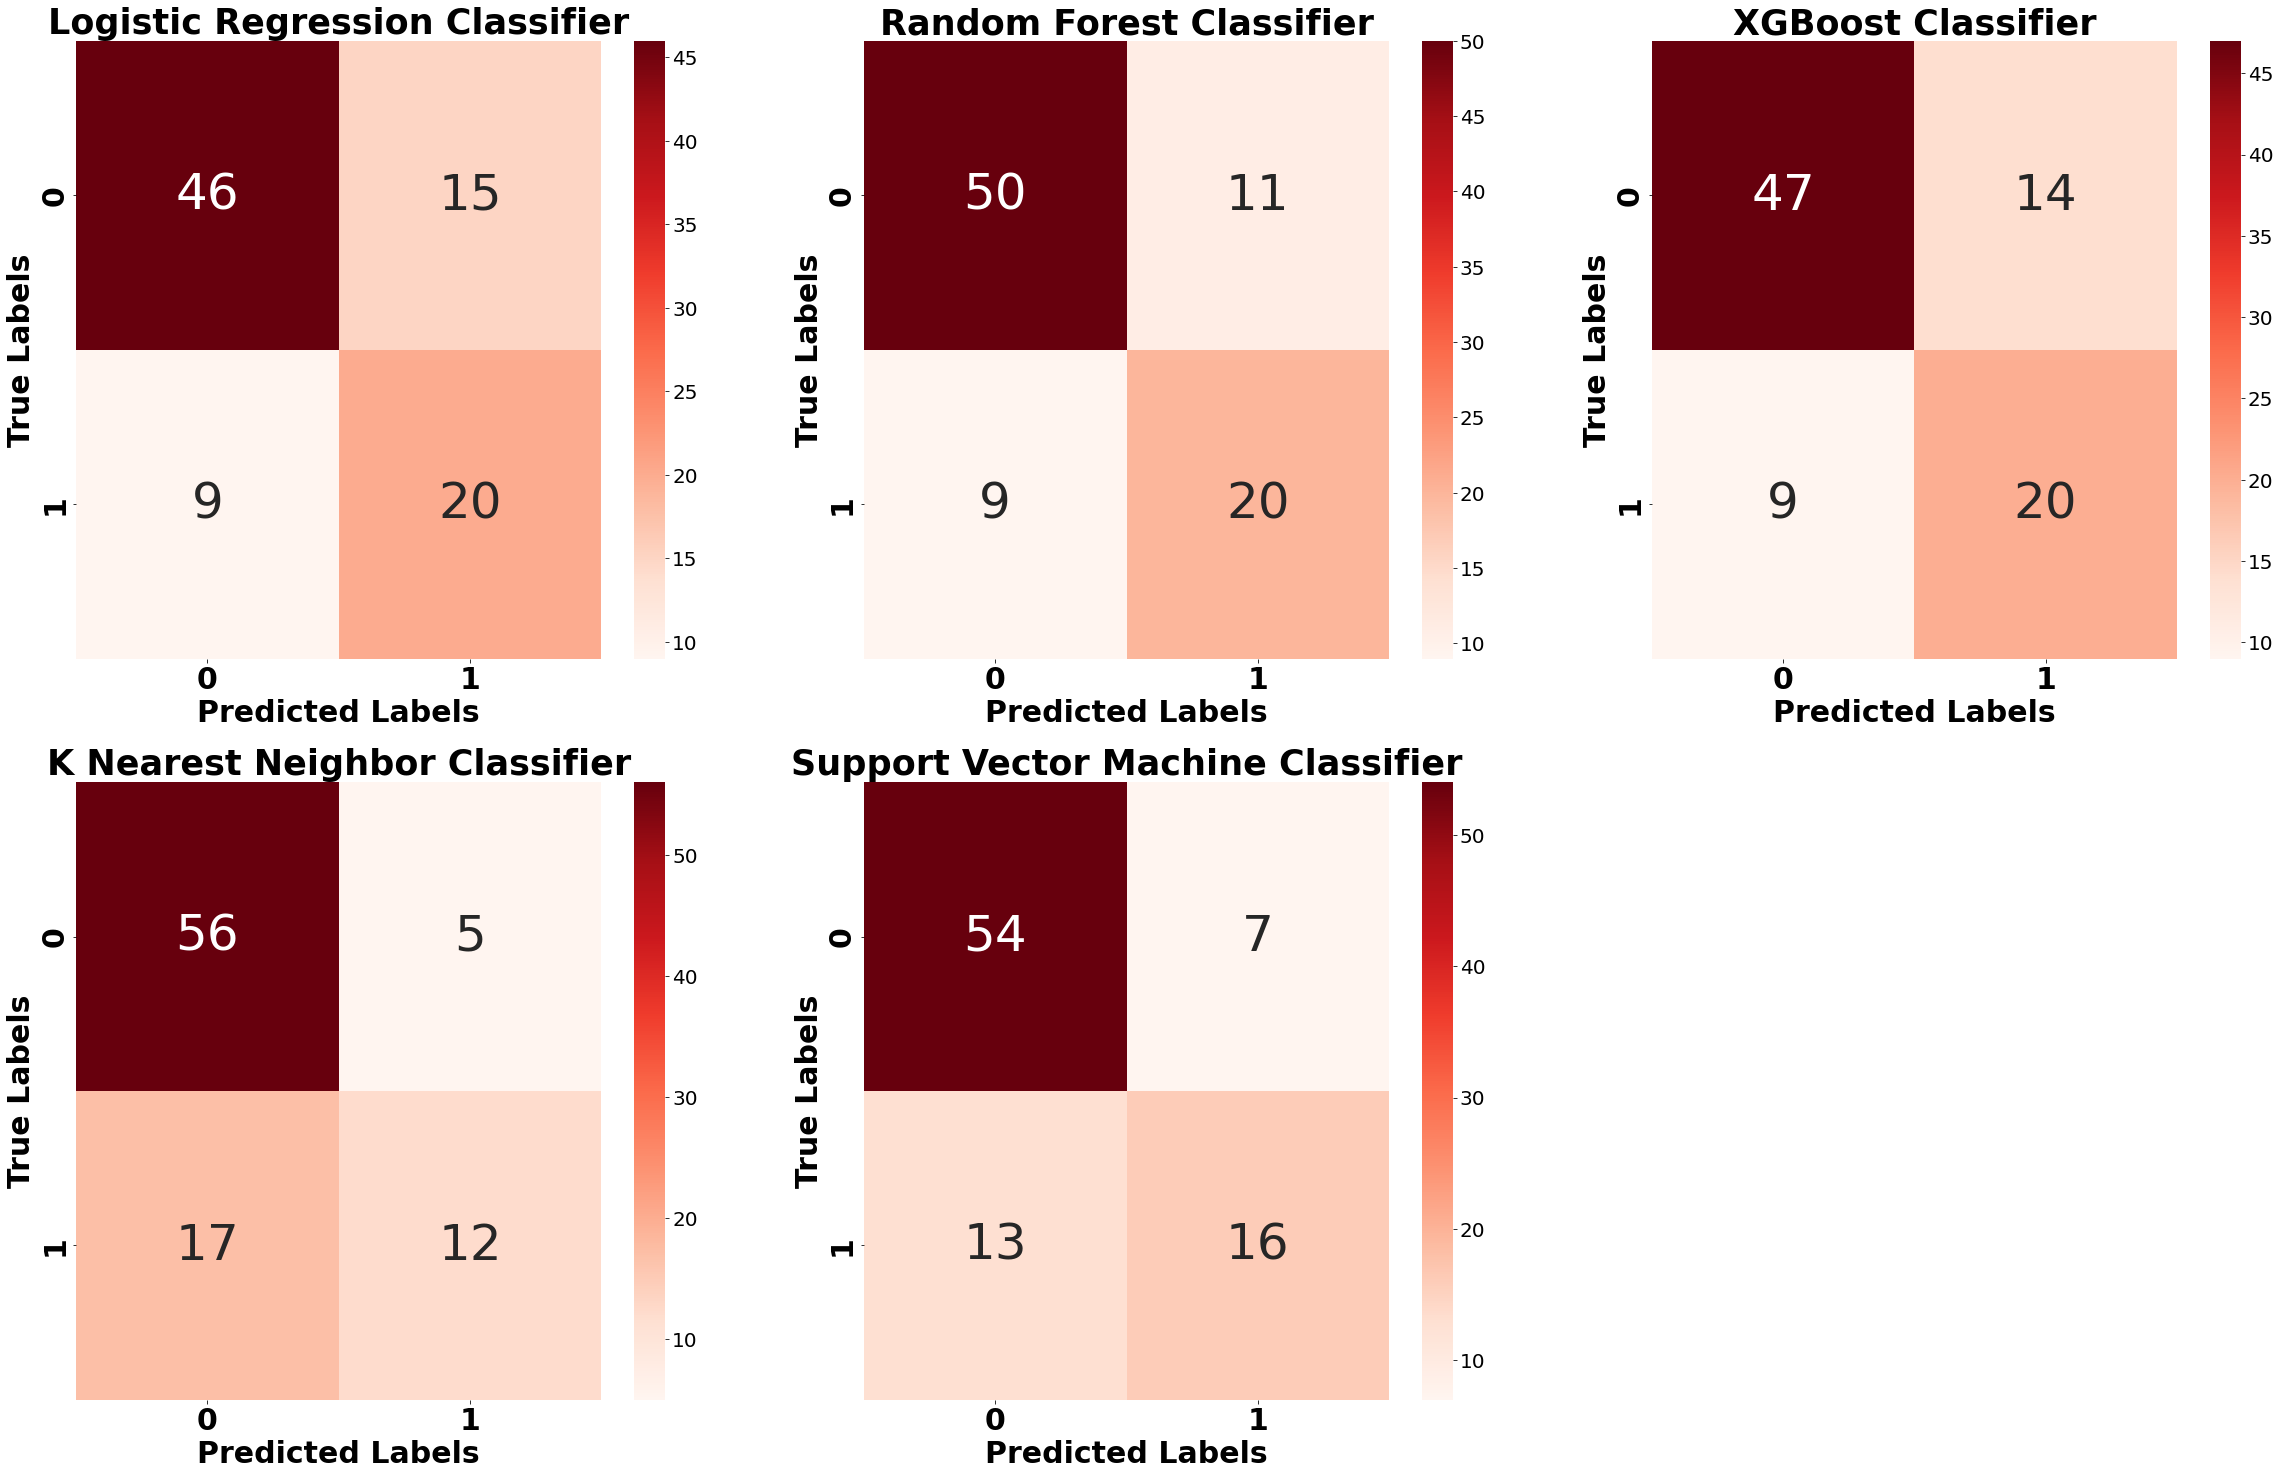

In [155]:
plt.figure(figsize=(40,25))

plt.subplot(2,3,1)
y_lr = tuned_lr4.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_lr)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Logistic Regression Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,2)
y_rf = tuned_rf4.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_rf)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Random Forest Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")


plt.subplot(2,3,3)
y_xgb = tuned_xgb4.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_xgb)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("XGBoost Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,4)
y_knn = tuned_knn4.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_knn)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("K Nearest Neighbor Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")

plt.subplot(2,3,5)
y_svm = tuned_svm4.predict(xtest_scaled)
disp = confusion_matrix(y_test,y_svm)
sns.heatmap(disp,
           annot=True,
           cmap='Reds',
           annot_kws={"size":50})
plt.title("Support Vector Machine Classifier",fontsize=35,fontweight="bold")
plt.xlabel("Predicted Labels",fontsize=30,fontweight="bold")
plt.ylabel("True Labels",fontsize=30,fontweight="bold")
plt.xticks(fontsize=30,fontweight="bold")
plt.yticks(fontsize=30,fontweight="bold")



plt.show()



#### Therefore, The random forest model with six selected features after SMOTE is the best model to predict the survival status of a heart failure patient.